We will start by importing the necessary libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

and then import the csvs we have already saved


In [ ]:
power_dt=pd.read_csv("power_dt.csv")
voltage_dt=pd.read_csv("voltage_dt.csv")
current_dt=pd.read_csv("current_dt.csv")

In [ ]:
power=pd.read_csv("power_total.csv")
voltage=pd.read_csv("voltage_total.csv")
current=pd.read_csv("current_total.csv")

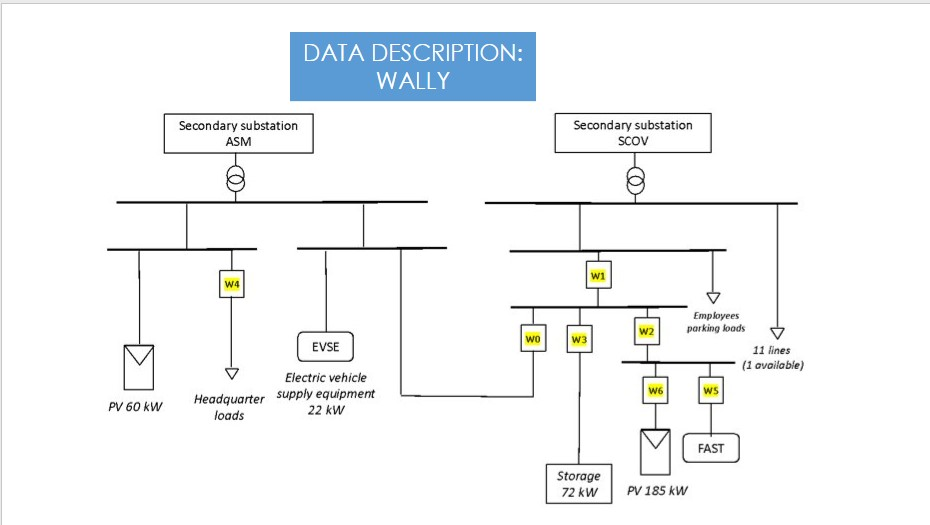

Creating a function that counts the nan values and making a barplot to view the percentage of missing values per column of df


In [ ]:
power_dt=power_dt.set_index('index')
current_dt=current_dt.set_index('index')
voltage_dt=voltage_dt.set_index('index')

In [ ]:
def nan_percentage(df):
  """
  Parameters: 
  df : pd.Dataframe : the dataframe that we want to check for Nan values

  Returns: None
  """
  values=[]
  cols=[]
  for col in df.columns:
    if col not in ('month','year','hour_of_day','weekday','day_of_month'):
      values = values +([(df.isna()[col].sum()/len(df)*100).round(2)])
      cols.append(col)
  sns.color_palette("crest", as_cmap=True)
  plt.figure(figsize=(15,8))
  sns.barplot(x=values, y=cols, palette='rocket_r')
  plt.xticks(rotation=0)
  plt.xlabel("Percentage of missing values (%)")
  ##print(power_d.isna()[col].sum())


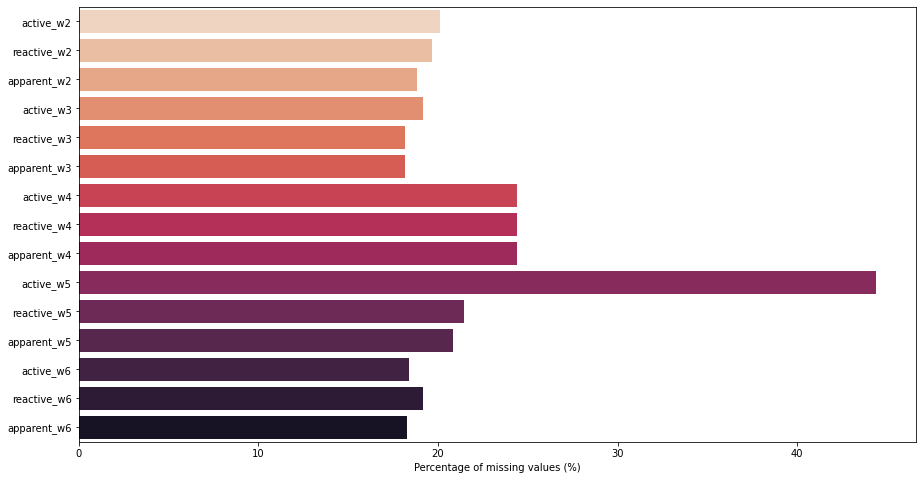

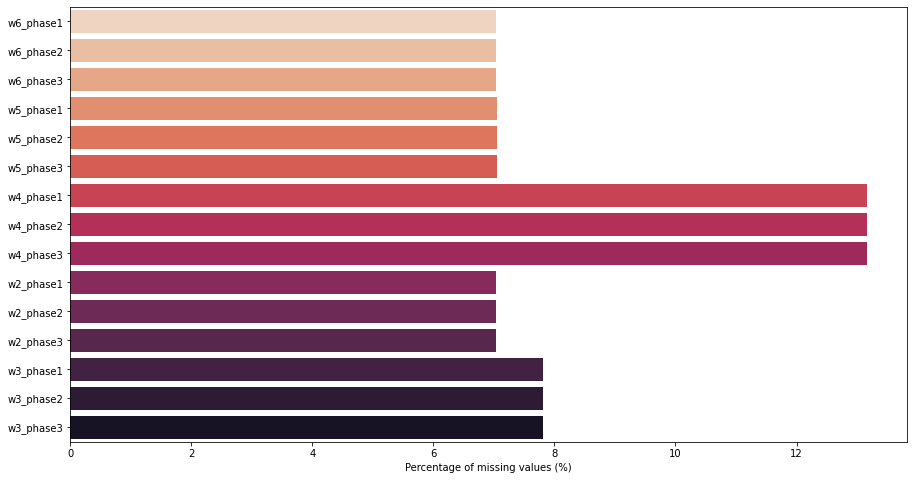

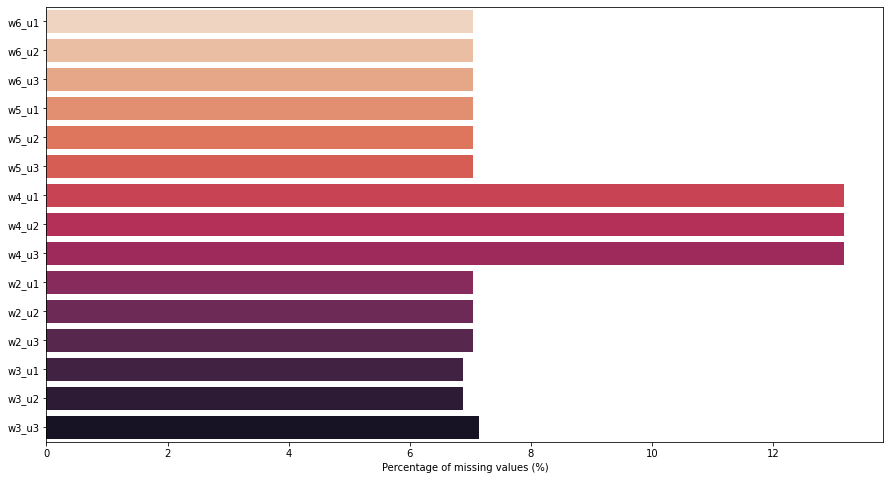

In [ ]:
nan_percentage(power_dt)
nan_percentage(current_dt)
nan_percentage(voltage_dt)

As we can see from the above barplots the meter with the highest percentage of Nan values for current and voltage data is w4, with approximately 16% of its values missing while for power data the 33% of w5's active power is missing, followed by 28% of w4's power missing.

The percentages are very high. We have to consider that we have indexed our dataframes from 2022-07-1 till now, and the live data are not updating this fast, so the past 5 days, which means (288 5 minute intervals a day *5 days = 1440 data) about 1% of our data is missing due to this. 

Let's find out how the rest missing values are distributed



##*Creating* a function that copies the input df and creates one new column for its existing column with a True value if the existing column's data is NaN and False if the existing column's data is not missing.

In [ ]:
def missing_df(df):
  """
  Parameters: df :pd.DataFrame :the dataframe we want to process

  Returns df_missing :pd.DataFrame : the dataframe that is the copy of the input dataframe and also has columns for each column to show whether the relevant column's data is NaN
 """
  df_missing=df.copy()
  for col in df.columns:
    if col not in ('year','month','weekday','hour_of_day','day_of_month'): ## we exclude these columns as we know there no missing values there
      df_missing["Missing " + col]=df.isna()[col]
      df_missing=df_missing.drop(columns=col, axis=1)
  return df_missing

In [ ]:
missing_power=missing_df(power_dt)
missing_current=missing_df(current_dt)
missing_voltage=missing_df(voltage_dt)

Creating a list of all the datetime parameters we want to check for nan's distribution

In [ ]:
weather = pd.read_csv("weather.csv")

In [ ]:
datetimes=(["month",'year','hour_of_day','weekday'])


In [ ]:
def nan_distribution(df, datetime_list):
  """
  Parameters: 
  df: pd.Dataframe : the dataframe that we want to check for nan's distribution
  value_list : list : a list with the name of the columns we want to check for NaN valus
  datetime_list : list : a list with the datetime_parameters that we want in the x-axis
  
  Returns:None
  """
  ## creating color palettes for our barplots

  for col in df.columns:
    if col not in ('month','year','weekday','day_of_month','hour_of_day'):
          fig, ax = plt.subplots(1,4)
          fig.set_size_inches(30, 5)
          plt.xticks(rotation=45)
          sns.barplot(x='month', y=col, data=df,ax=ax[0], palette='Set3',hue='year')
          sns.barplot(x='year', y=col, data=df,ax=ax[1])
          sns.barplot(x='hour_of_day', y=col, data=df,ax=ax[2], palette='Blues_r')
          sns.barplot(x='weekday', y=col, data=df,ax=ax[3],palette='gist_earth_r')


          plt.xticks(rotation=45)          



       

Checking where there are Nan's for power distribution

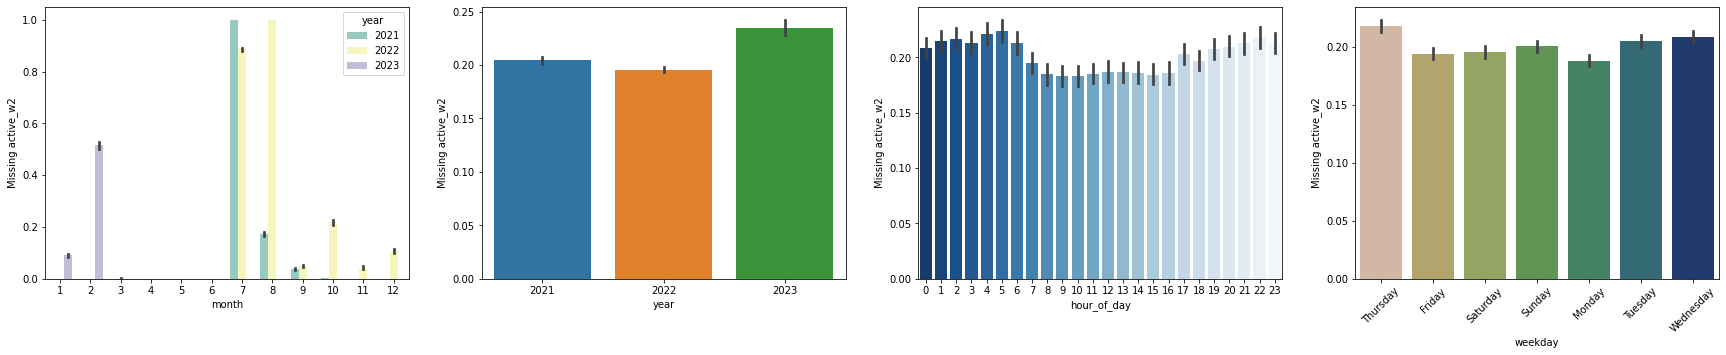

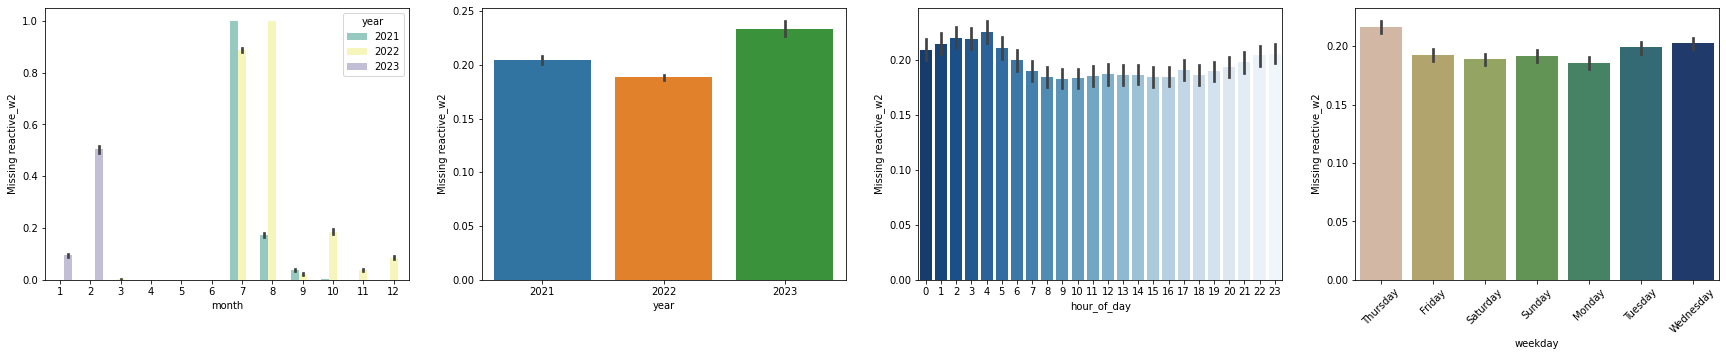

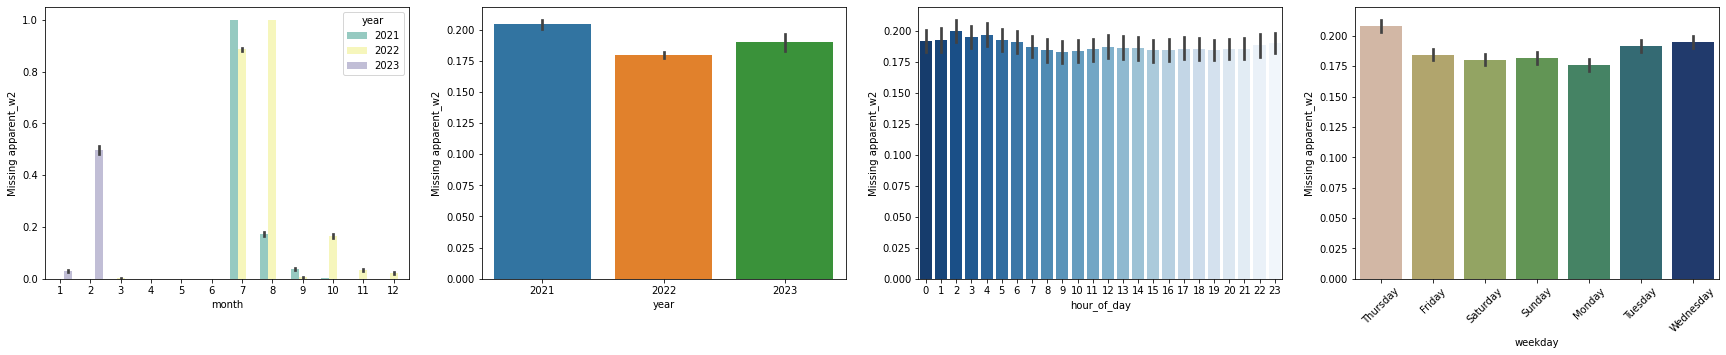

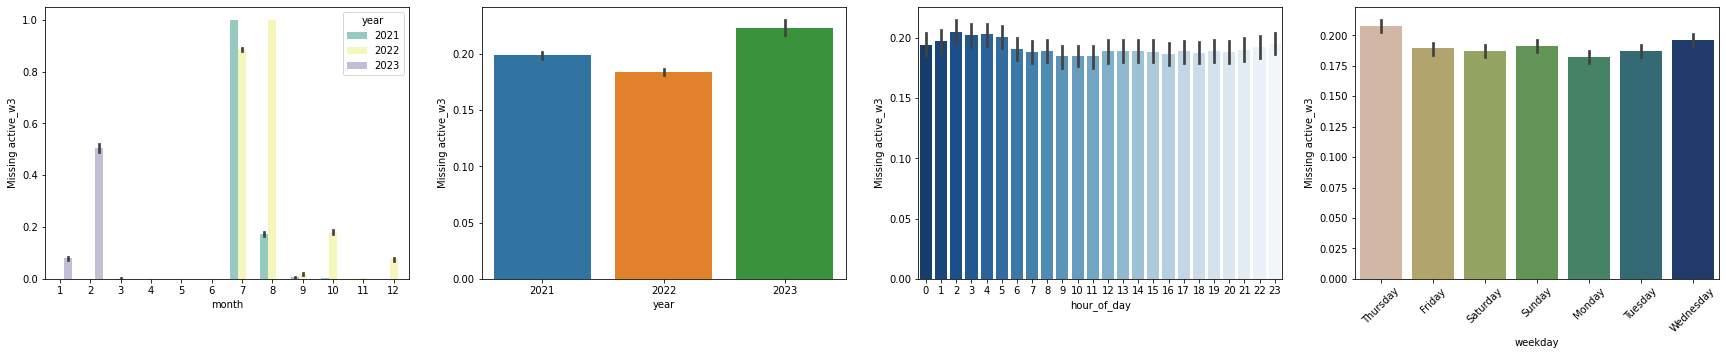

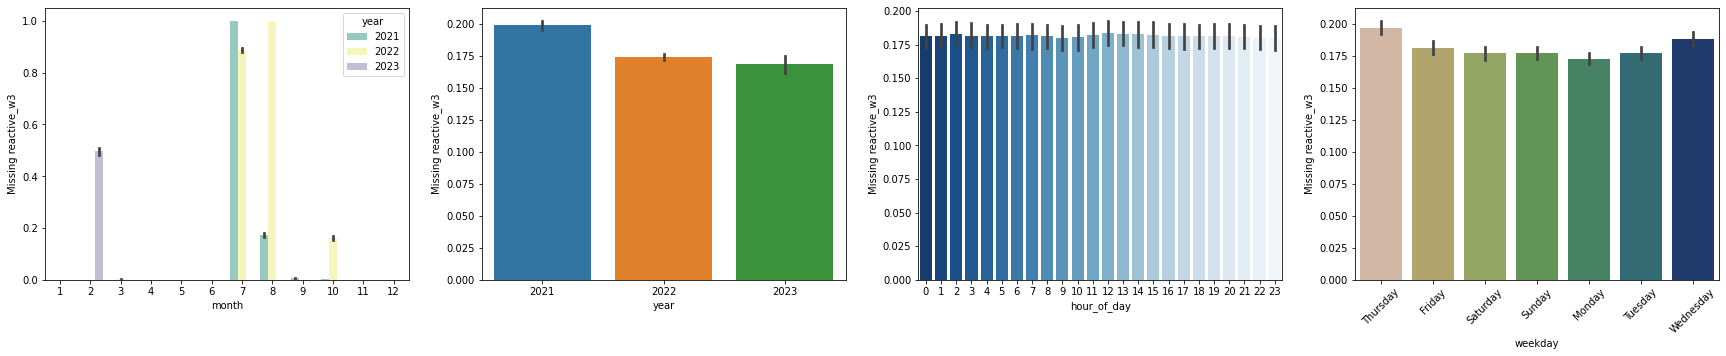

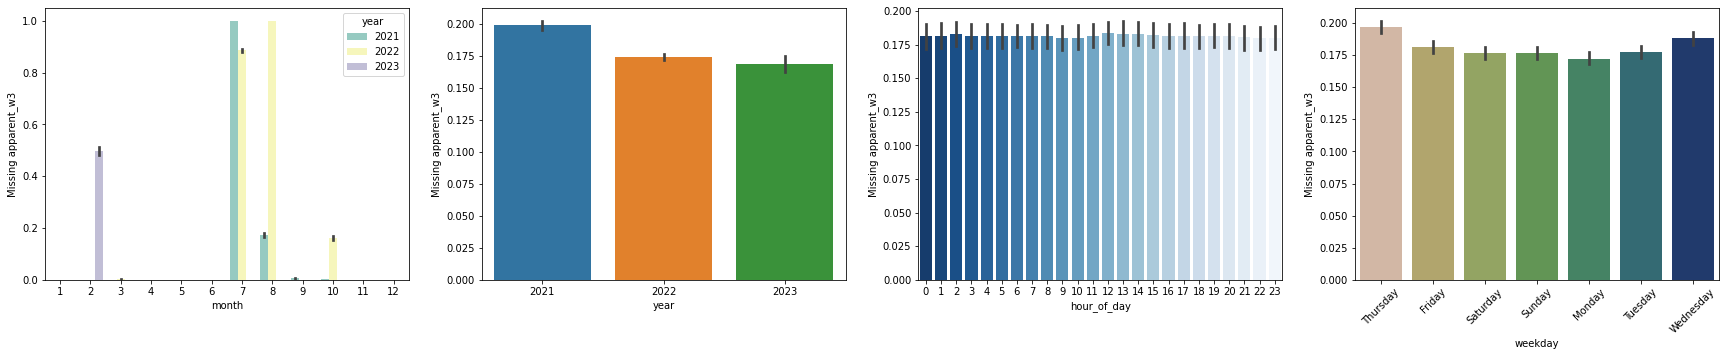

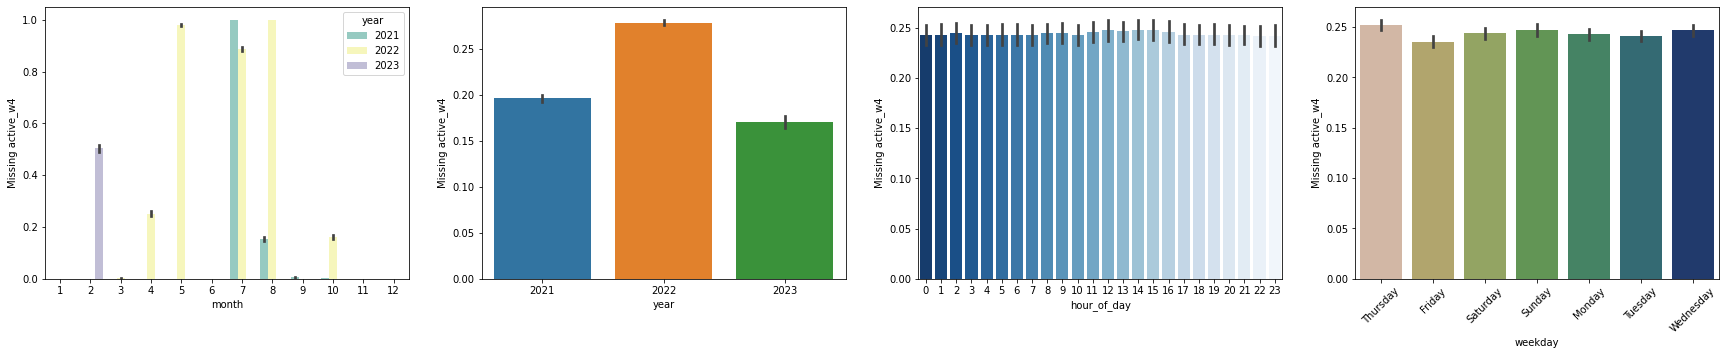

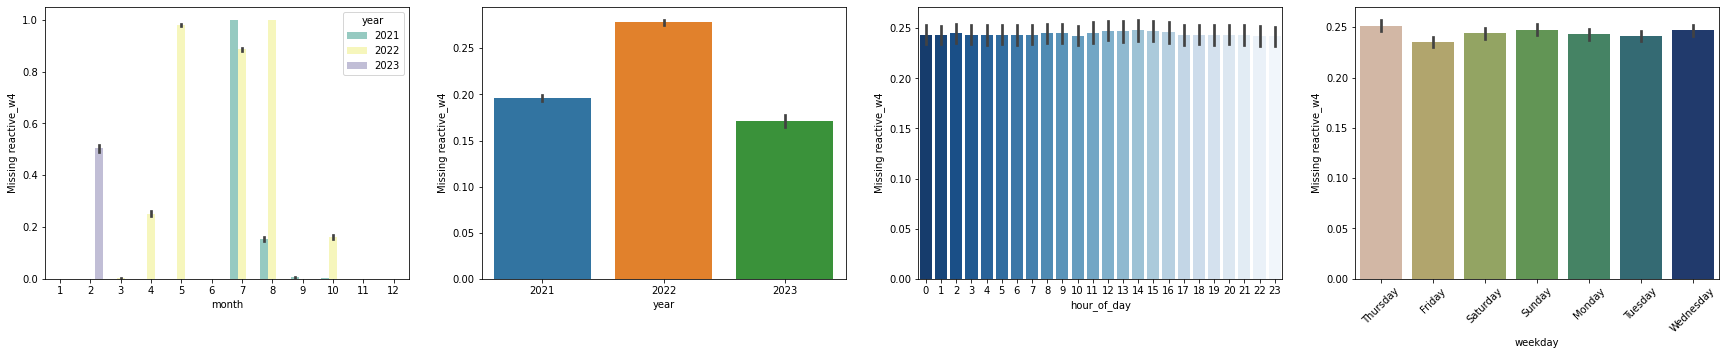

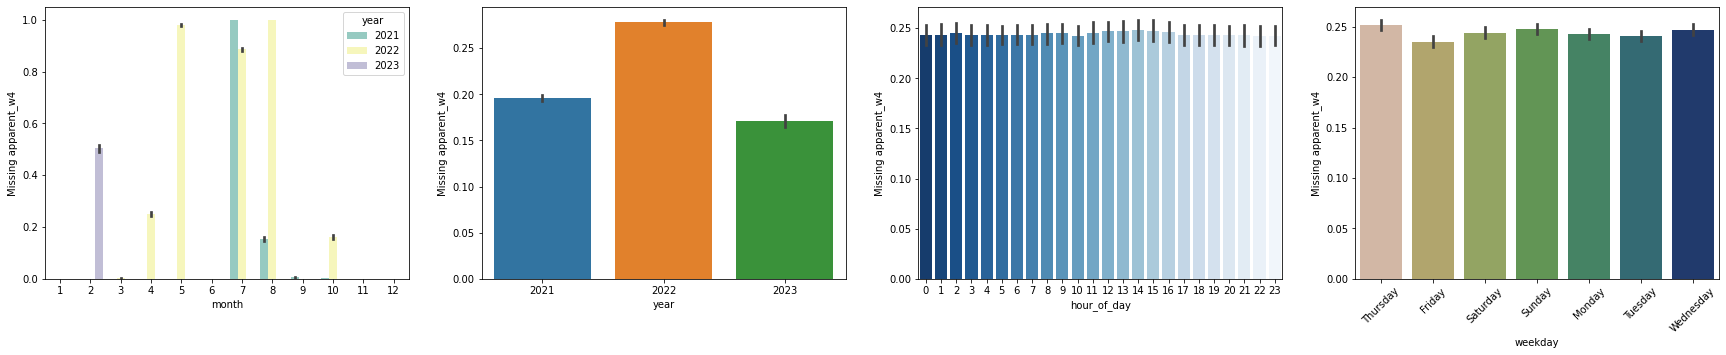

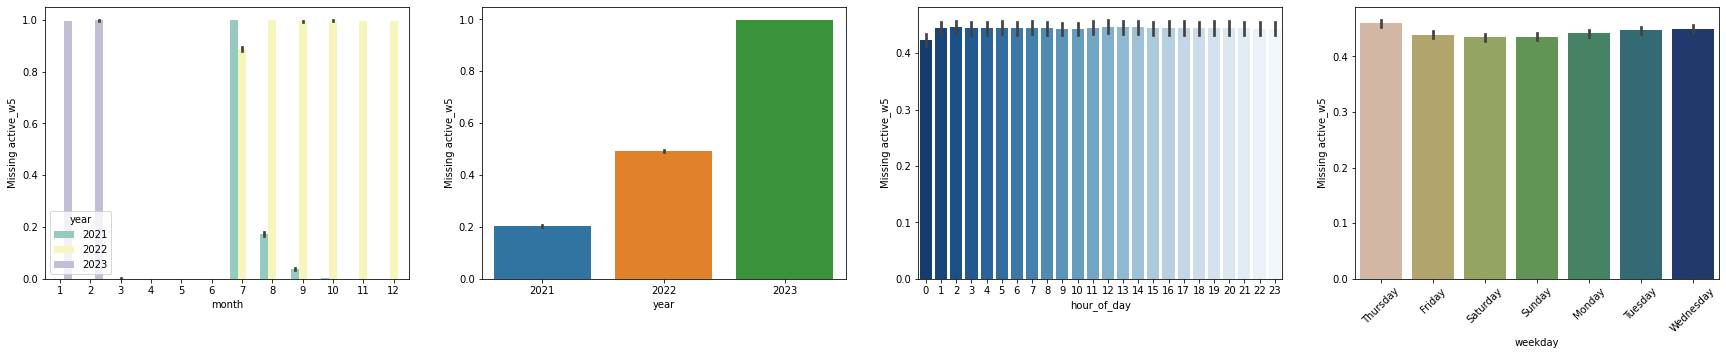

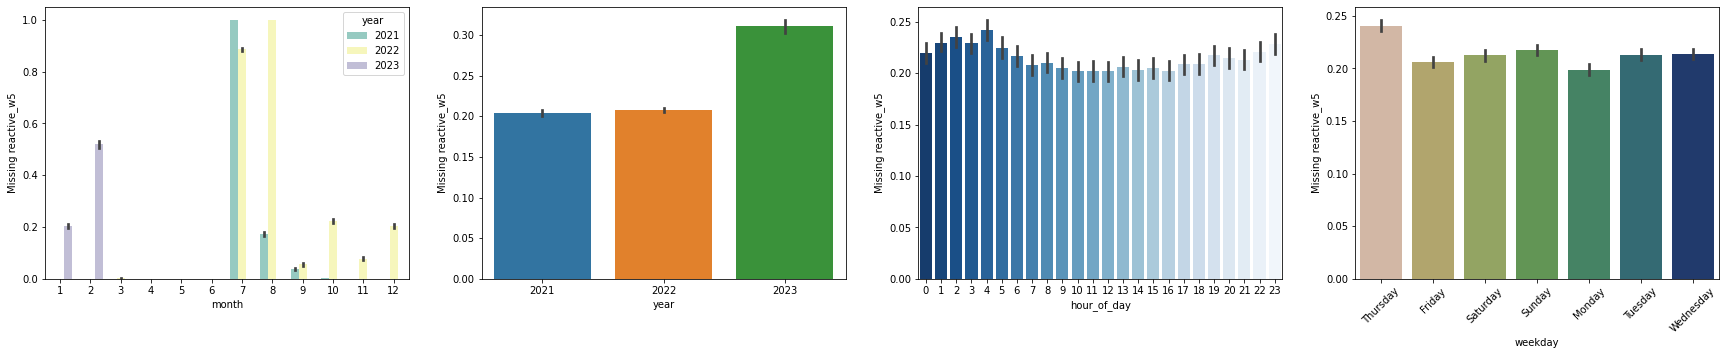

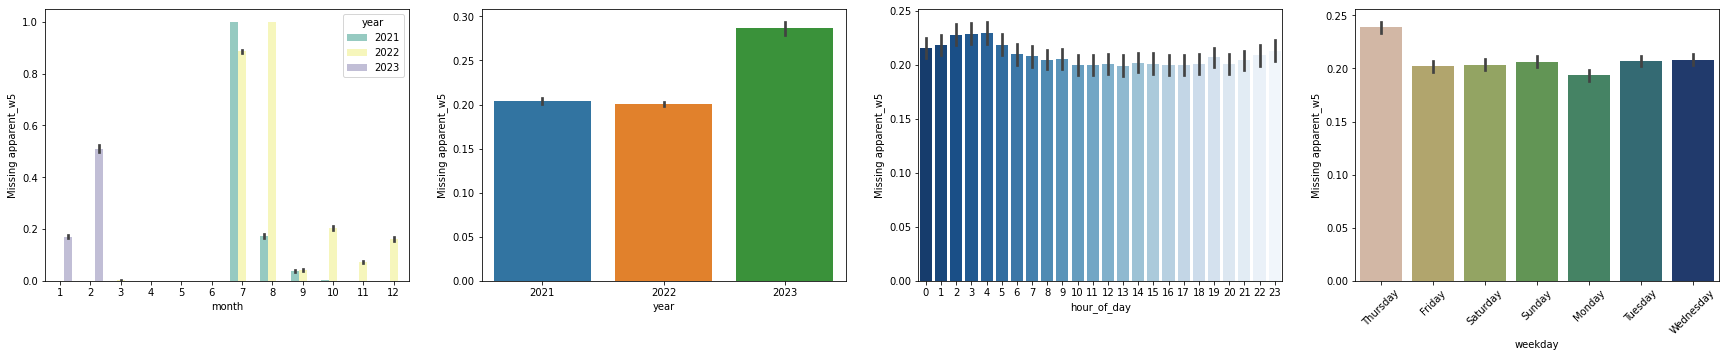

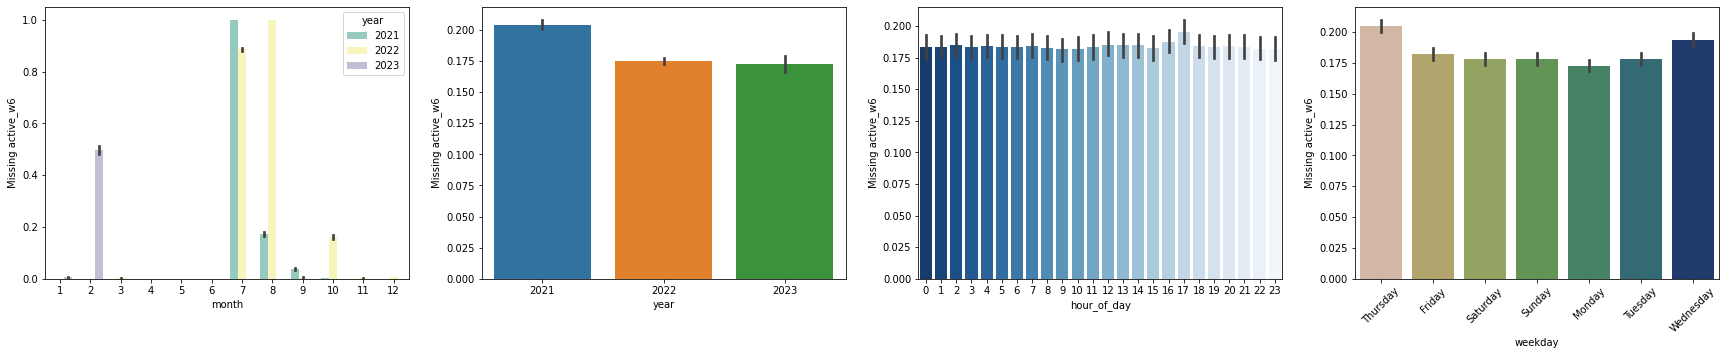

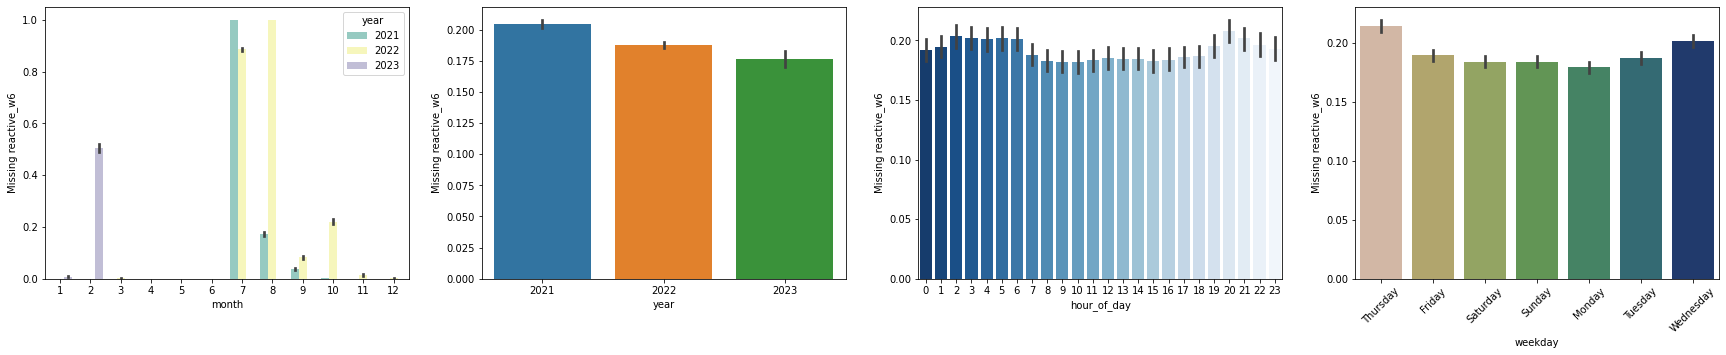

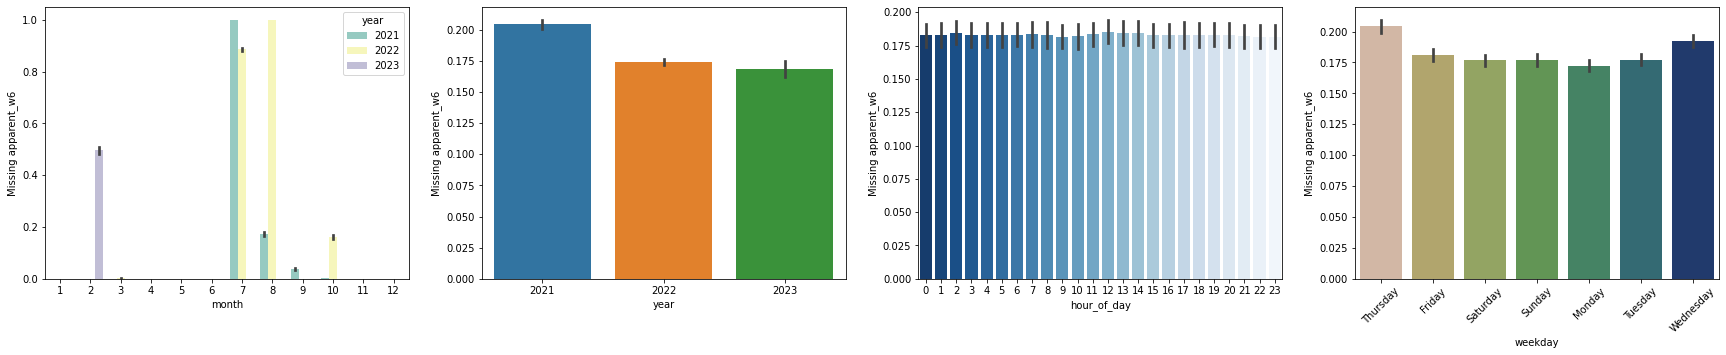

In [ ]:
nan_distribution(missing_power,datetimes)


In [ ]:
import missingno as msno


Checking current's Nan Values


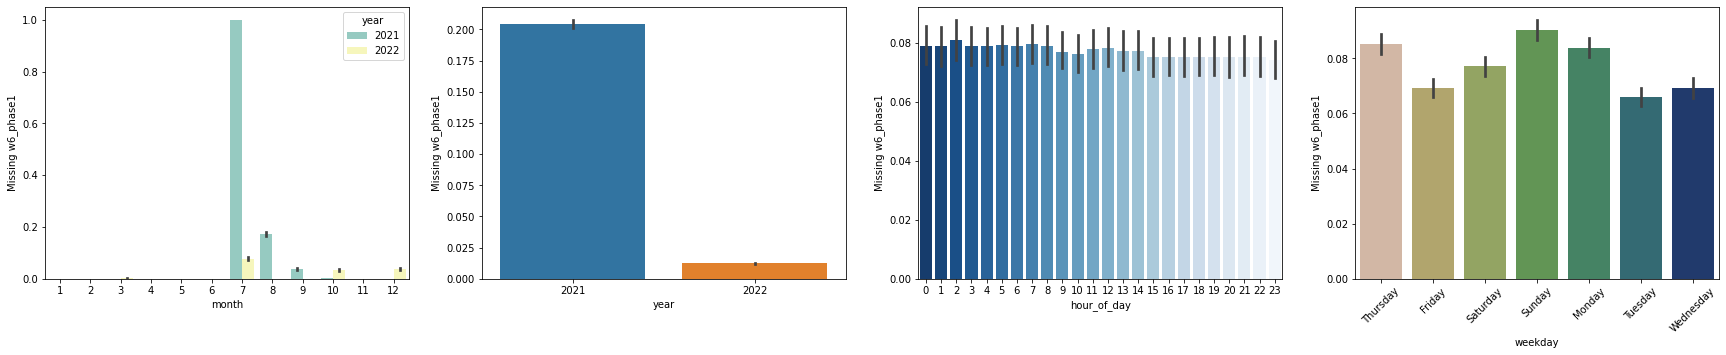

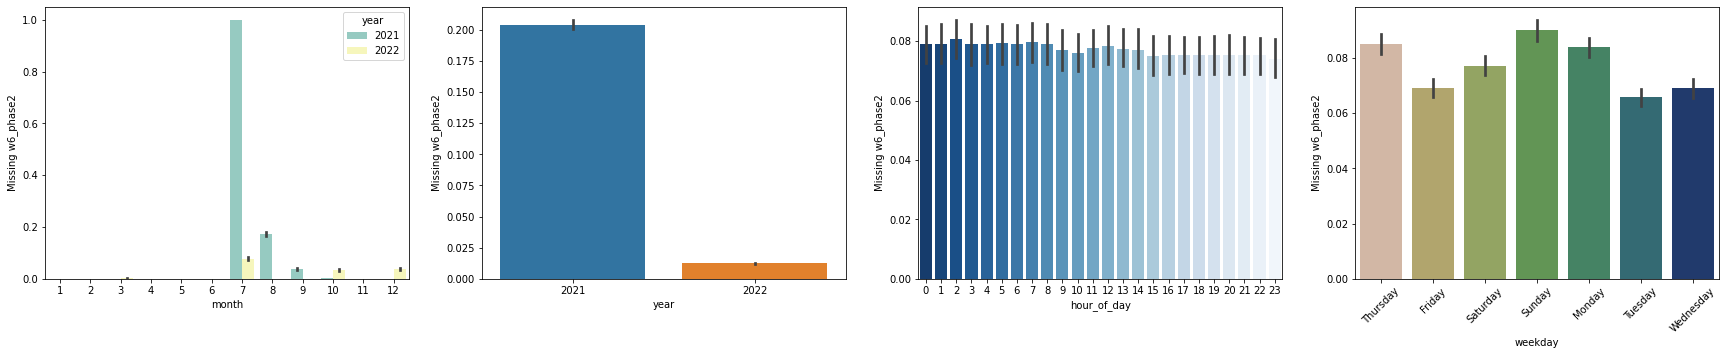

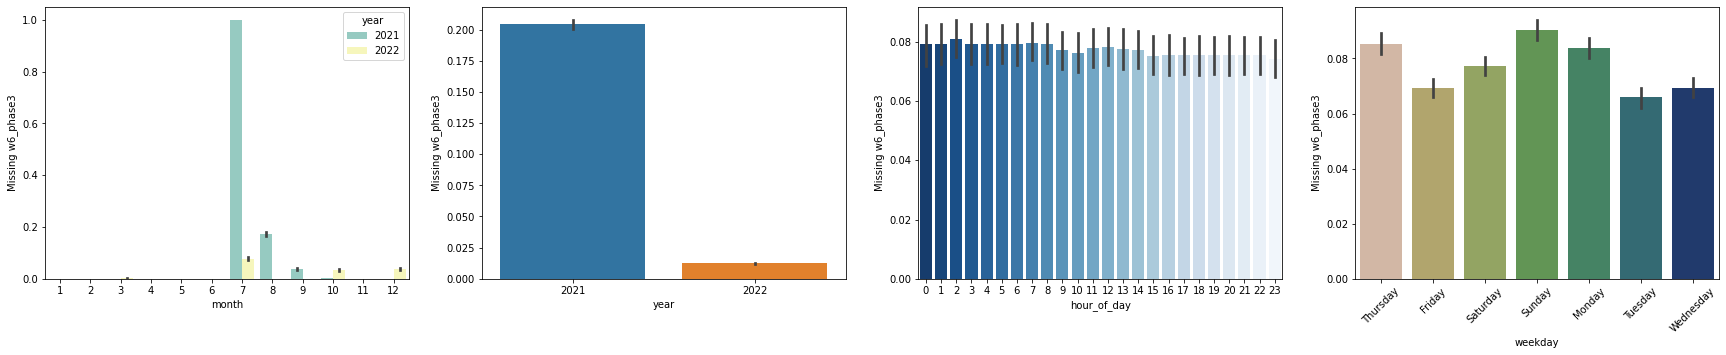

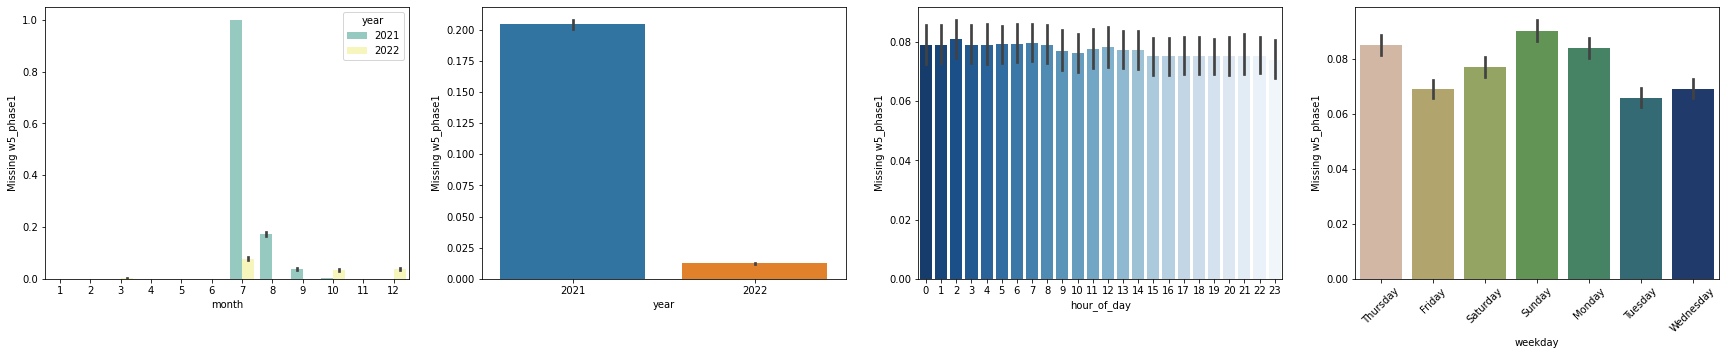

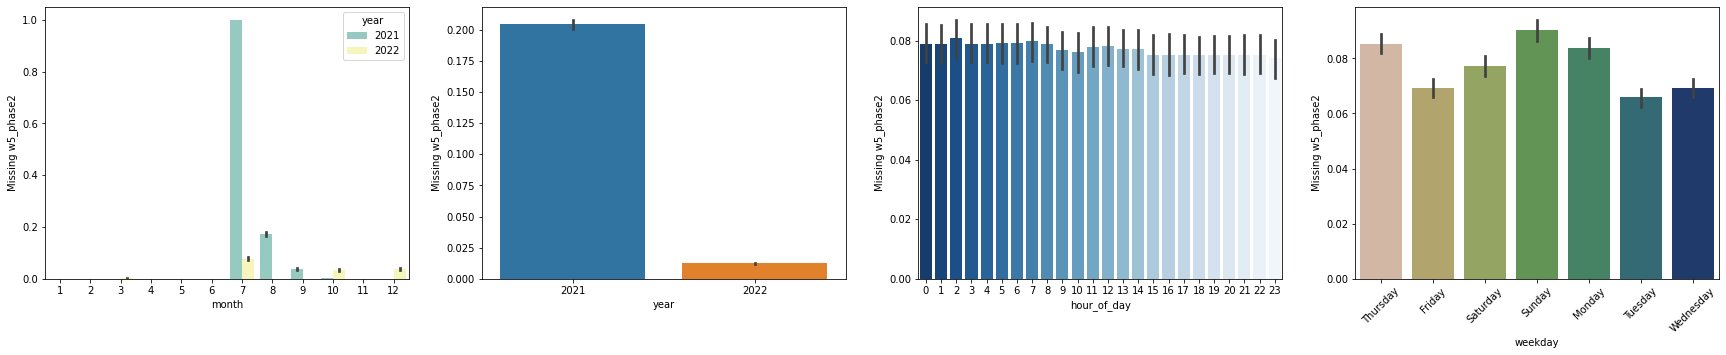

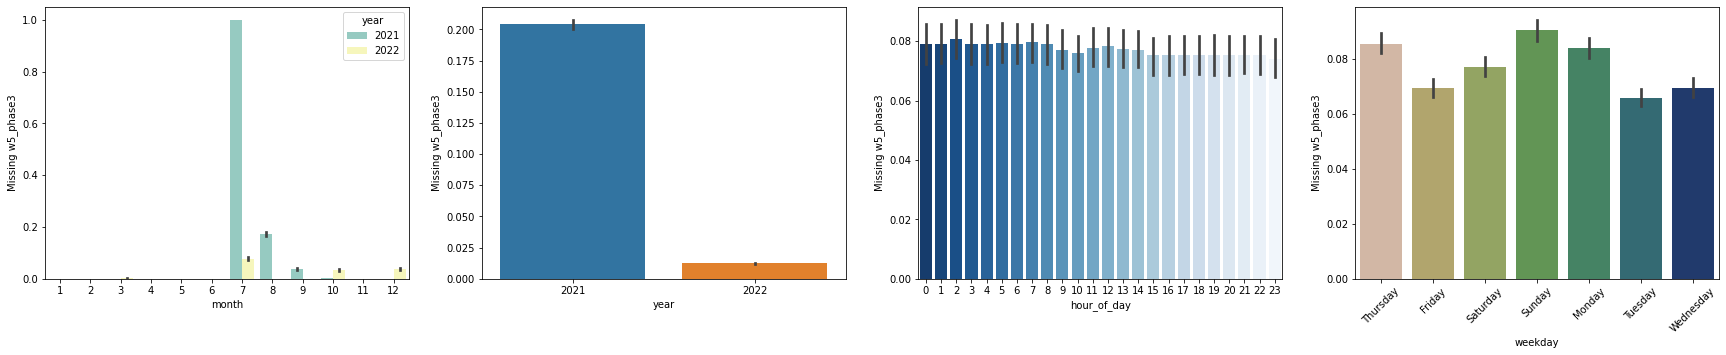

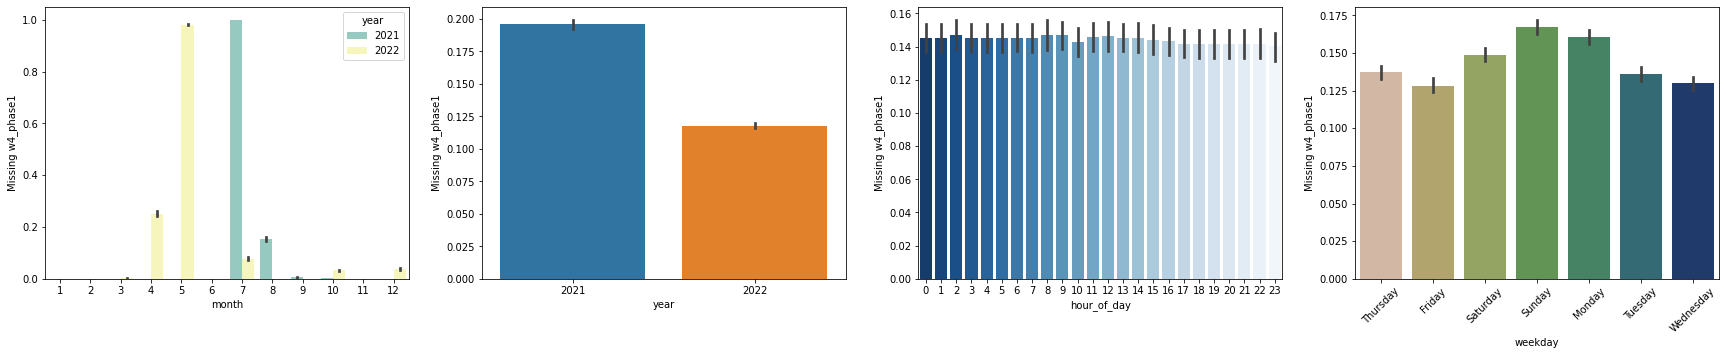

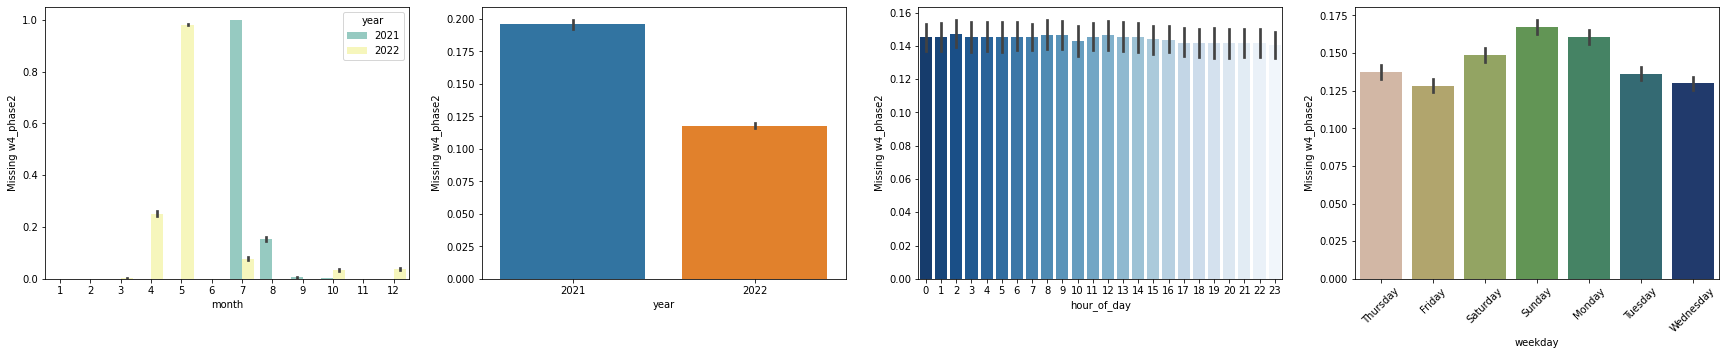

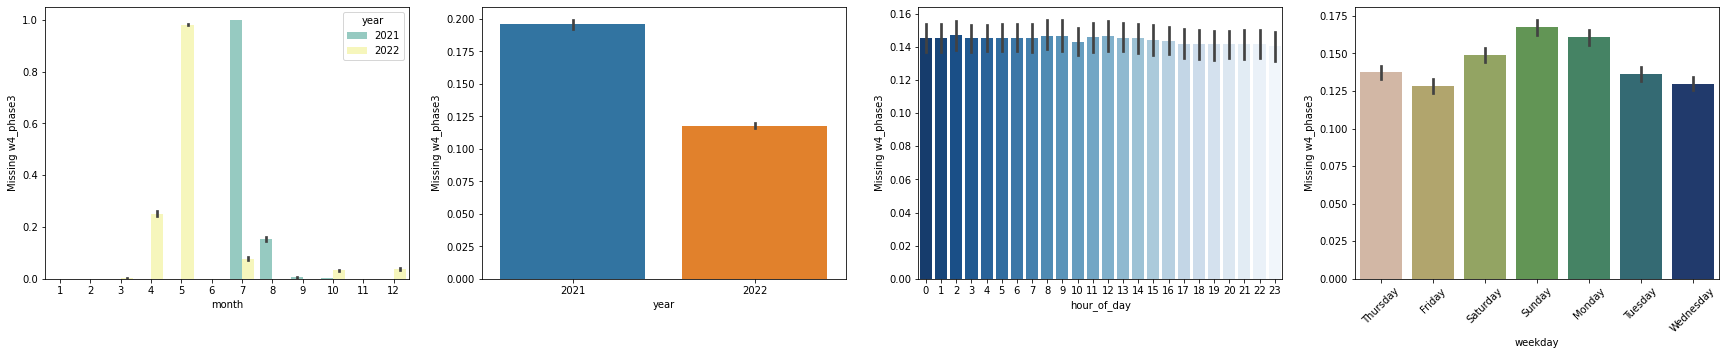

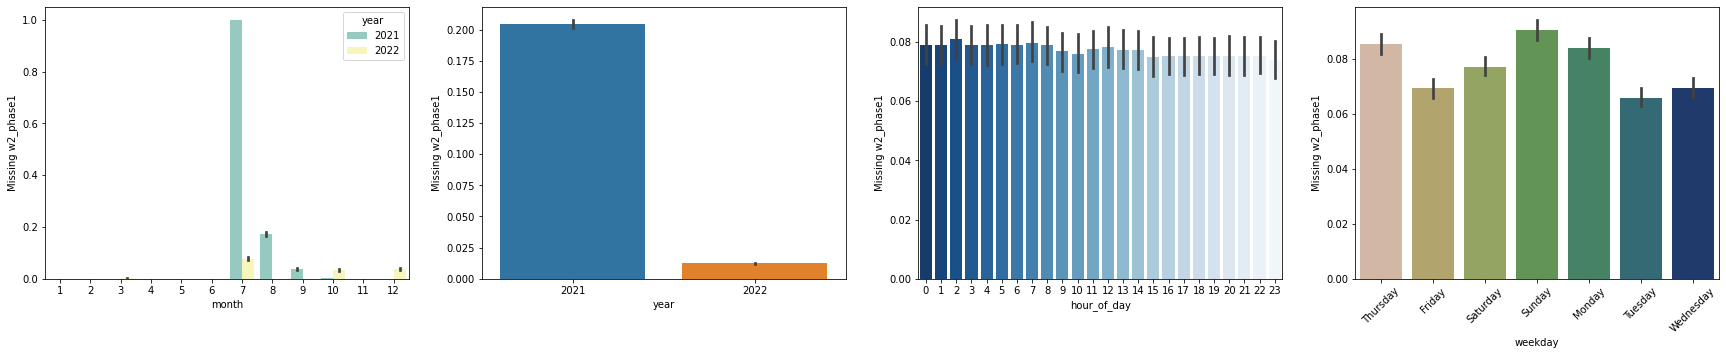

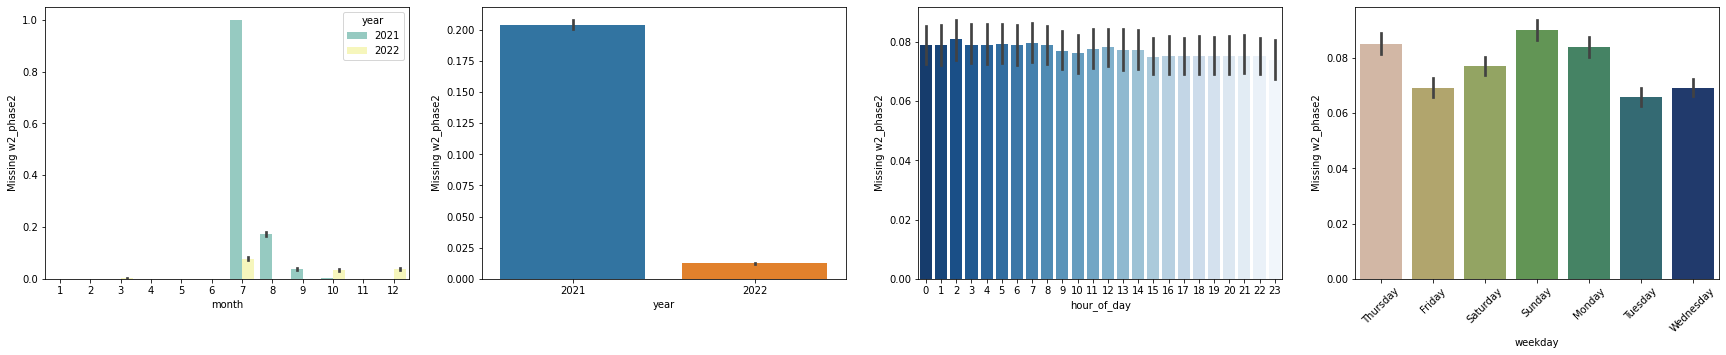

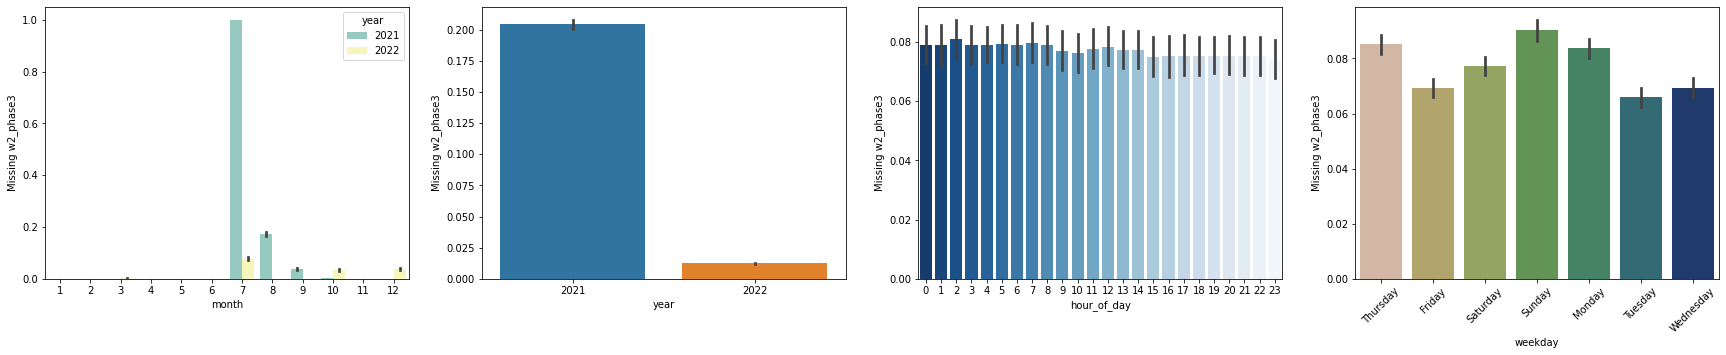

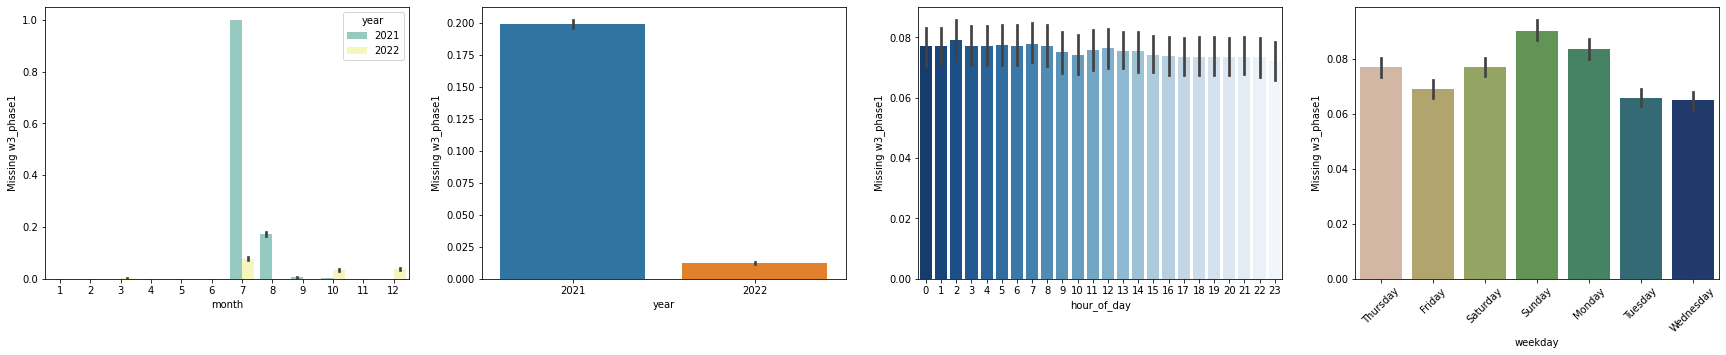

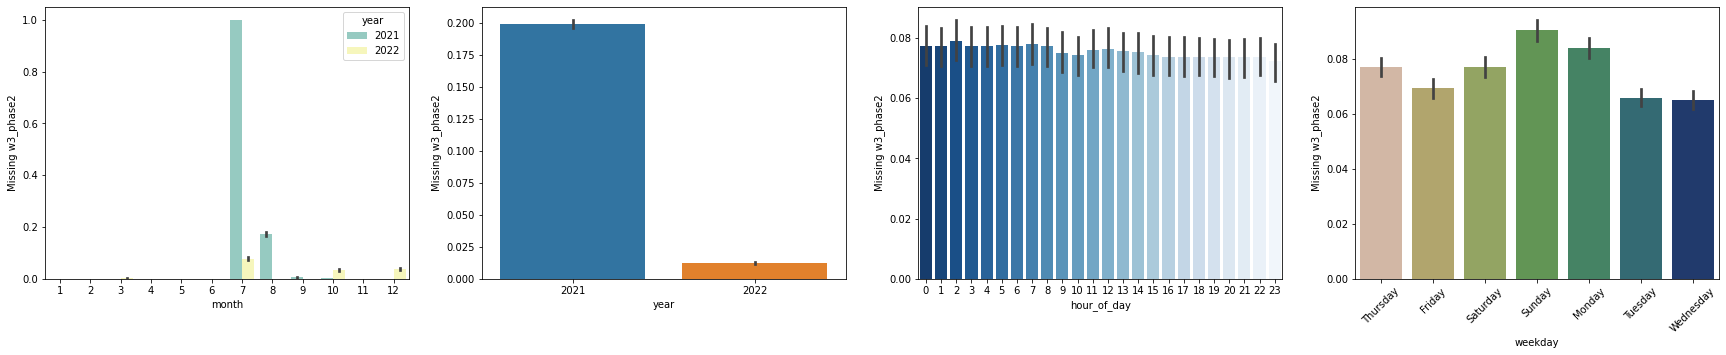

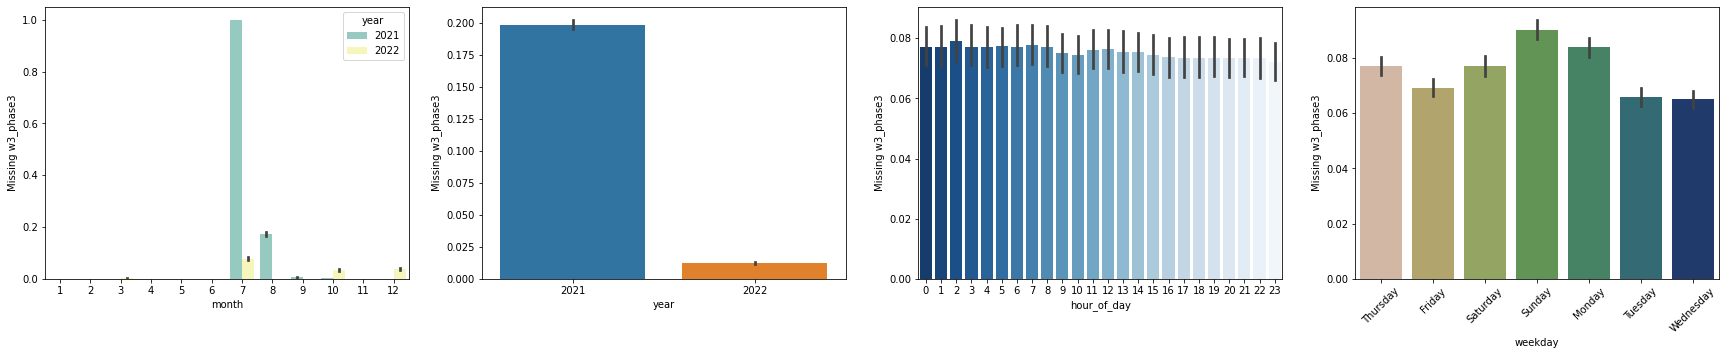

In [ ]:
nan_distribution(missing_current,datetimes)

Checking voltage's NaN's

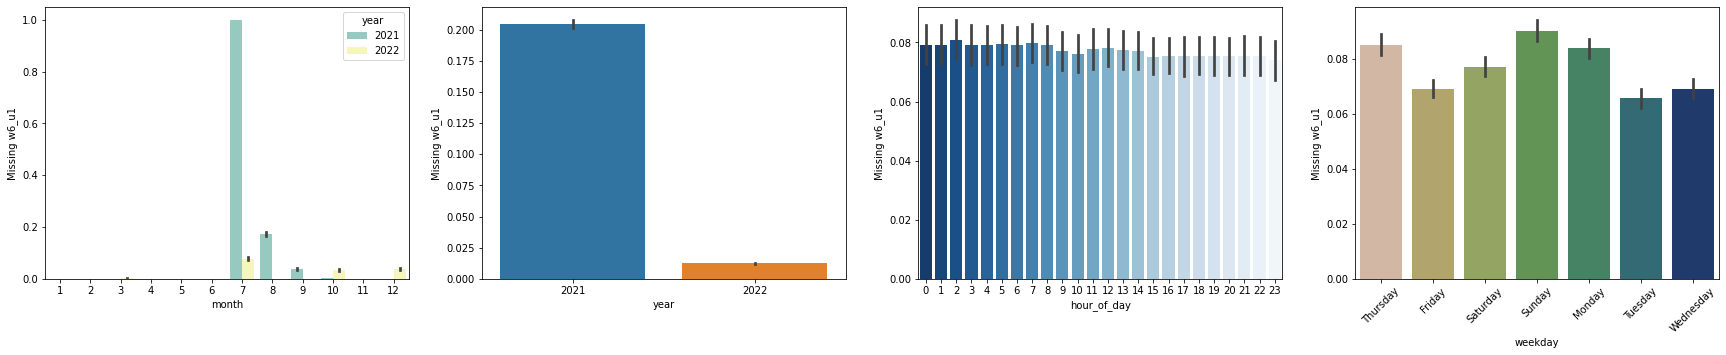

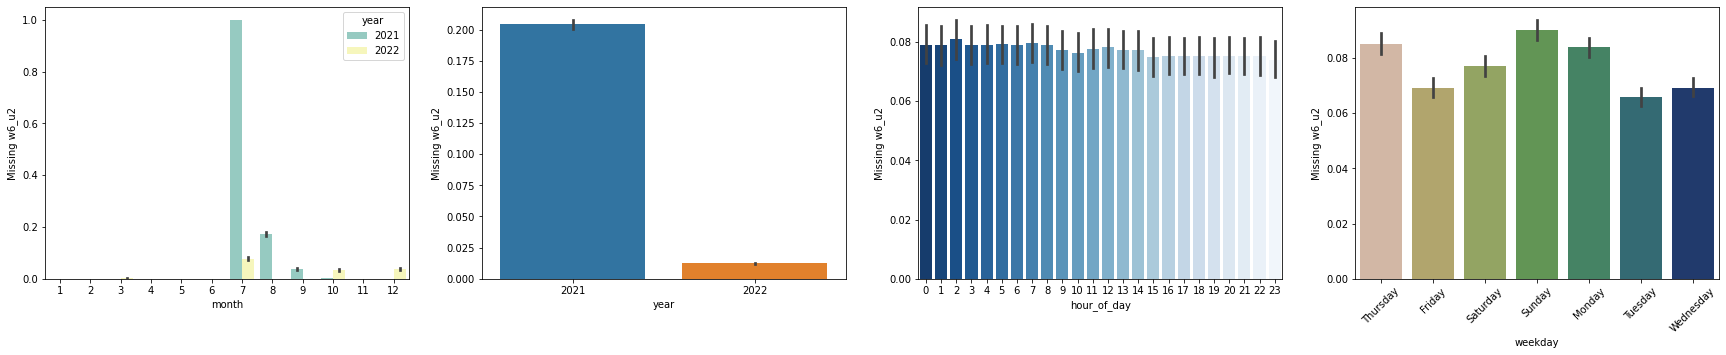

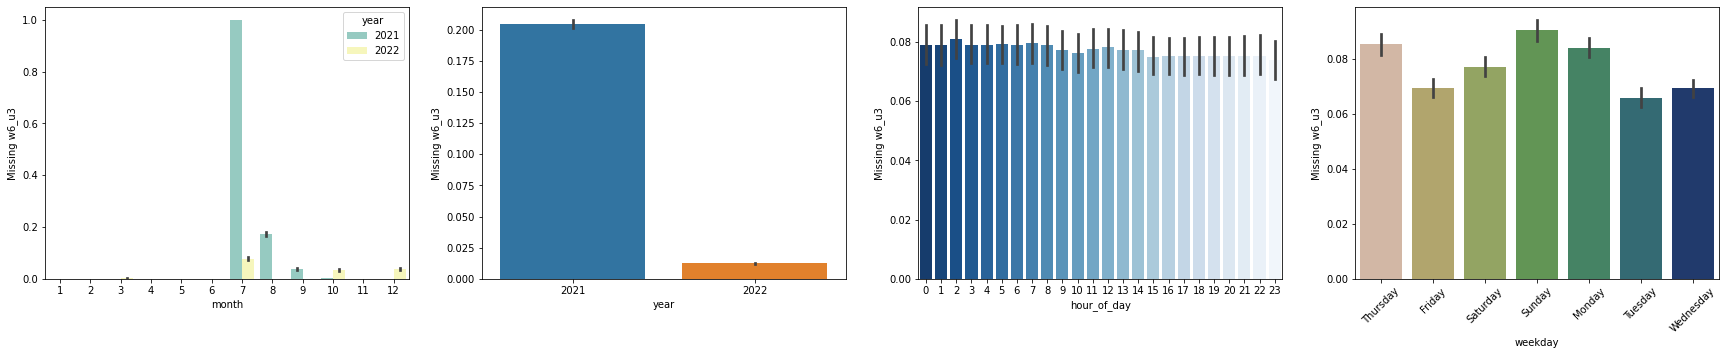

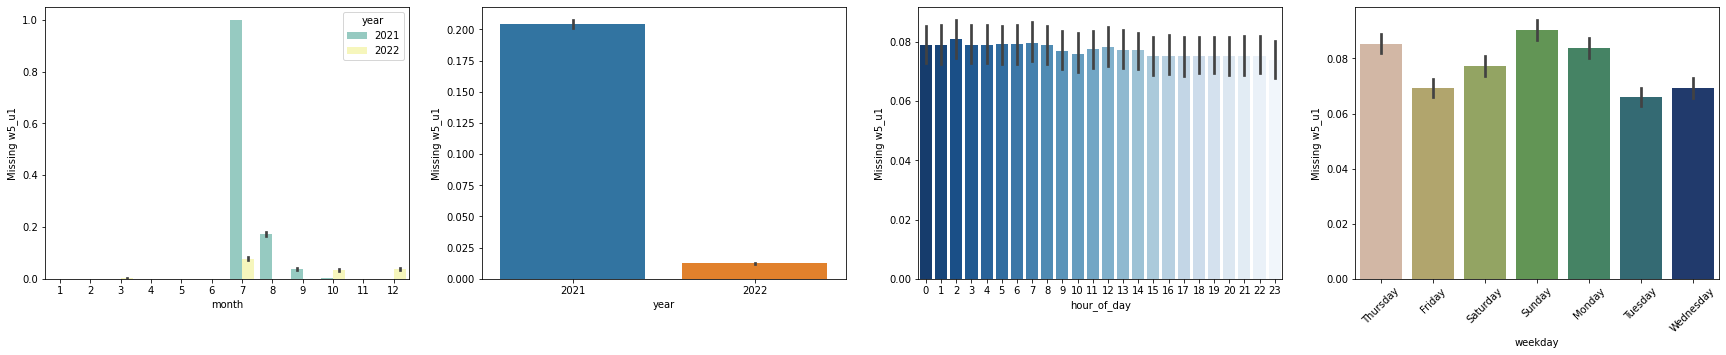

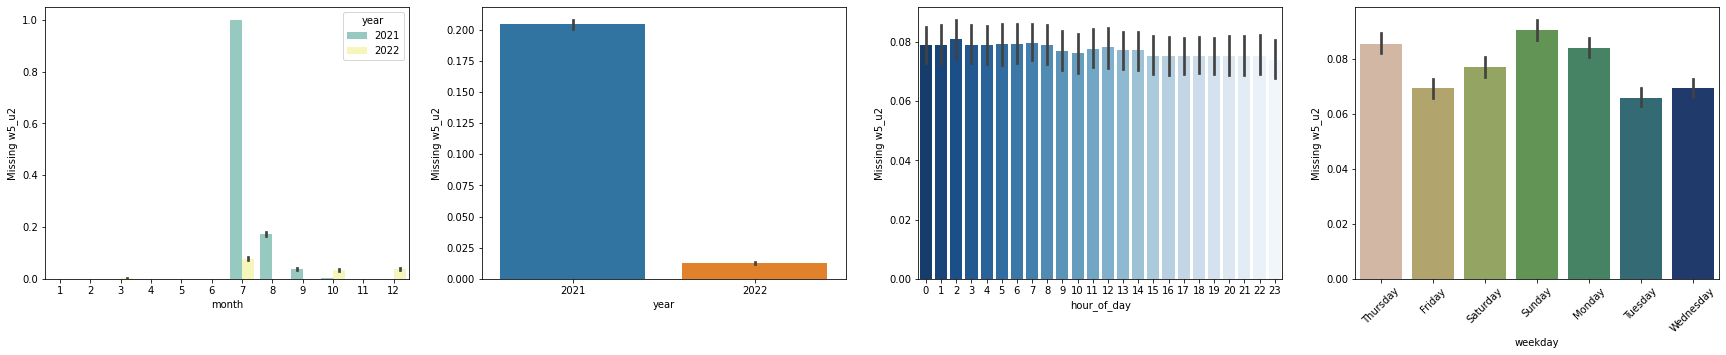

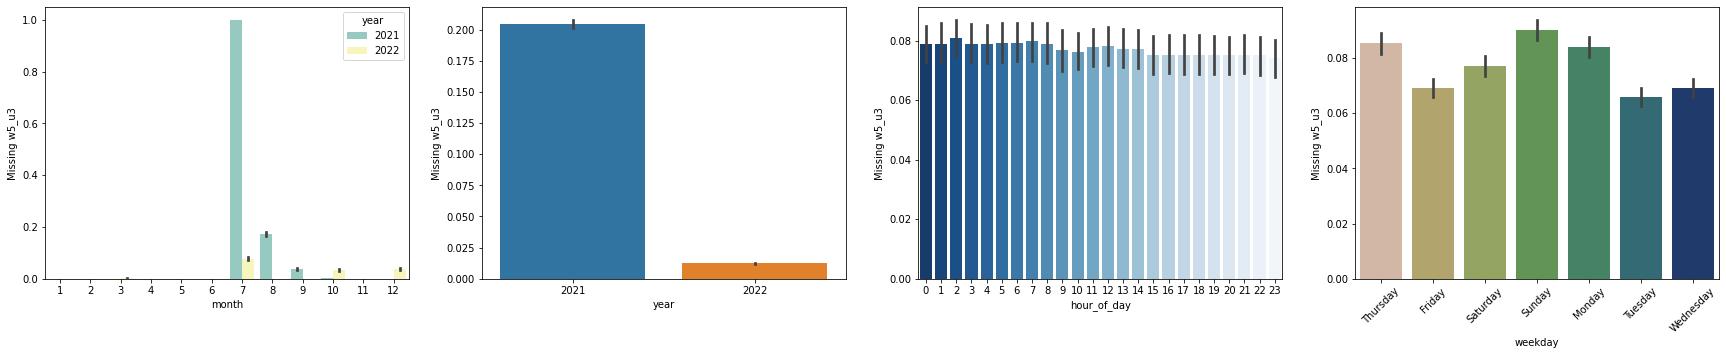

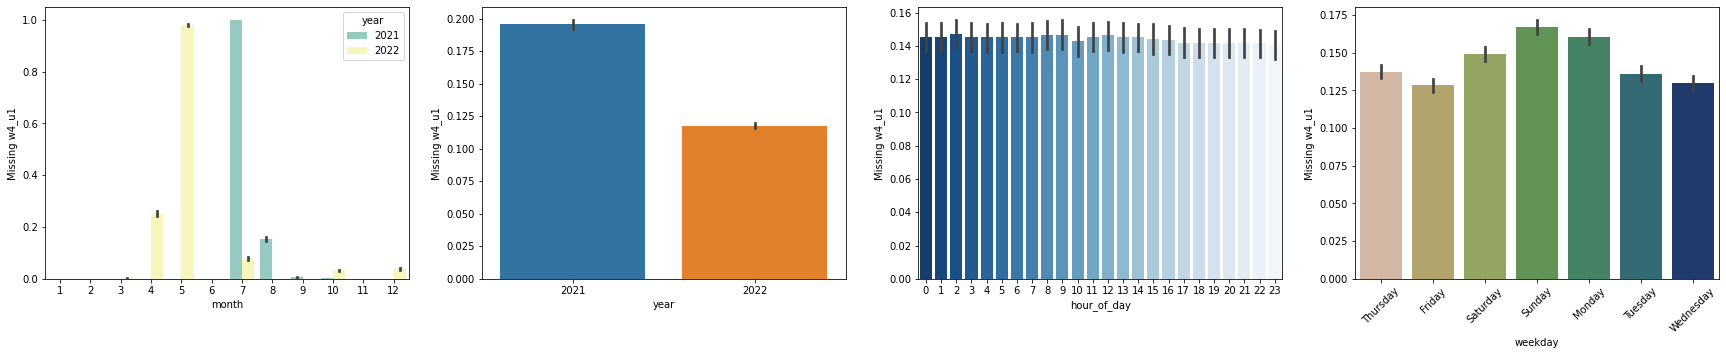

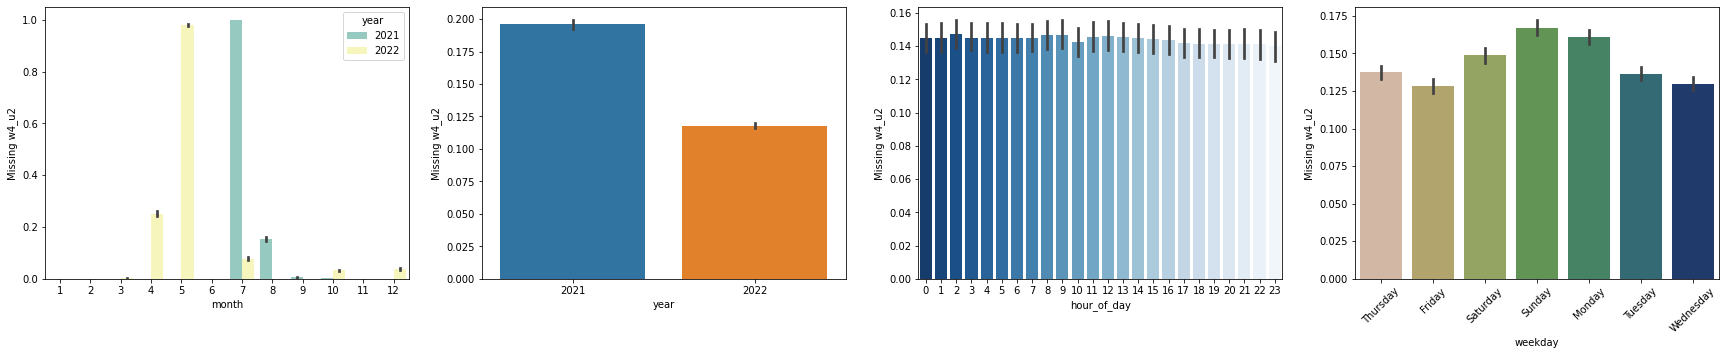

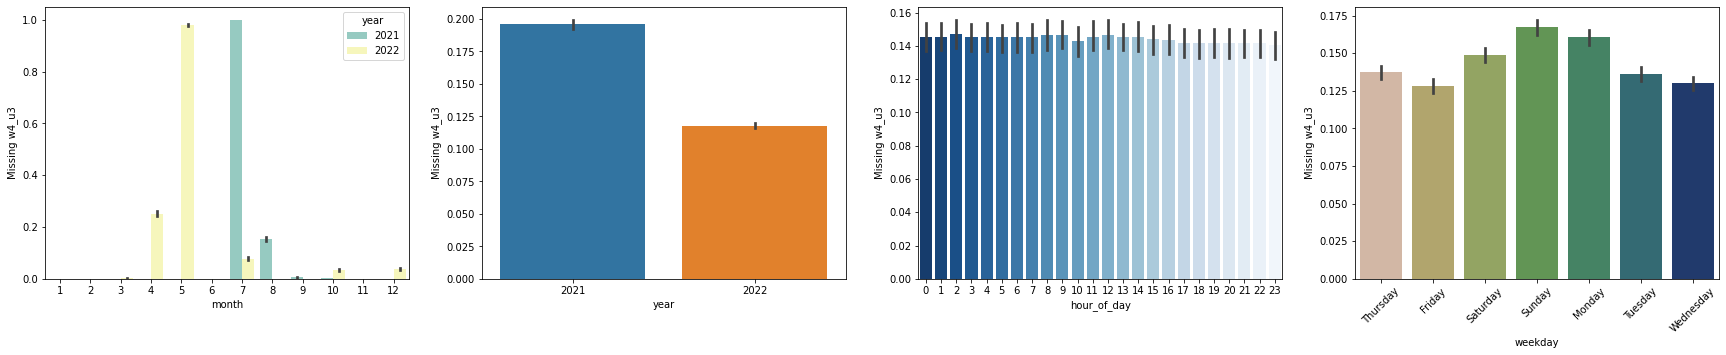

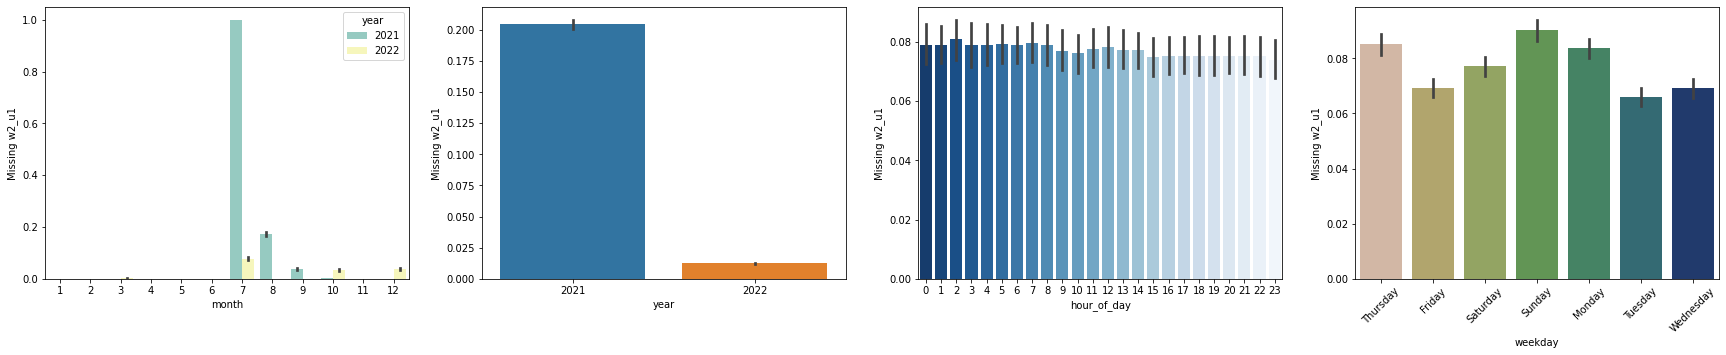

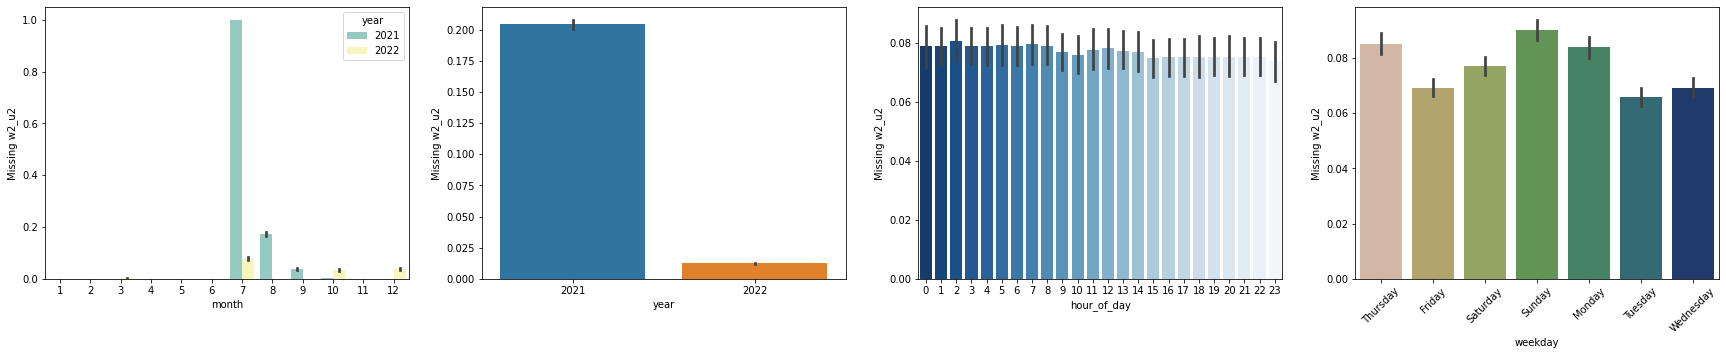

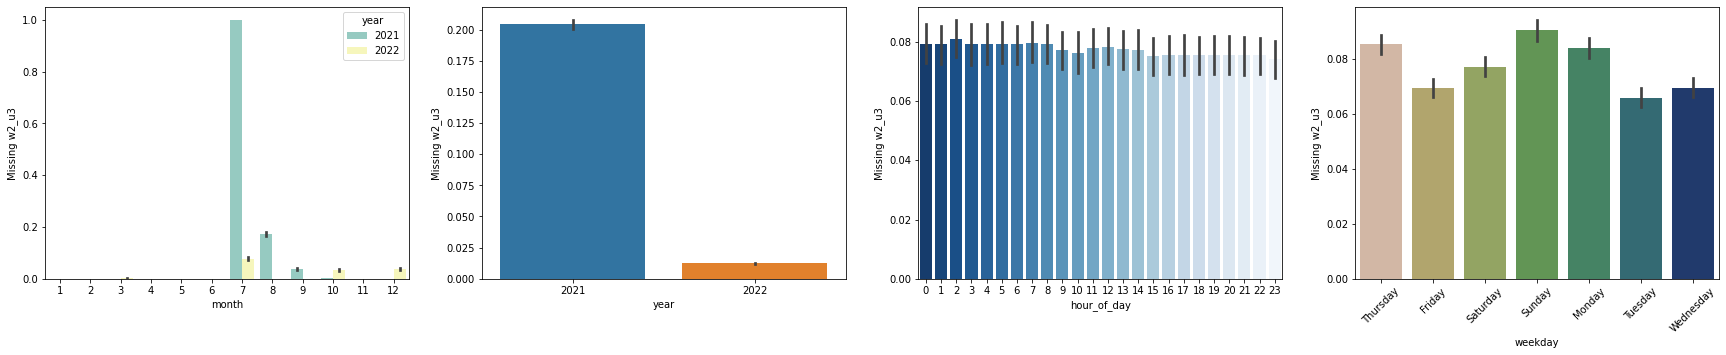

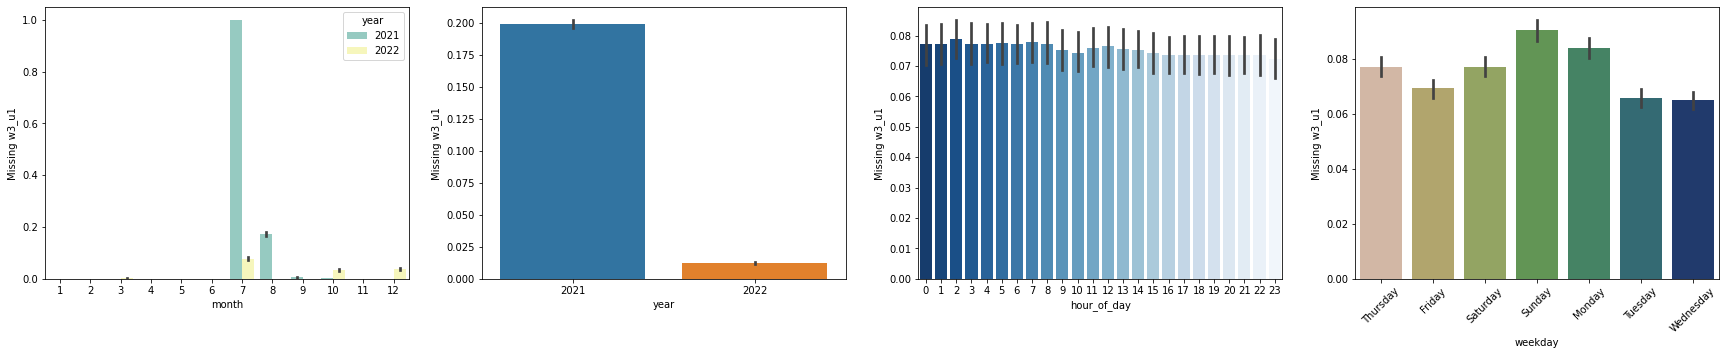

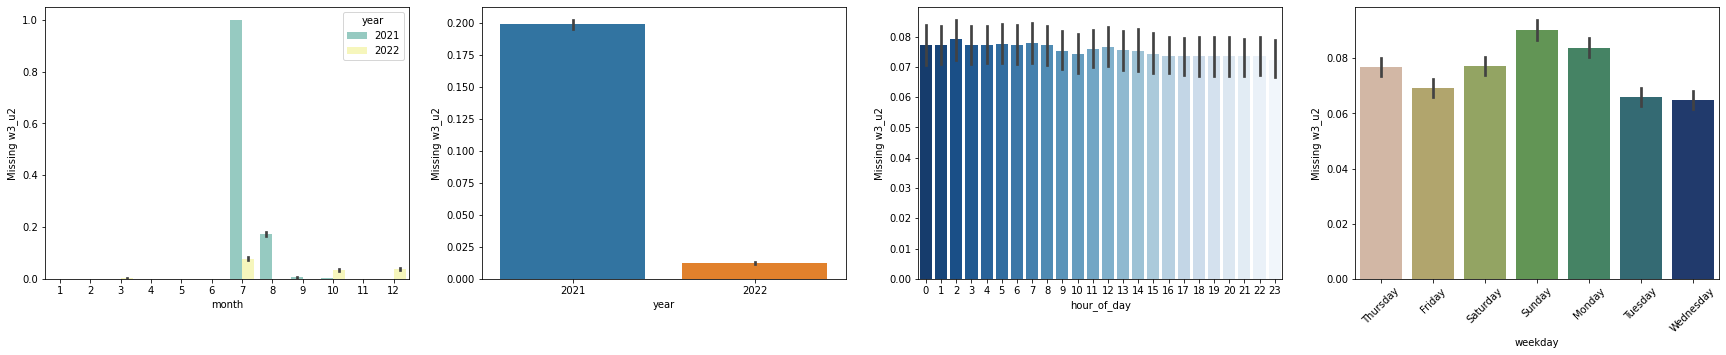

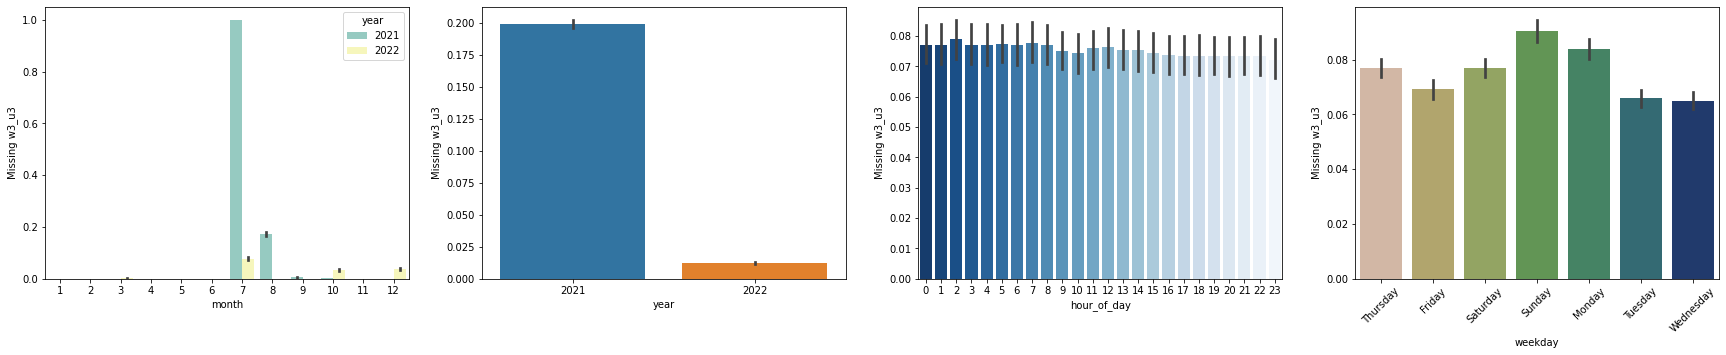

In [ ]:
nan_distribution(missing_voltage,datetimes)

From the above barplots for Nan values we have a good understanding of how nan values are distributed. As we can see for all of power, current and voltage data, almost 100% of July 2021 is missing. So reindexing our dfs from 2021-07-01 was probably not the best solution. We are going to drop July 2021 completely and begin our data from 2021-08-01.

We create a function that keeps the dates from 2022-08-01 to the current date - 5 days, of our dfs.
---



In [ ]:
def select_range(df):
  """
  Parameters: df : pd.Dataframe : the dataframe that we want to check for missing datetime values

  Returns : ls : a list that contains all the 5 minute intervals from the start to the end of our dataframe's dates
  For this function to work the input df has to have Datetime index
"""
  df=df.loc['2021-08-01 00:00:00':bring_current_datetime_minus5()]
  return df

Moreover, as our data are not being updated that fast, we will adjust our end date to current date minus 5 days, so are assuming that we have not taken data for the last 5 days

In [ ]:
def bring_current_datetime_minus5():
  """
  Parameters: None

  Returns: dt_string : string :the current datetime 
  """
  from datetime import datetime, timedelta

  # datetime object containing current date and time
  now = datetime.now()
  now = now - timedelta(days=5)
  
 
  # YY-mm-dd H:M:S format
  dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
  return dt_string

Now we are going to apply again the select_range function for all of our datasets with the new range of index applied

In [ ]:
power_dt=select_range(power_dt)
current_dt=select_range(current_dt)
voltage_dt=select_range(voltage_dt)

And now we are going to check again nans distribution

In [ ]:
missing_power=missing_df(power_dt)
missing_current=missing_df(current_dt)
missing_voltage=missing_df(voltage_dt)

<ipython-input-10-50bdc74115df>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,4)
<ipython-input-10-50bdc74115df>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,4)
<ipython-input-10-50bdc74115df>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(

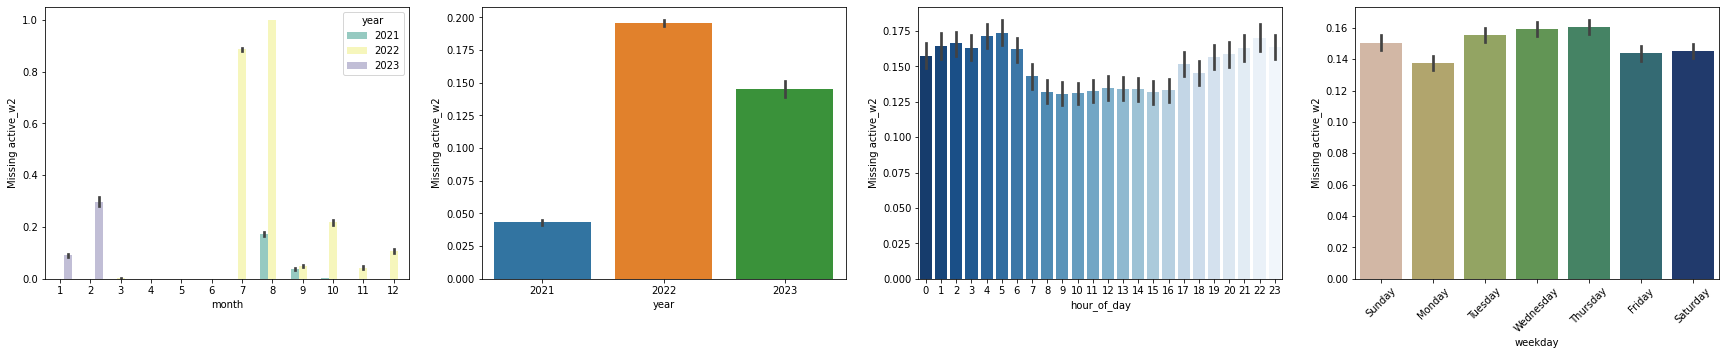

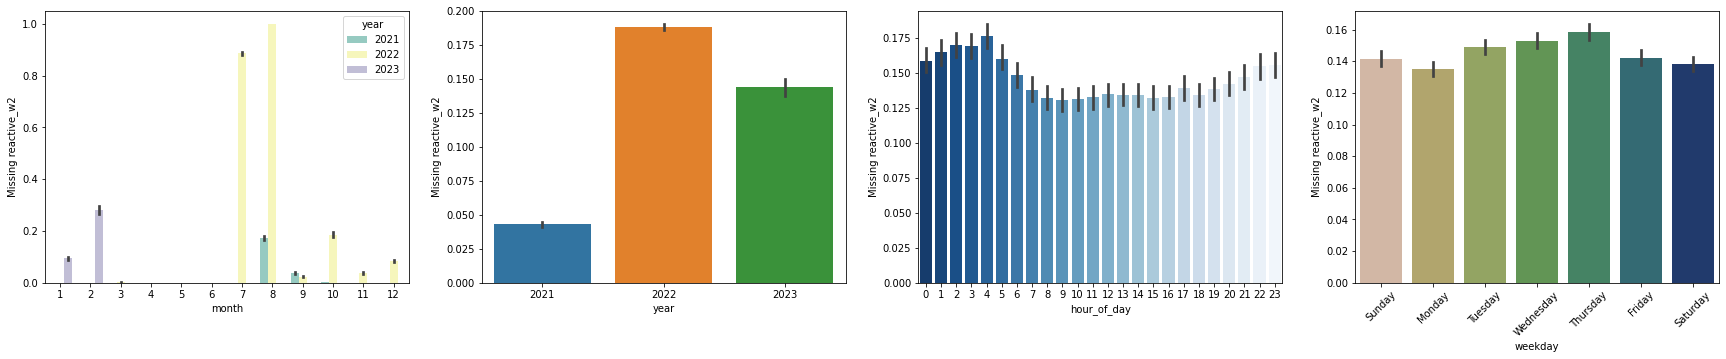

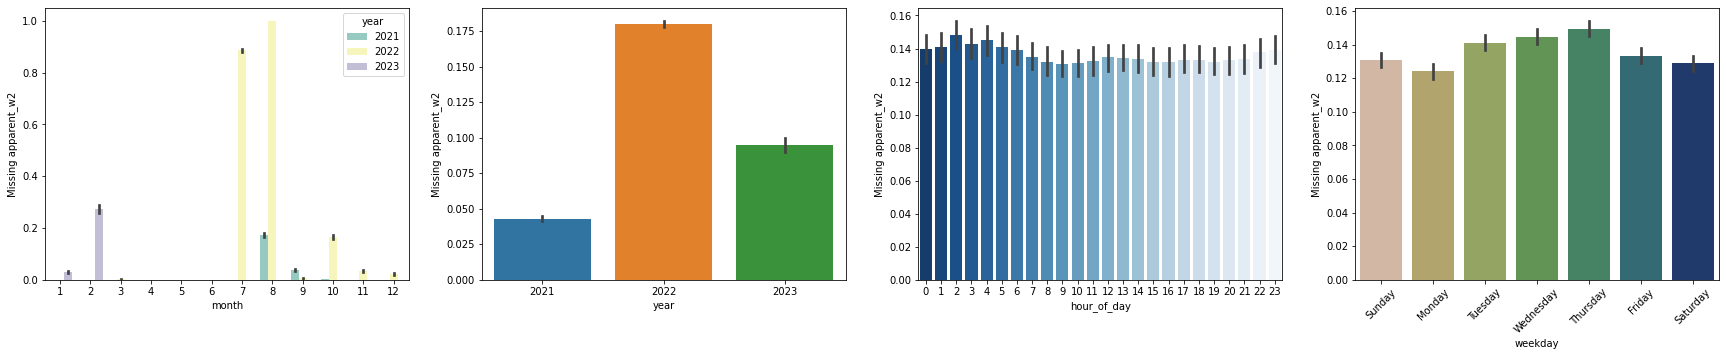

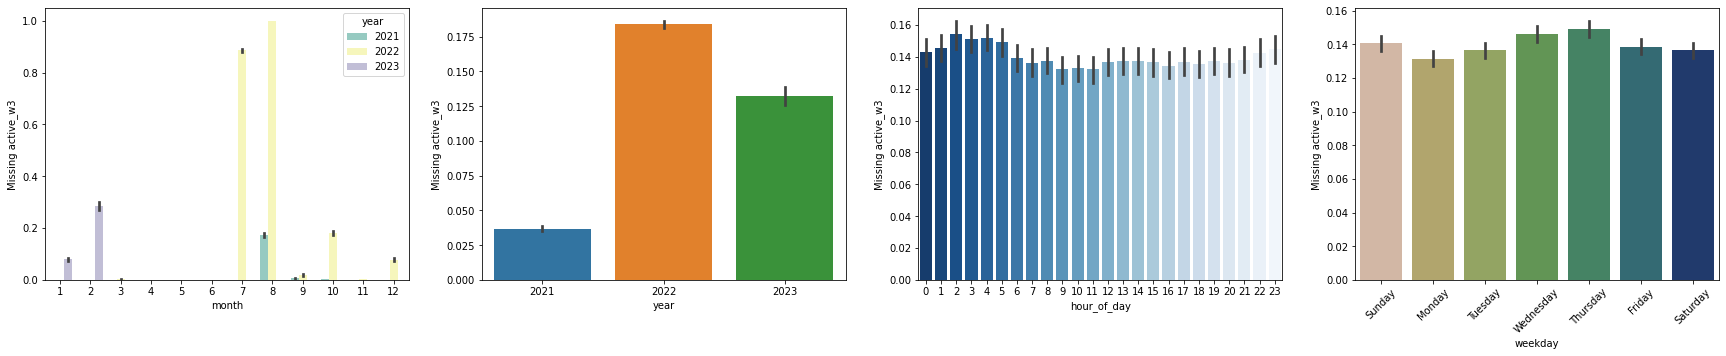

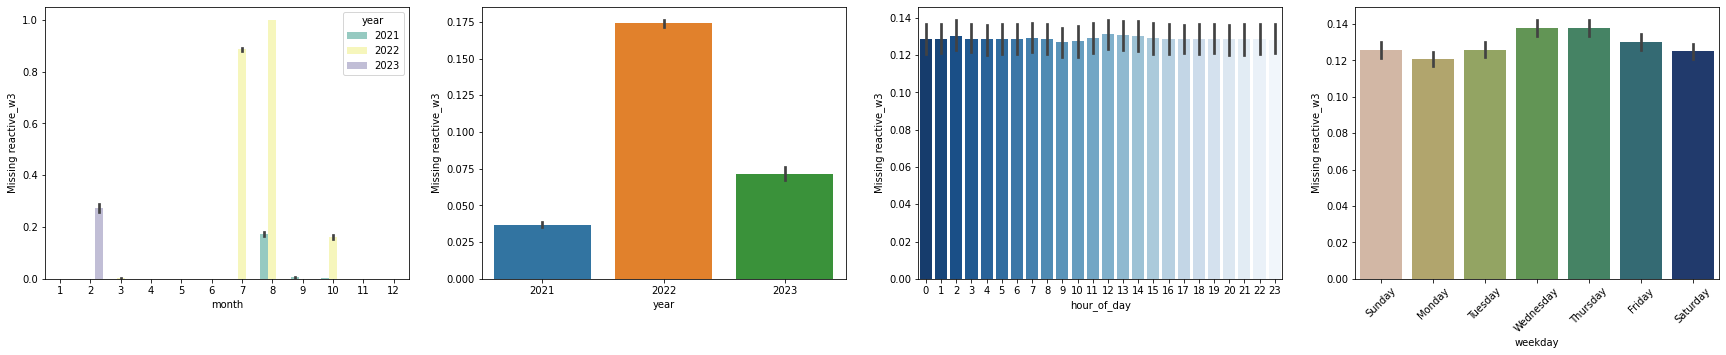

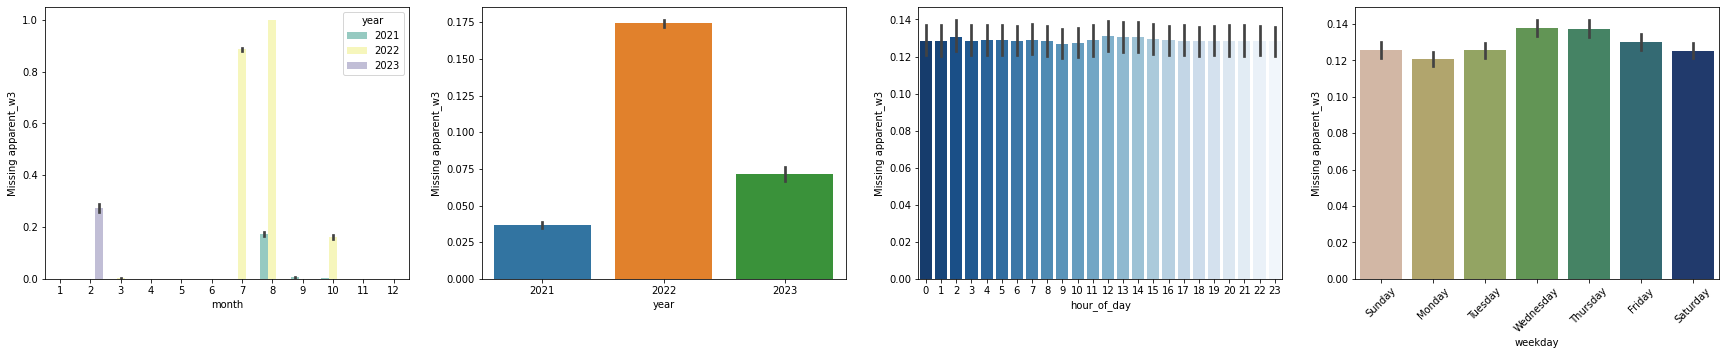

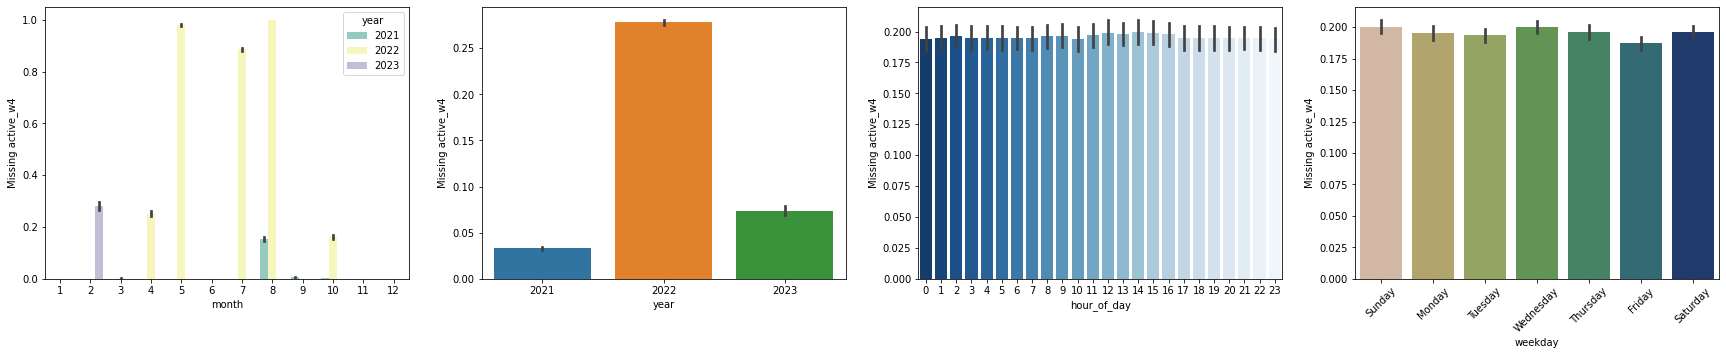

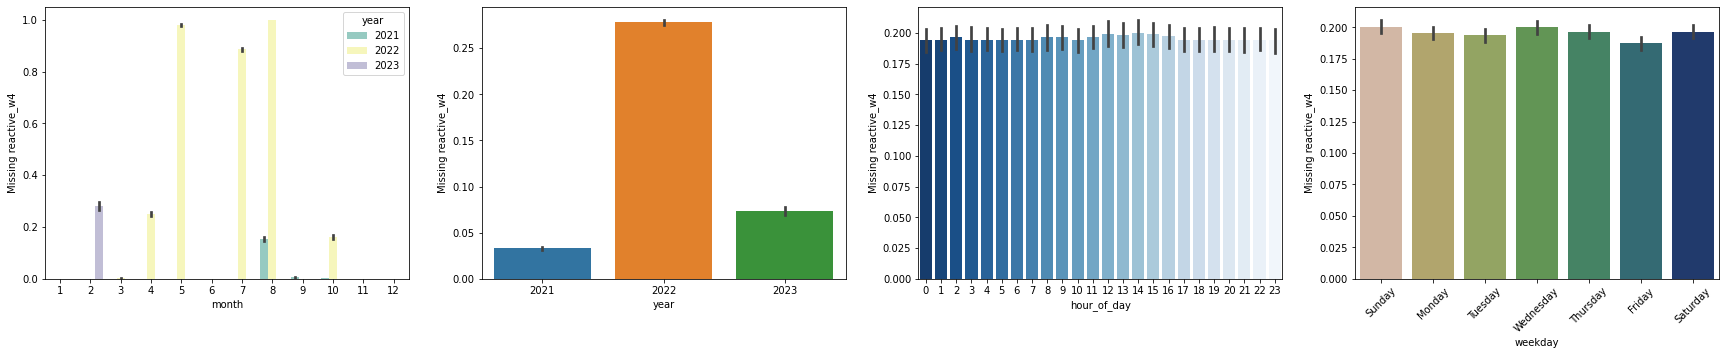

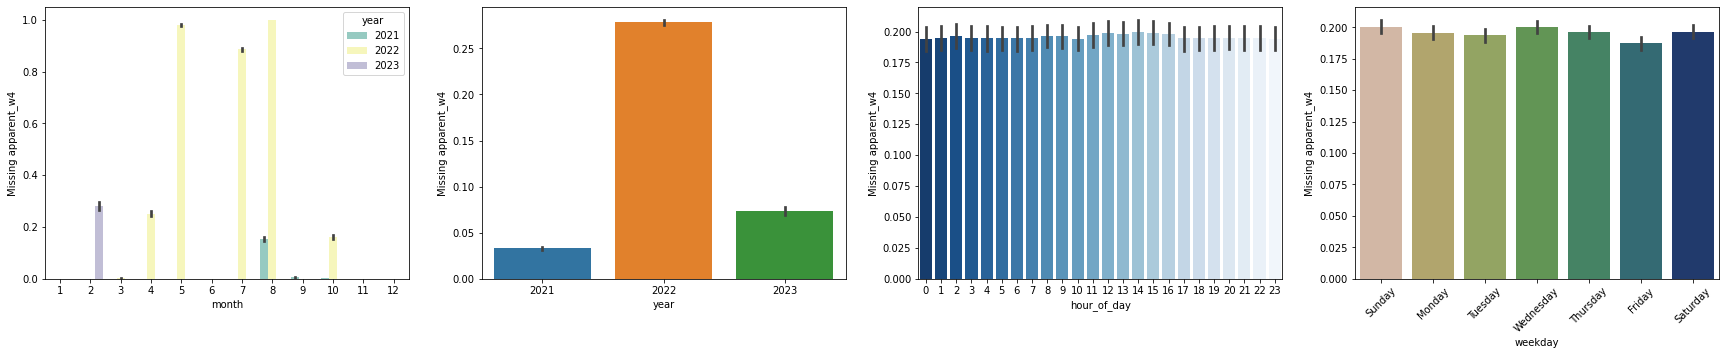

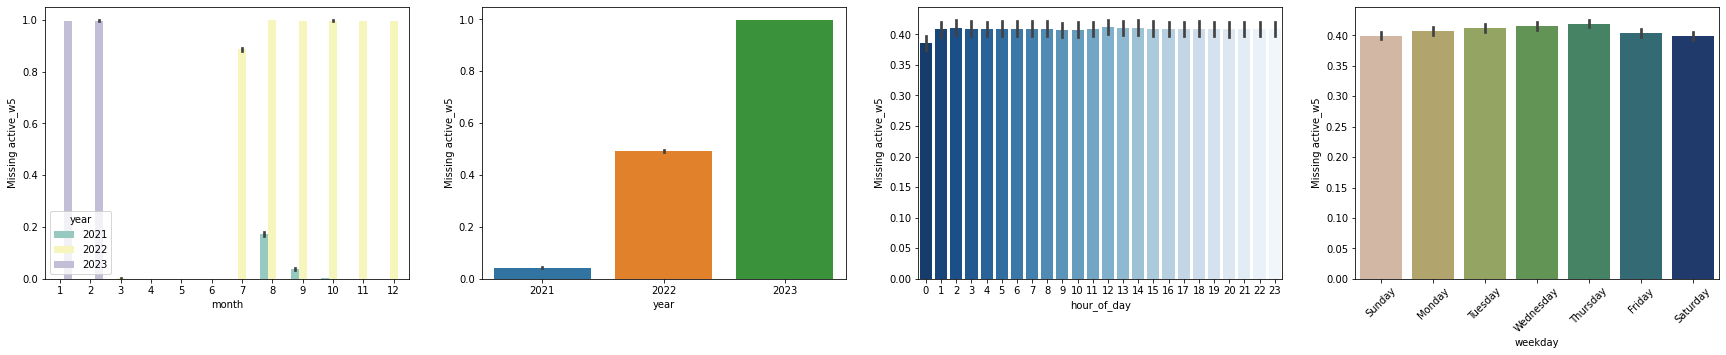

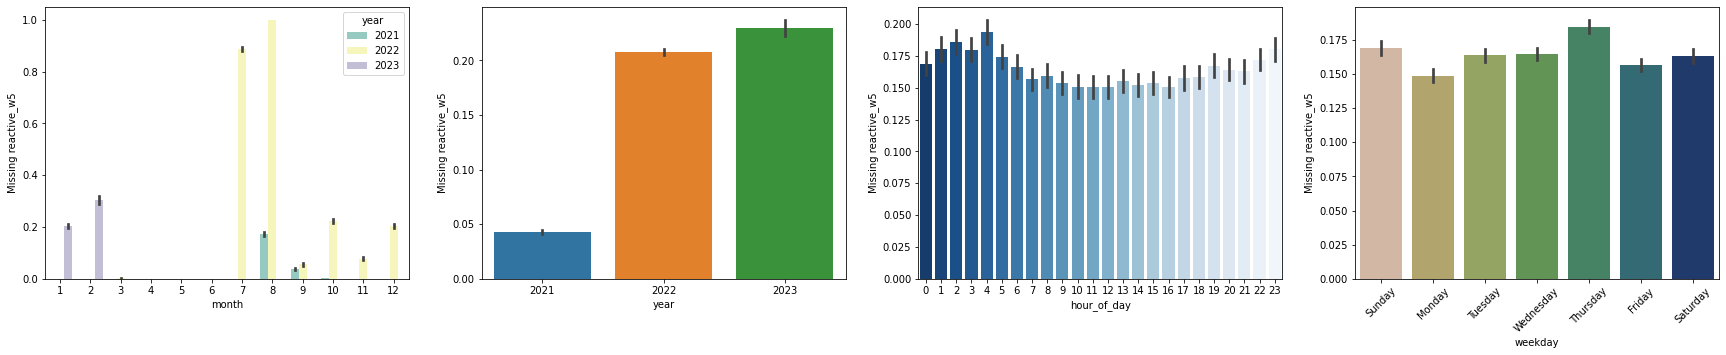

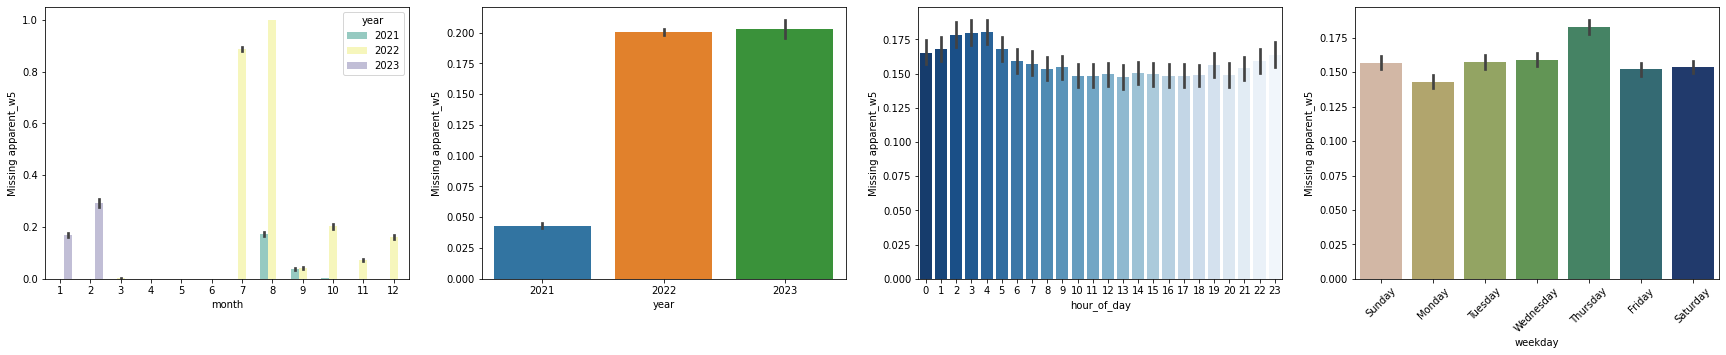

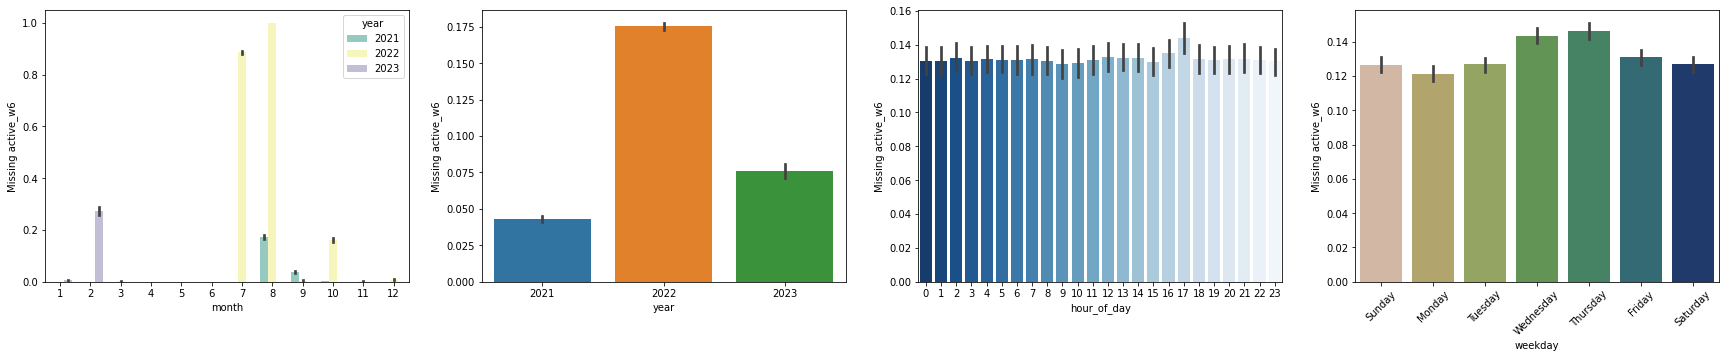

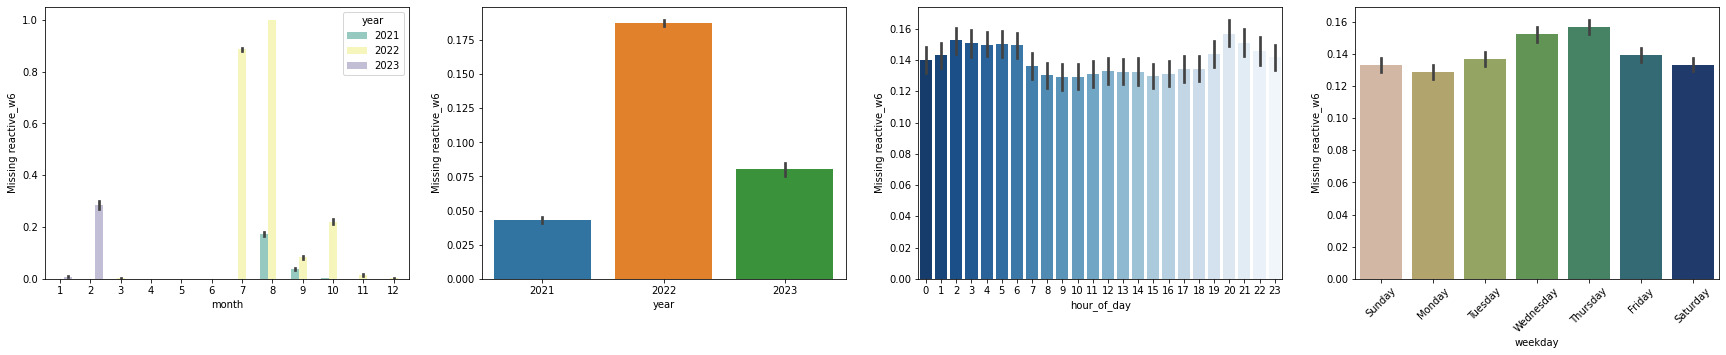

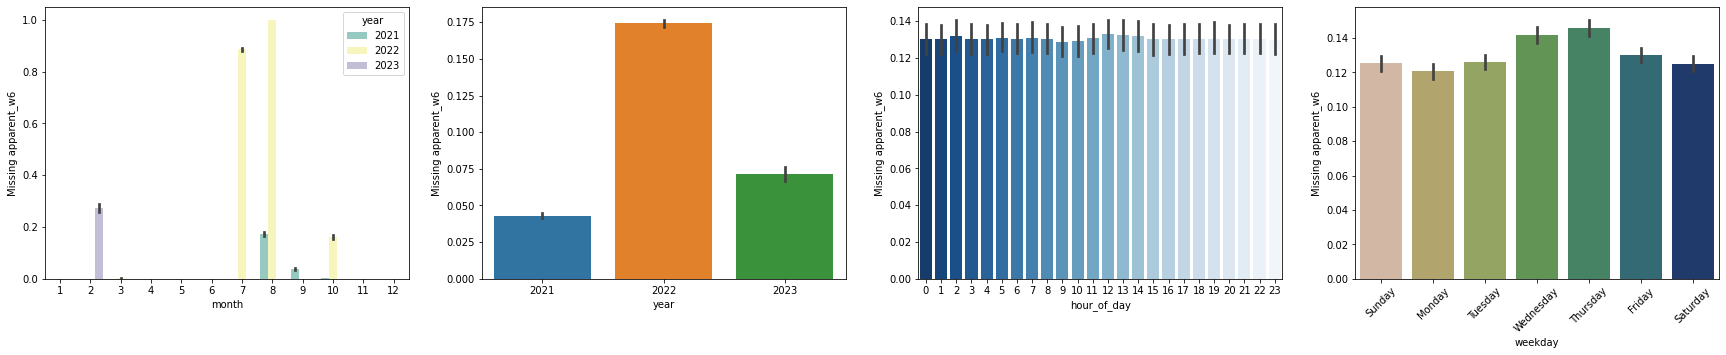

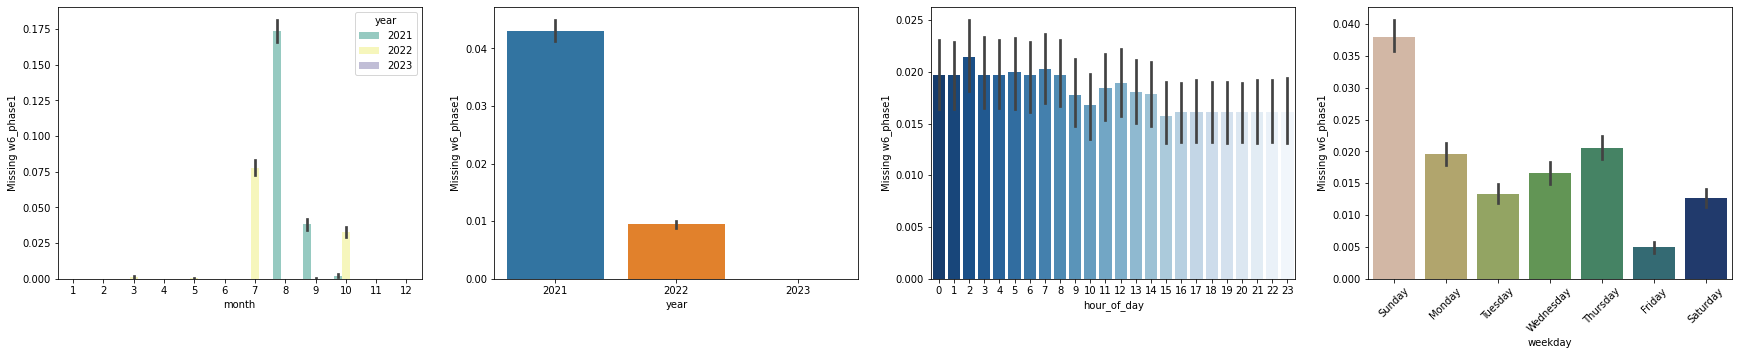

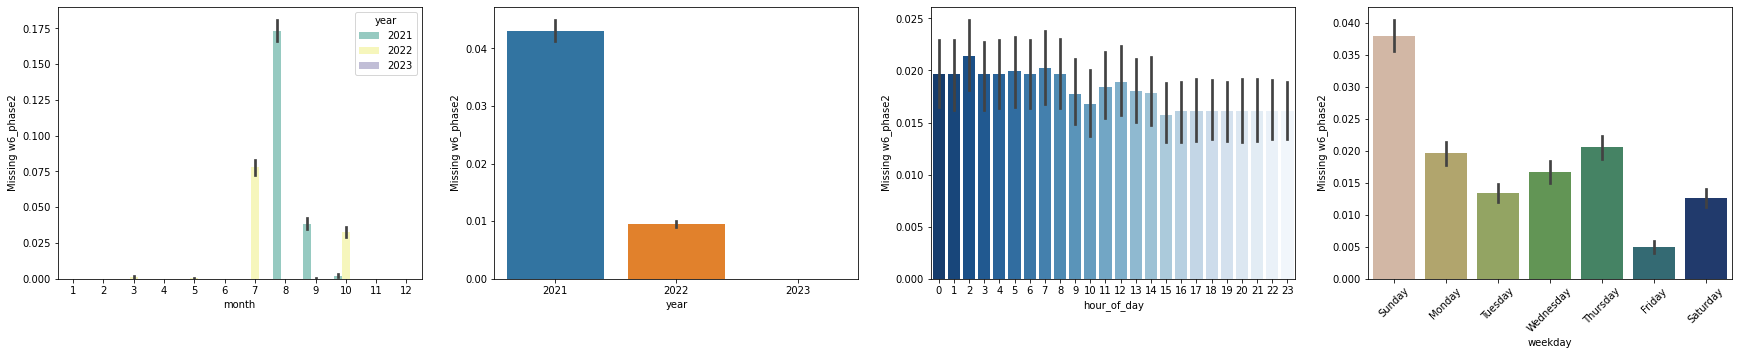

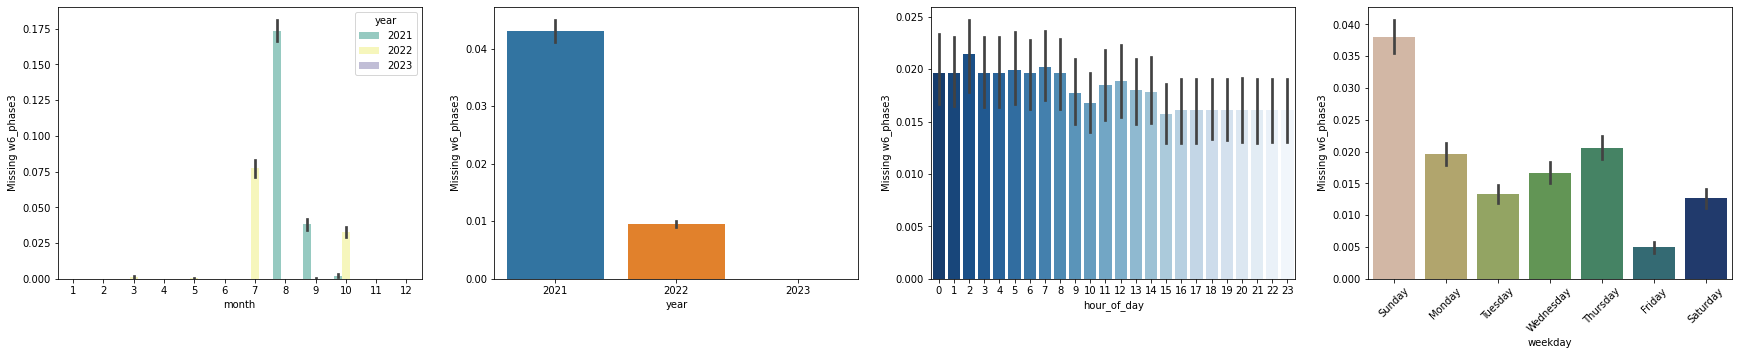

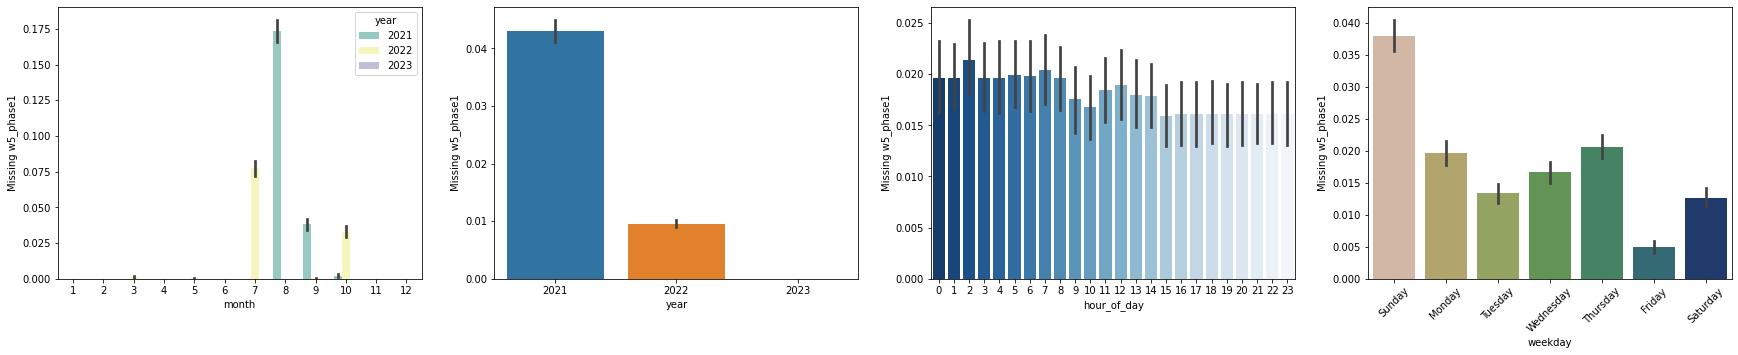

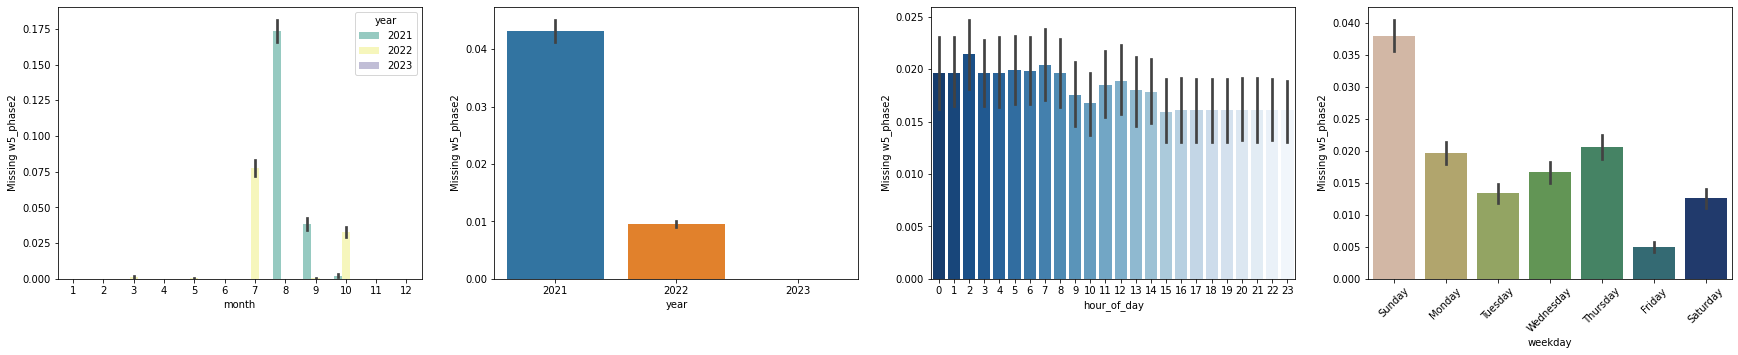

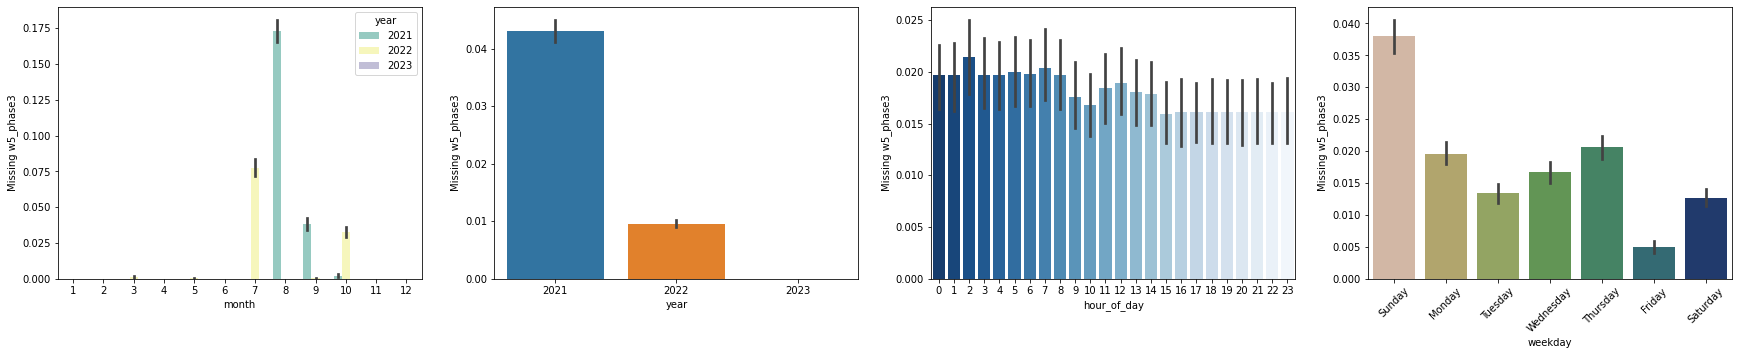

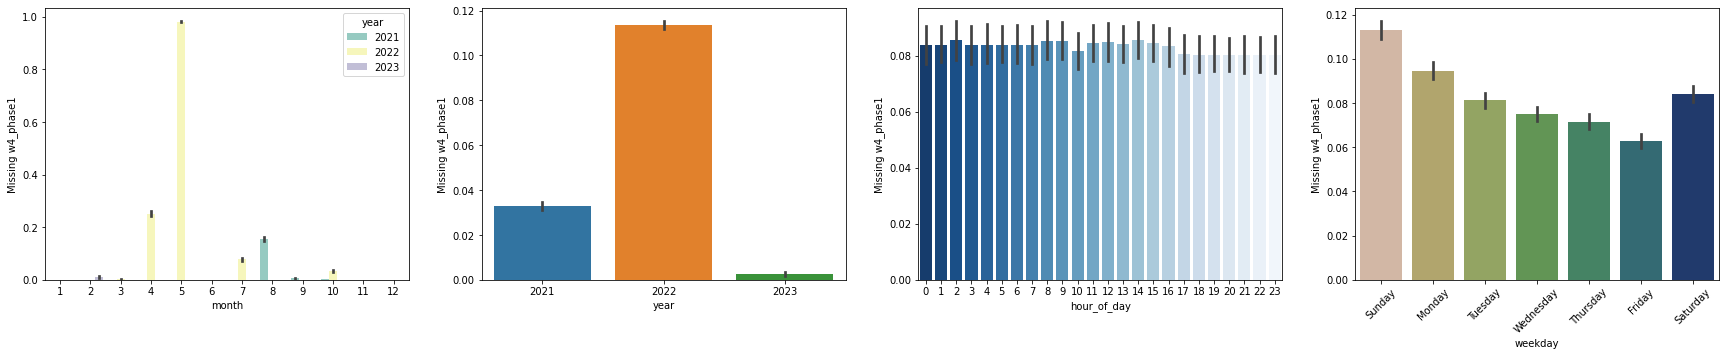

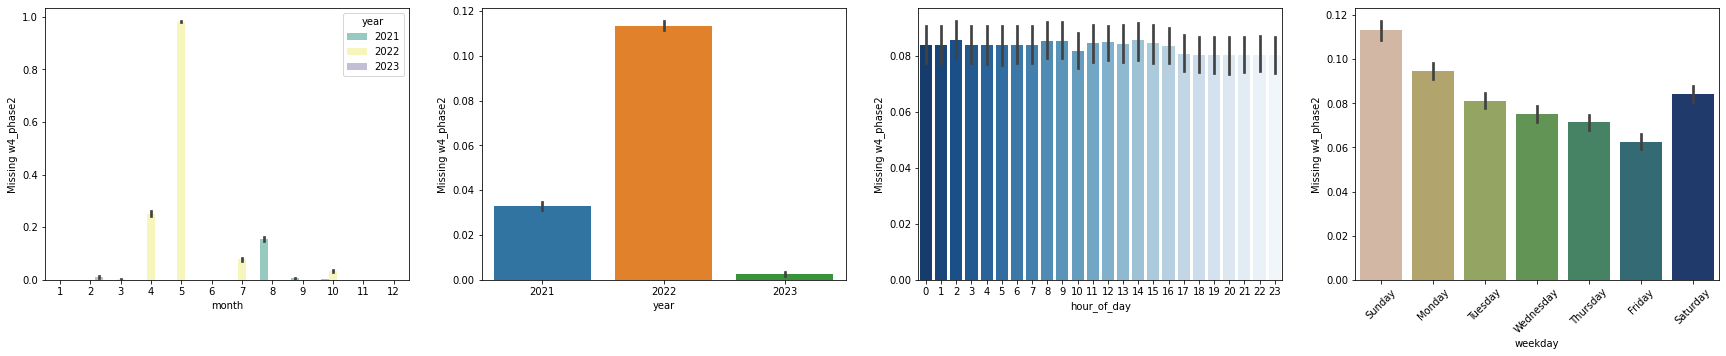

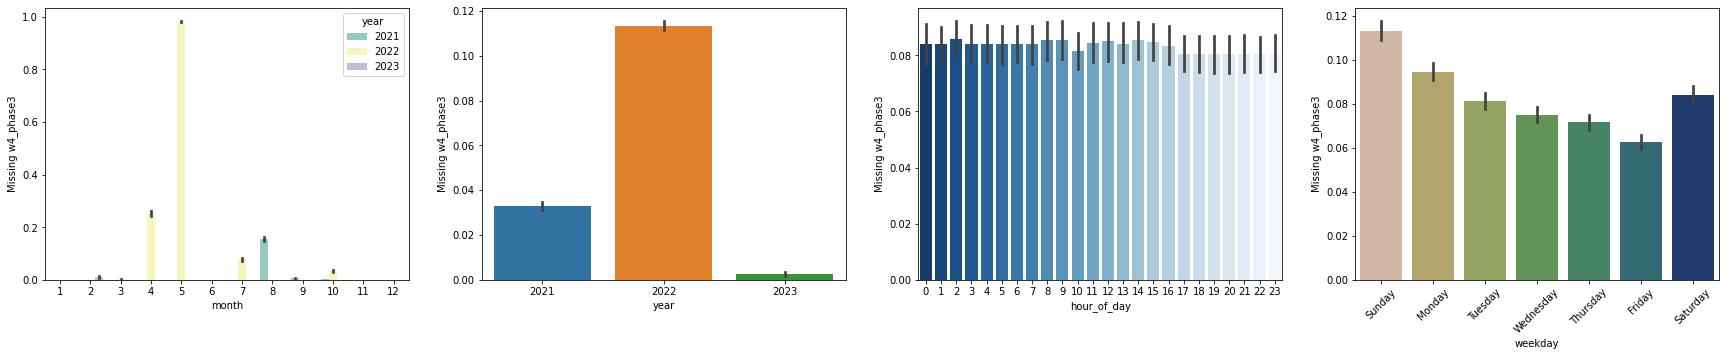

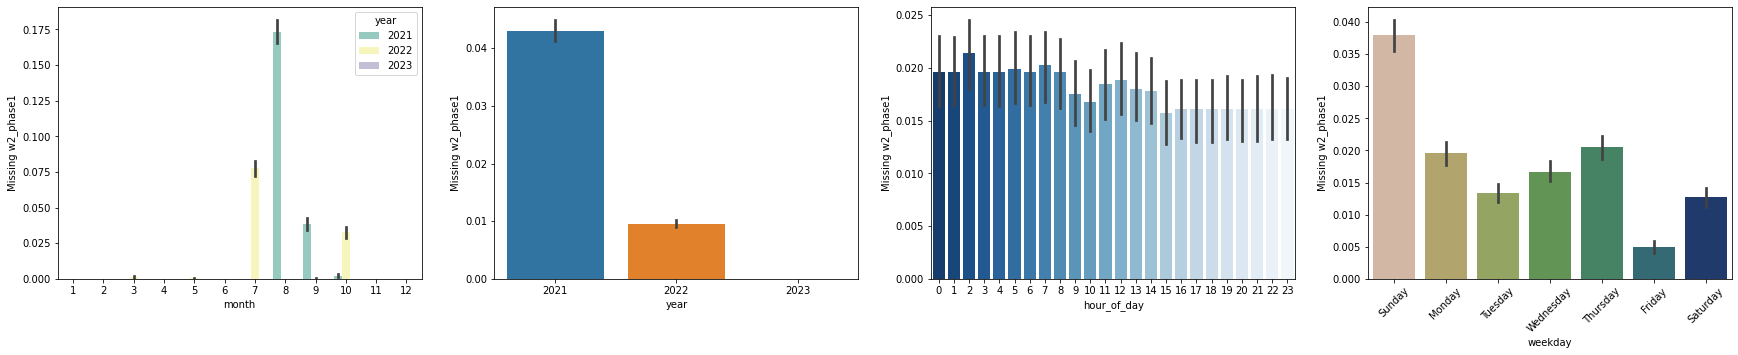

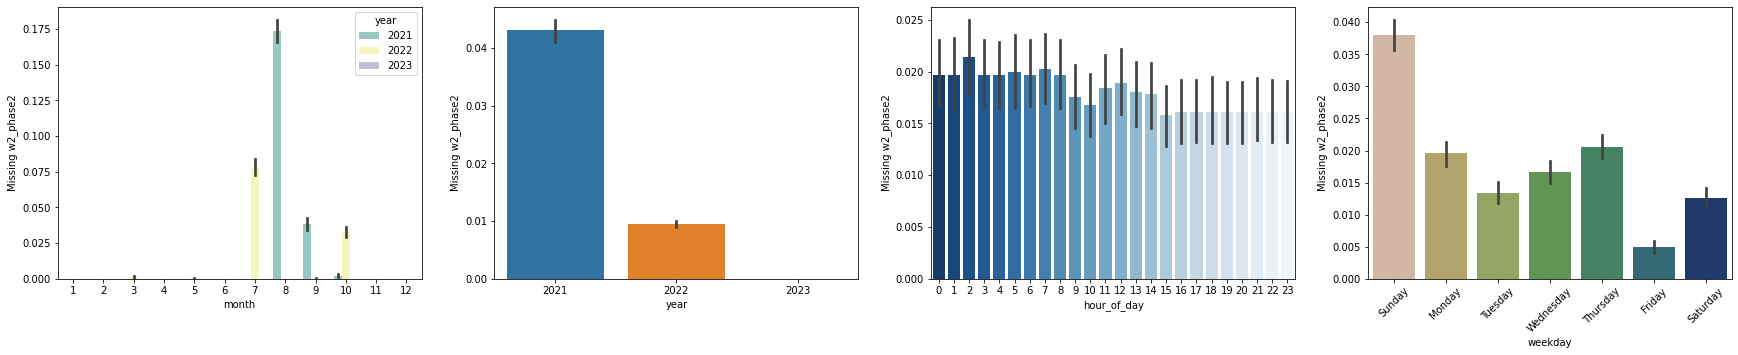

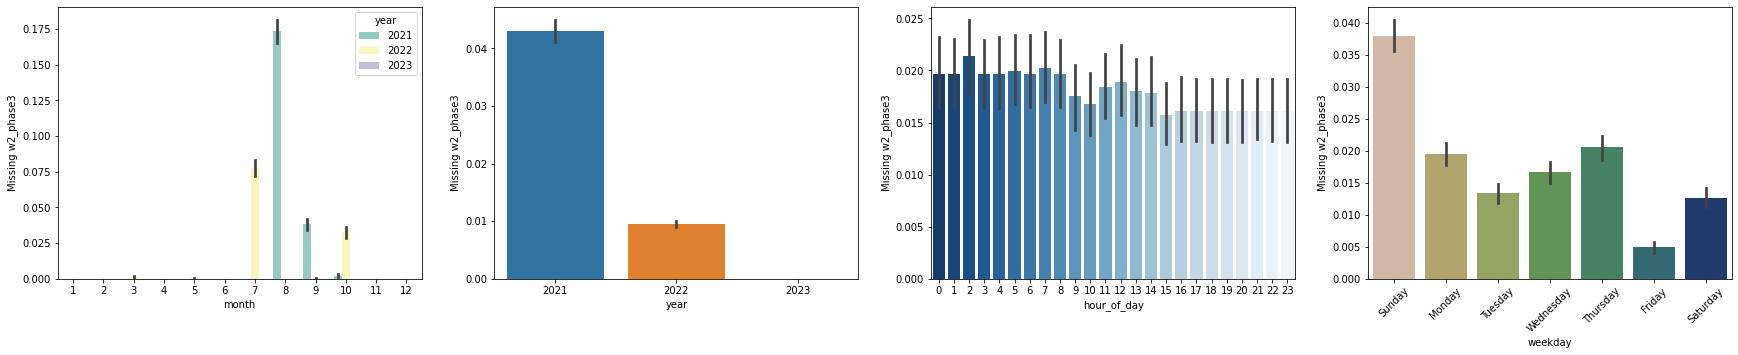

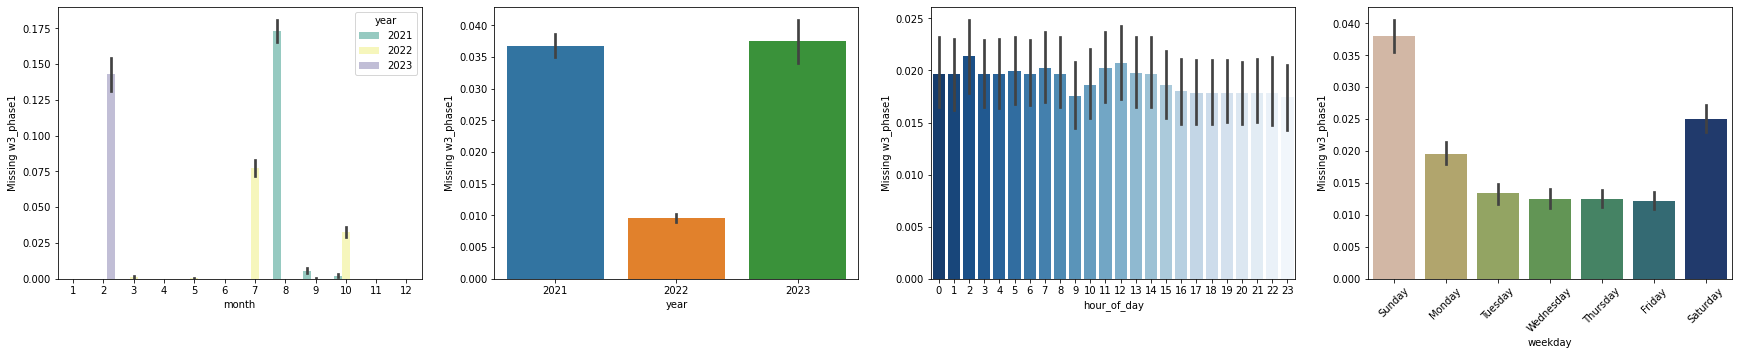

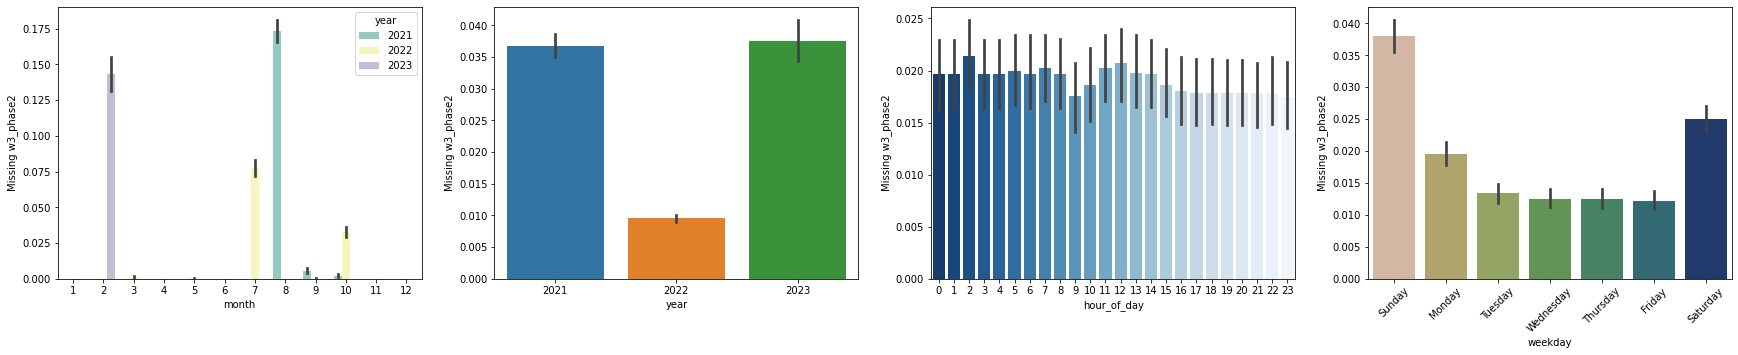

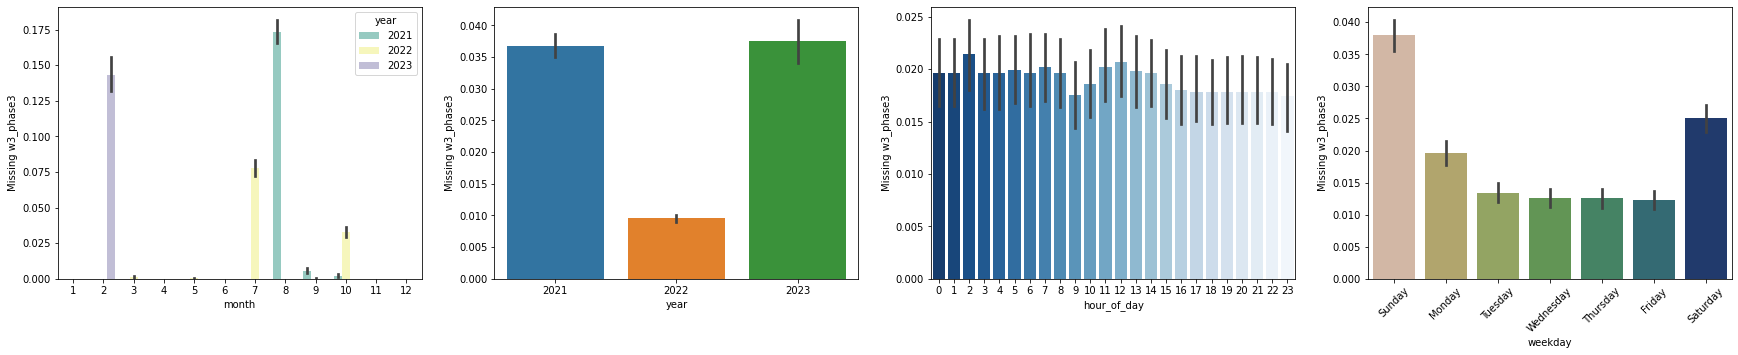

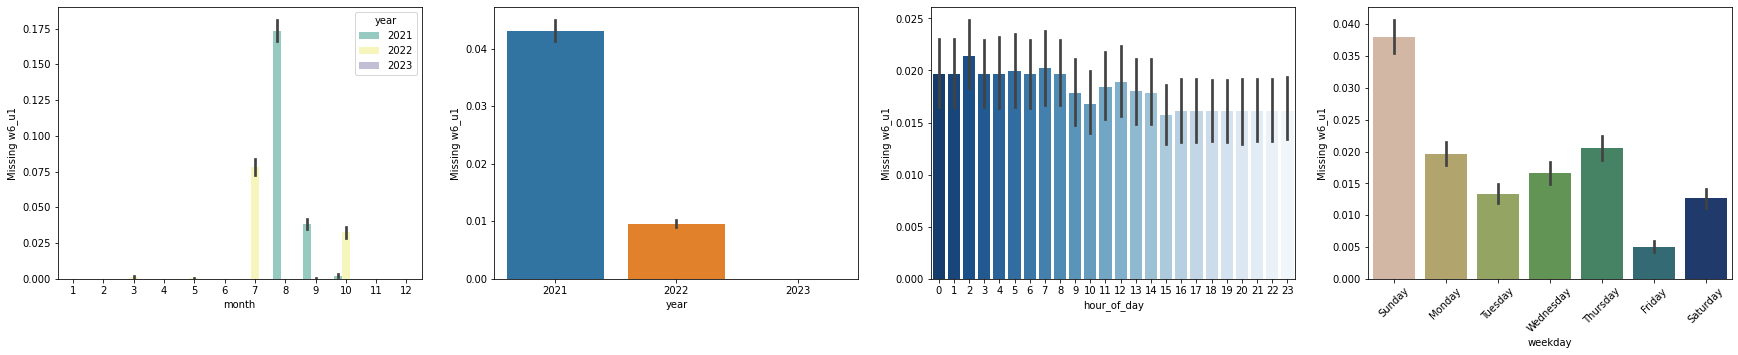

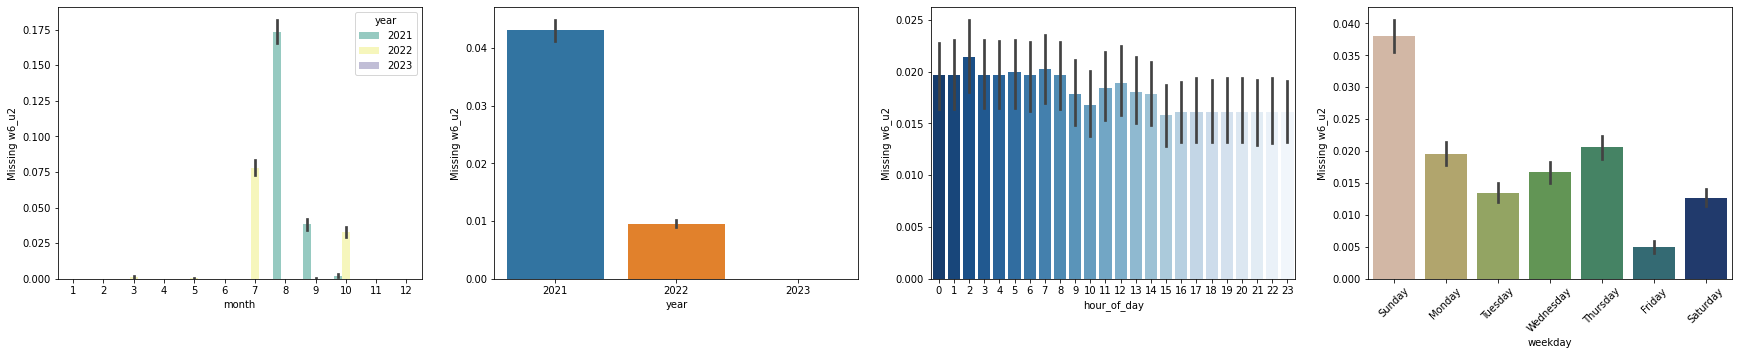

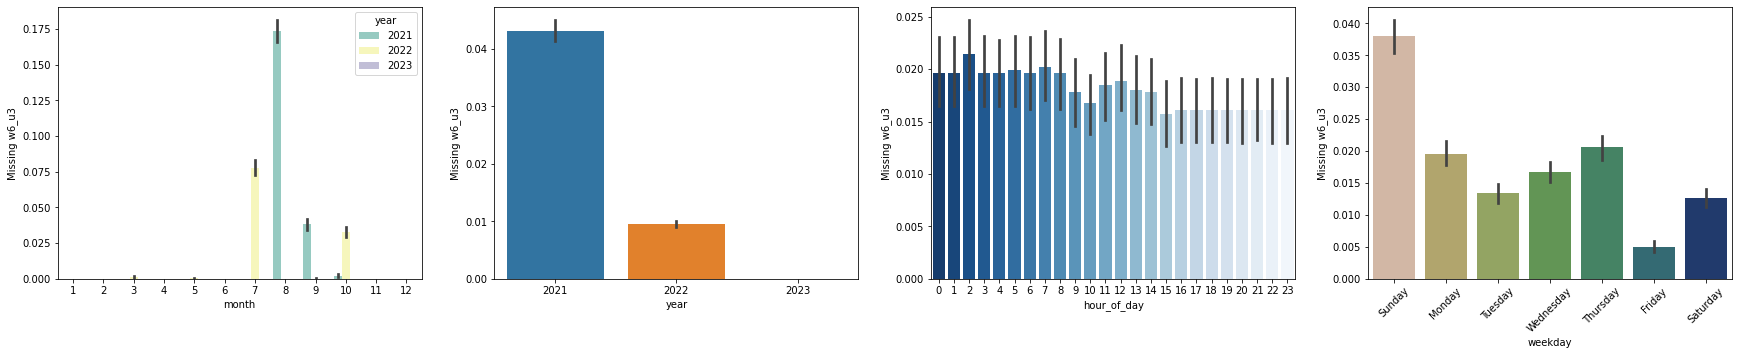

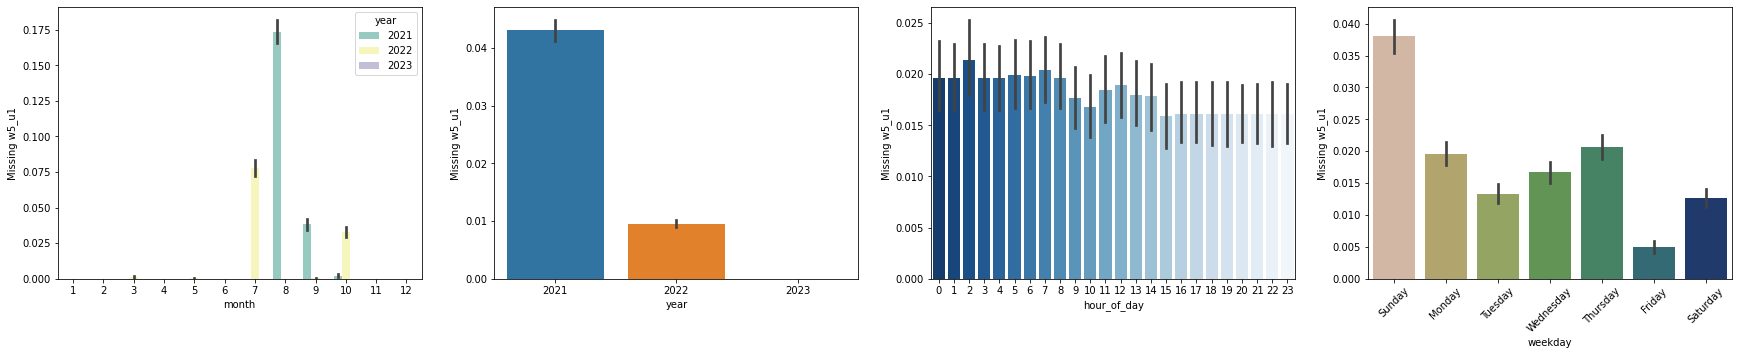

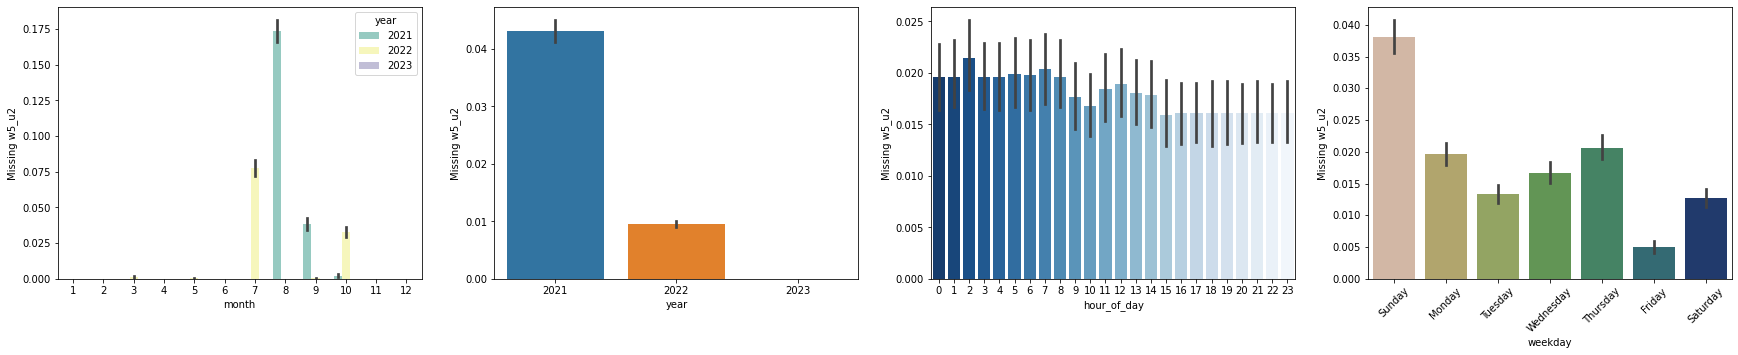

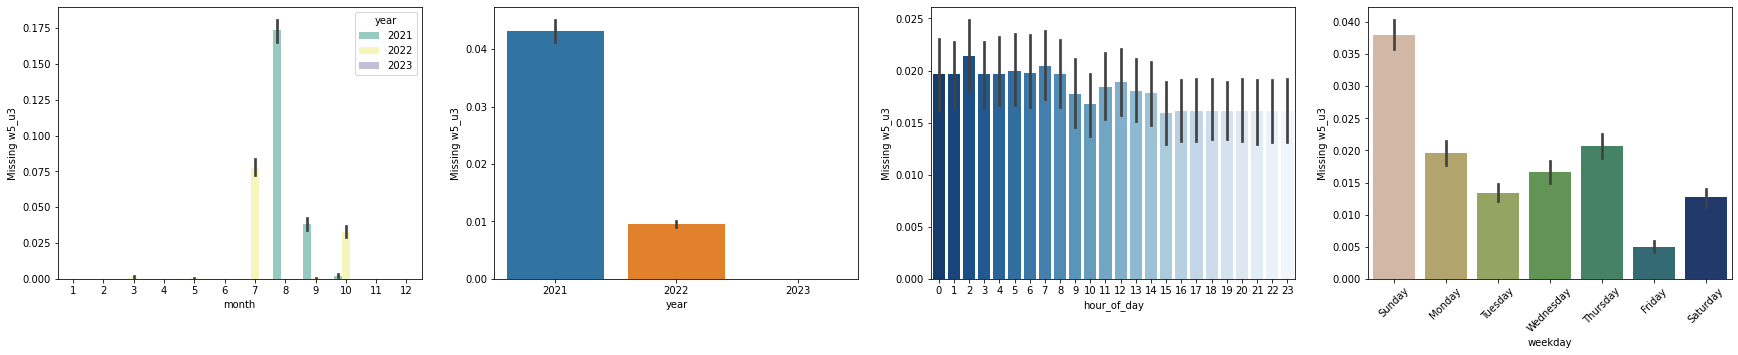

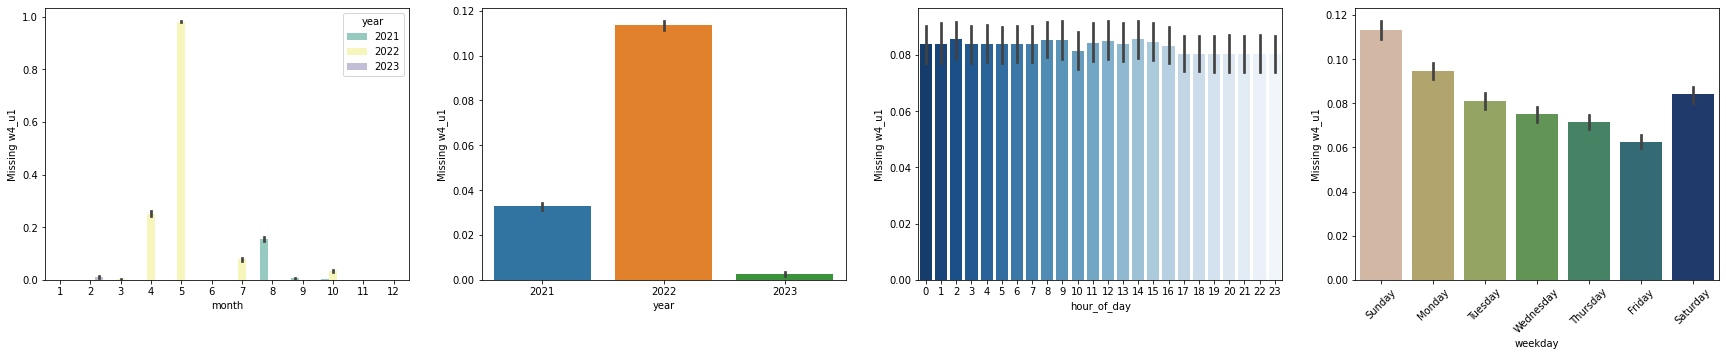

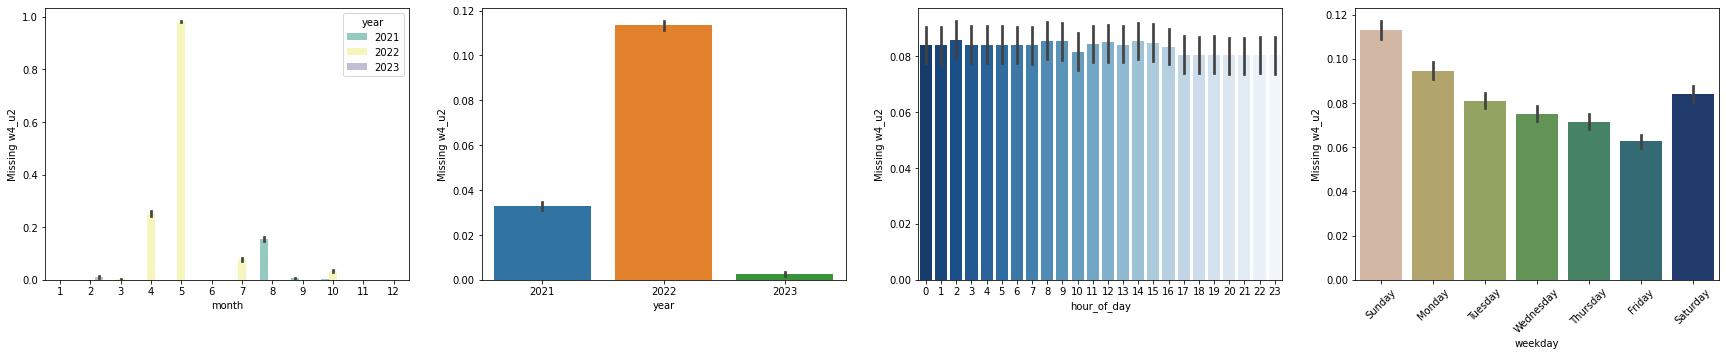

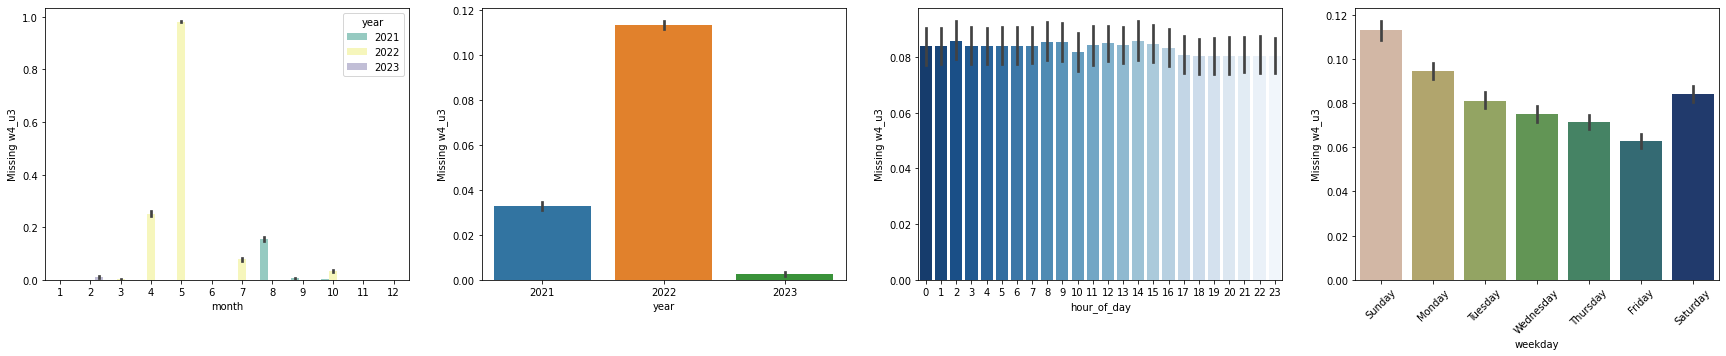

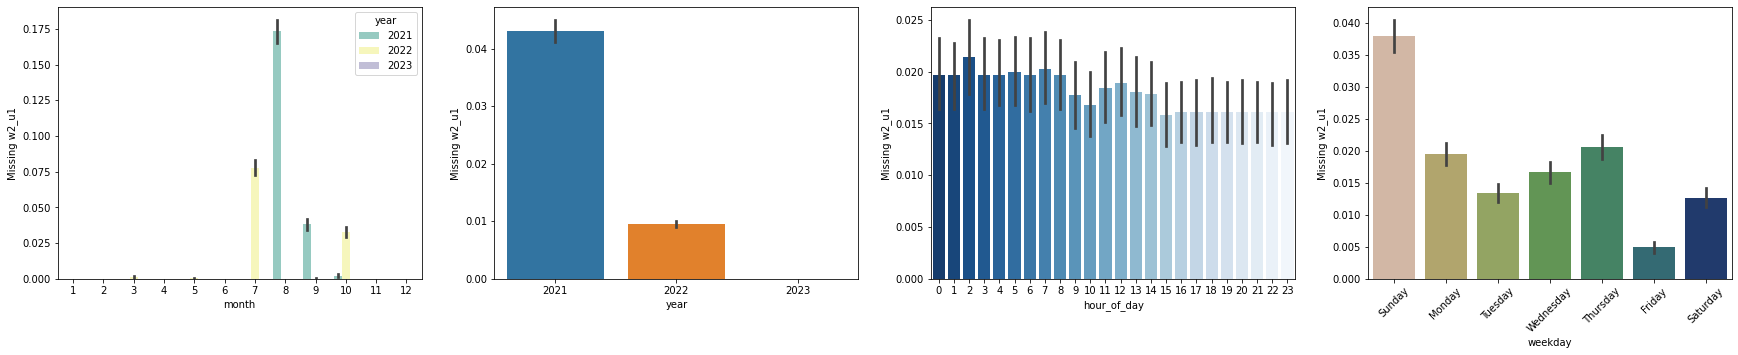

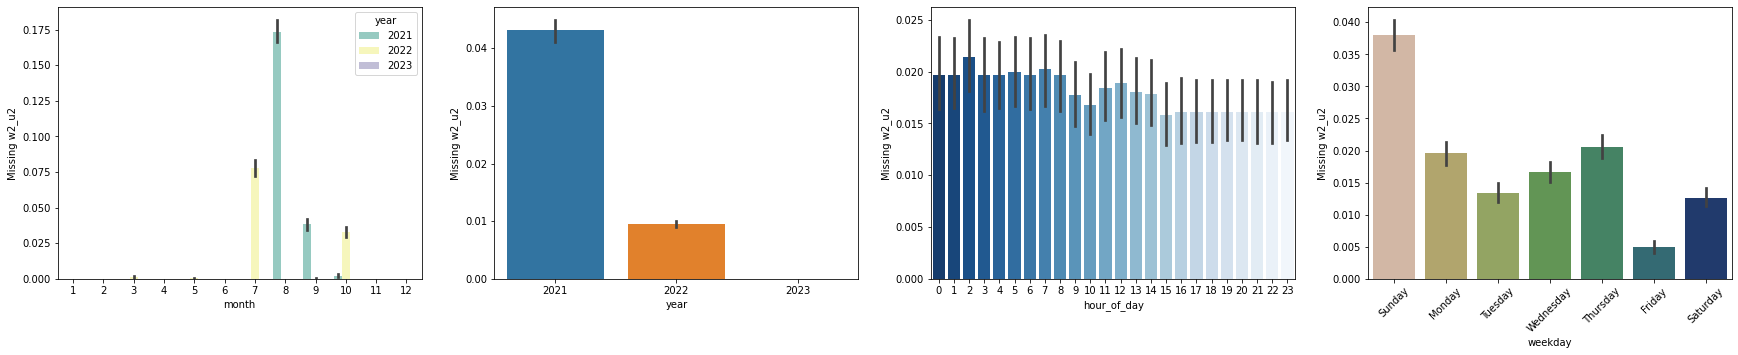

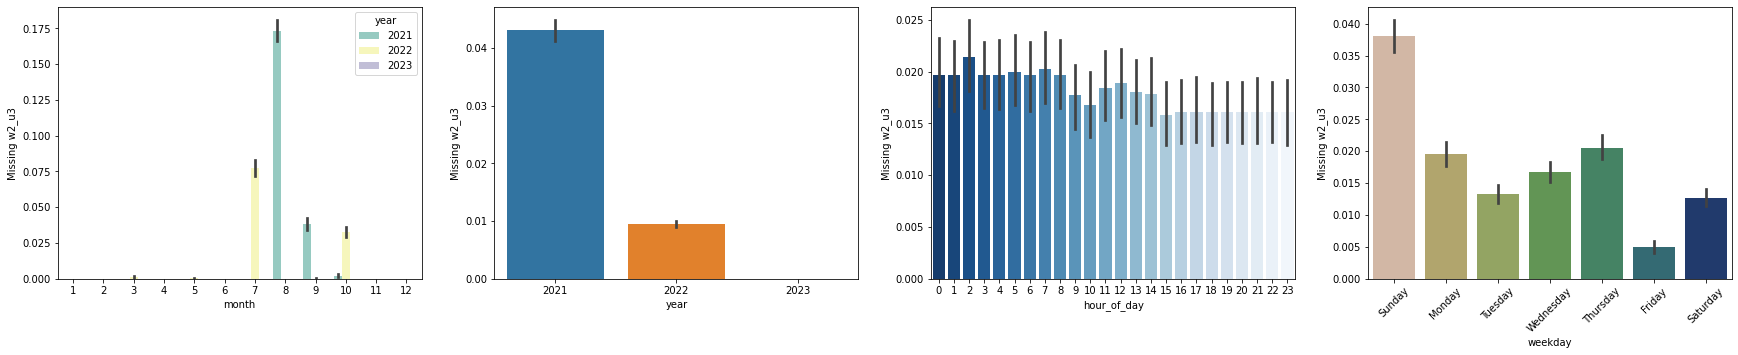

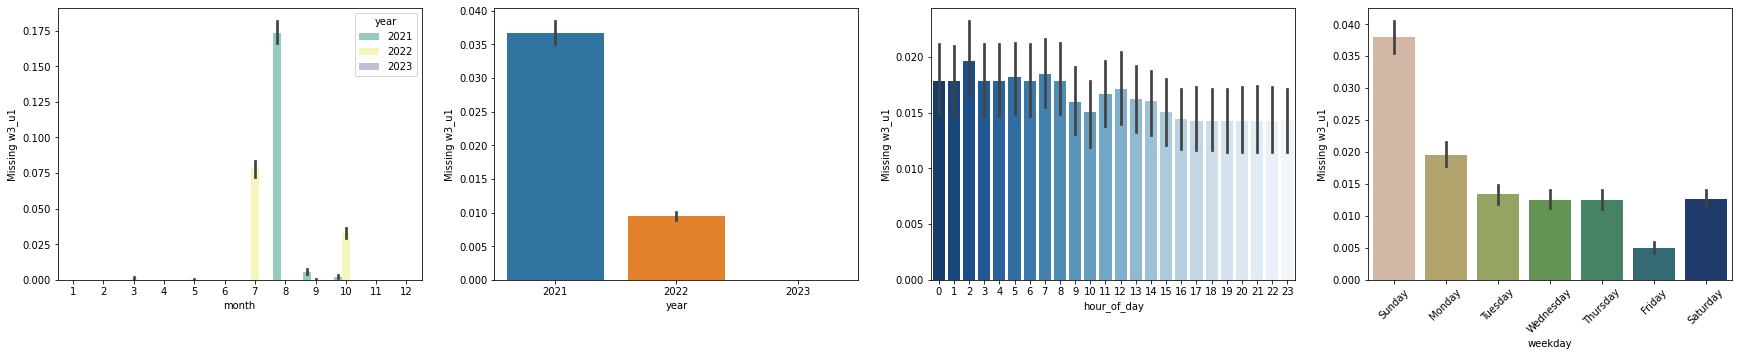

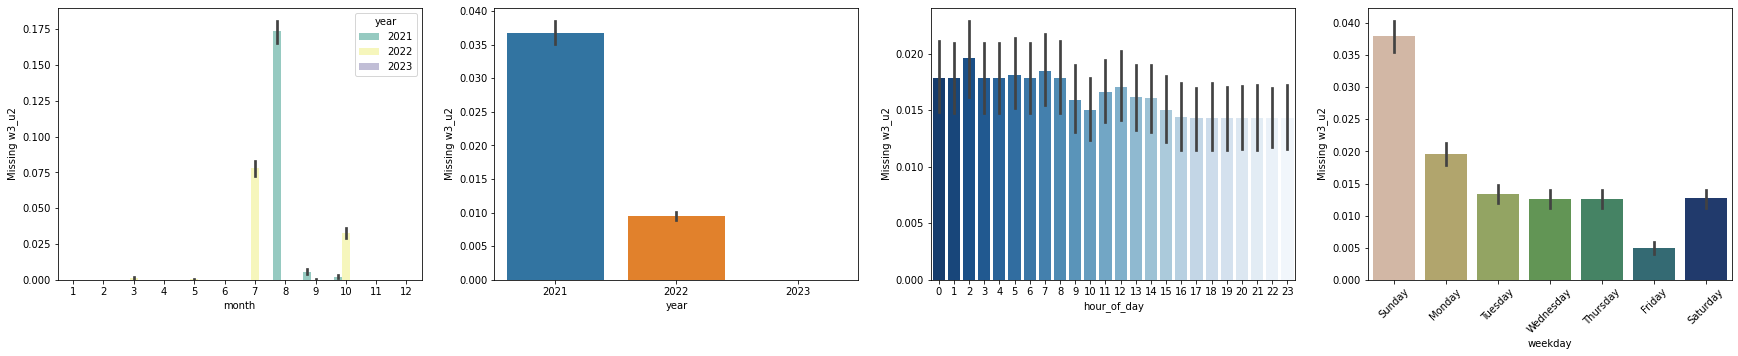

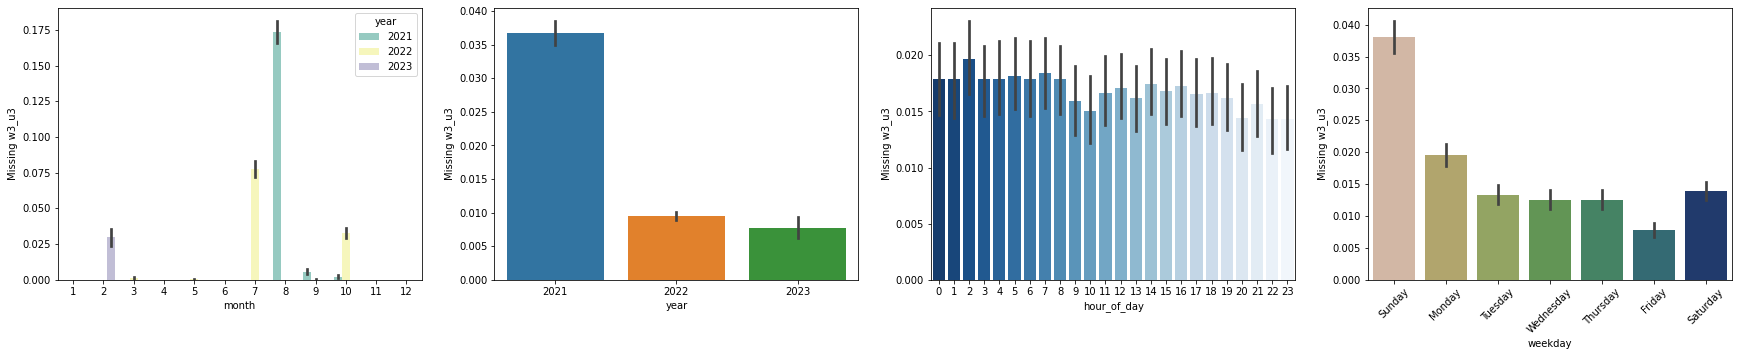

In [ ]:
nan_distribution(missing_power,datetimes)
nan_distribution(missing_current,datetimes)
nan_distribution(missing_voltage,datetimes)

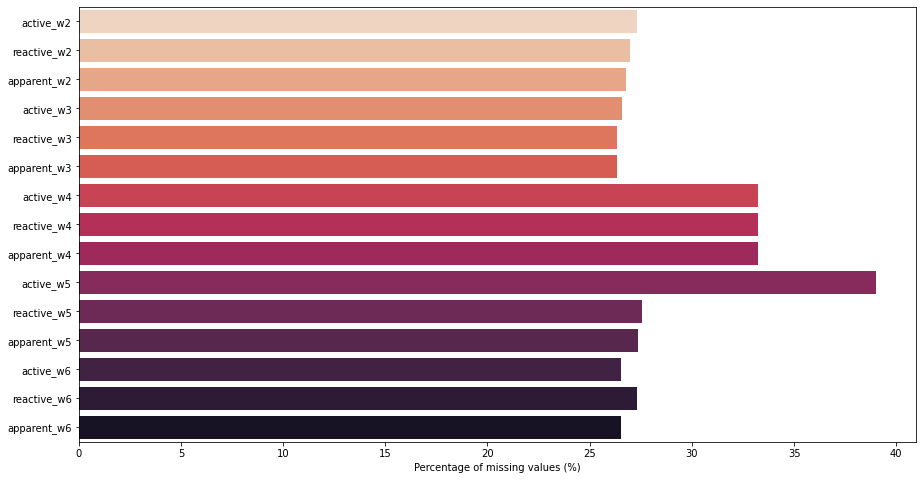

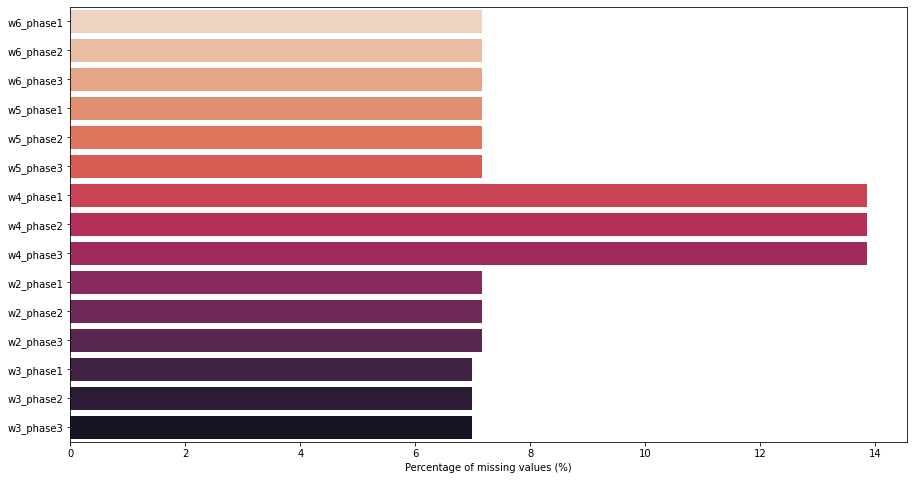

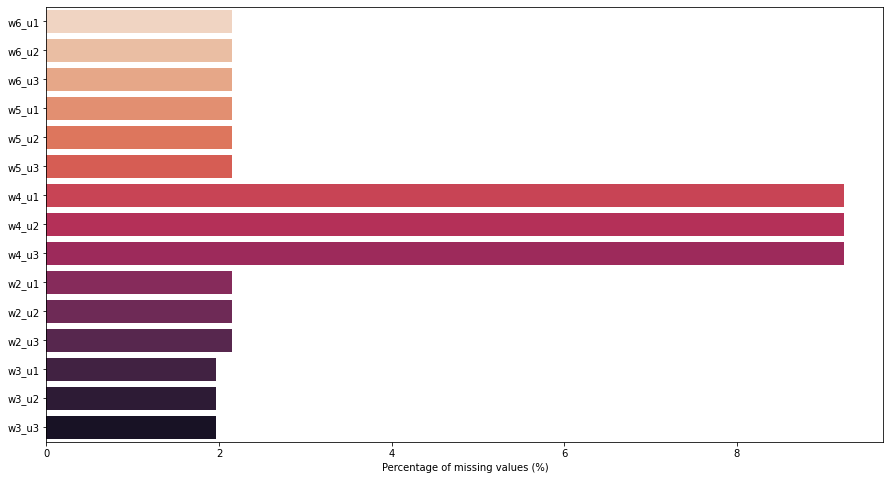

In [ ]:
nan_percentage(power_dt)
nan_percentage(current_dt)
nan_percentage(voltage_dt)

From the above barplots we understand that :

**General conclusions**
* Missing values for 2021 are close to zero. Although high percentages for nan values exist for August 2021. 
* After dropping July 2021 the percentage of missing values for current and voltage data is much smaller than before
* for W4 the nan percentage still remains high, as it is 14%, 26% for current/voltage, power data respectively
* for current and voltage data for all the meters except for W4, most of the missing values occur on the weekend, whereas for power data and w4 this is not true. We have missing data during the entire week.
* There are no many differences in nan's distribbution over time, as for every hour of the day the nan's percentage is almost the same
* 
For **Power data:**
* We see that almost 100% of August 2022 and 90% of July 2022 is missing for all of the meters
*Also, about 35% of October 2022 is missing. 
* Lastly, for 2023, about 10% of January is missing.
* For W5, although for its reactive power we have data during September and October 2022, for its active power we have no data for these months.
* For W4, no data during May 2022 an about 24% of April's and 18% of October's data is missing.

For **Current /Voltage data:**
* Around 7% of July's 2022 and 3% of October's 2022 is missing for all of our meters
* For W4 almost 100% of May's 2022 and 24% of April's data is missing











We will try to fill the NaN values for power data by applying the formula : apparent power = voltage_phase1*Current_phase1 +voltage_phase2* Current_phase2 + voltage_phase3*current_phase3 and validating with the already known data


Checking w2

In [ ]:
current_voltage1= current_dt[32000:33000]['w2_phase1']* voltage_dt[32000:33000]['w2_u1']

In [ ]:
current_voltage2= current_dt[32000:33000]['w2_phase2']* voltage_dt[32000:33000]['w2_u2']
current_voltage3= current_dt[32000:33000]['w2_phase3']* voltage_dt[32000:33000]['w2_u3']

In [ ]:
current_voltage_w2 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w2=current_voltage_w2/1000 

In [ ]:
##pf =power_dt[32000:33000]['active_w2']/current_voltage

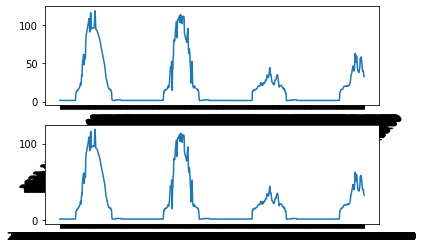

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.plot(power_dt[32000:33000]['apparent_w2'])
plt.xticks(rotation=45)
plt.subplot(212)
plt.plot(current_voltage_w2)


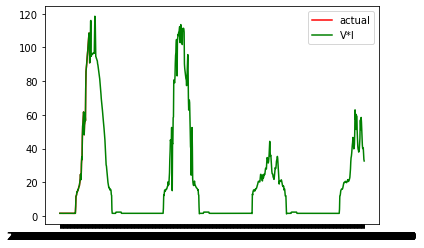

In [ ]:
plt.plot(power_dt[32000:32100].index, power_dt[32000:32100]['apparent_w2'], color='r', label='actual')
plt.plot(current_voltage_w2.index, current_voltage_w2, color='g', label='V*I')
plt.legend()
plt.show()

The resulted power seems very close to the actual apparent power of w2. We will check what happens for the other meters as well

In [ ]:
current_voltage1= current_dt[32000:33000]['w3_phase1']* voltage_dt[32000:33000]['w3_u1']
current_voltage2= current_dt[32000:33000]['w3_phase2']* voltage_dt[32000:33000]['w3_u2']
current_voltage3= current_dt[32000:33000]['w3_phase3']* voltage_dt[32000:33000]['w3_u3']
current_voltage_w3 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w3=current_voltage_w3/1000 

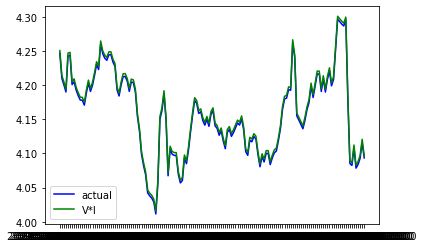

In [ ]:
plt.plot(power_dt[32000:32150].index, power_dt[32000:32150]['apparent_w3'], color='b', label='actual')
plt.plot(current_voltage_w3[:150].index, current_voltage_w3[:150], color='g', label='V*I')
plt.legend()
plt.show()

In [ ]:
current_voltage1= current_dt[32000:33000]['w4_phase1']* voltage_dt[32000:33000]['w4_u1']
current_voltage2= current_dt[32000:33000]['w4_phase2']* voltage_dt[32000:33000]['w4_u2']
current_voltage3= current_dt[32000:33000]['w4_phase3']* voltage_dt[32000:33000]['w4_u3']
current_voltage_w4 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w4=current_voltage_w4/1000 

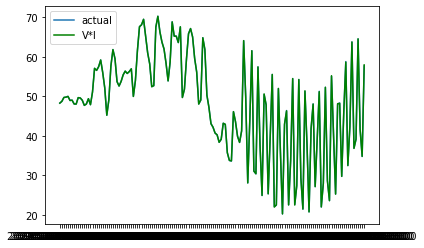

In [ ]:
plt.plot(power_dt[32000:32150].index, power_dt[32000:32150]['apparent_w4'], label='actual')
plt.plot(current_voltage_w4[:150].index, current_voltage_w4[:150], color='g', label='V*I')
plt.legend()
plt.show()

In [ ]:
current_voltage1= current_dt[32000:33000]['w5_phase1']* voltage_dt[32000:33000]['w5_u1']
current_voltage2= current_dt[32000:33000]['w5_phase2']* voltage_dt[32000:33000]['w5_u2']
current_voltage3= current_dt[32000:33000]['w5_phase3']* voltage_dt[32000:33000]['w5_u3']
current_voltage_w5 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w5=current_voltage_w5/1000 

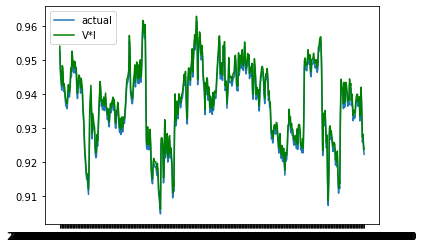

In [ ]:
plt.plot(power_dt[32000:32500].index, power_dt[32000:32500]['apparent_w5'], label='actual')
plt.plot(current_voltage_w5[:500].index, current_voltage_w5[:500], color='g', label='V*I')
plt.legend()
plt.show()

In [ ]:
current_voltage1= current_dt[32000:33000]['w6_phase1']* voltage_dt[32000:33000]['w6_u1']
current_voltage2= current_dt[32000:33000]['w6_phase2']* voltage_dt[32000:33000]['w6_u2']
current_voltage3= current_dt[32000:33000]['w6_phase3']* voltage_dt[32000:33000]['w6_u3']
current_voltage_w6 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w6=current_voltage_w6/1000 

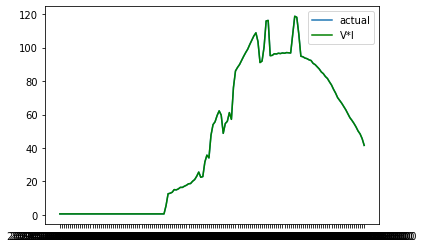

In [ ]:
plt.plot(power_dt[32000:32150].index, power_dt[32000:32150]['apparent_w6'], label='actual')
plt.plot(current_voltage_w6[:150].index, current_voltage_w6[:150], color='g', label='V*I')
plt.legend()
plt.show()

As we see the calculated value of apparent power is almost exactly the same as the measured one. So it is safe to replace the nan Values for apparent power with the calculated ones.

In [ ]:
max_values= [max(abs(current_voltage_w2-power_dt[32000:33000]['apparent_w2'])/abs(power_dt[32000:33000]['apparent_w2'])*100),
             max(abs(current_voltage_w3[:]-power_dt[32000:33000]['apparent_w3'])/abs(power_dt[32000:33000]['apparent_w3'])*100),
             max(abs(current_voltage_w4[:]-power_dt[32000:33000]['apparent_w4'])/abs(power_dt[32000:33000]['apparent_w4'])*100),
             max(abs(current_voltage_w5[:]-power_dt[32000:33000]['apparent_w5'])/abs(power_dt[32000:33000]['apparent_w5'])*100),
            max(abs(current_voltage_w6[90:150]-power_dt[32090:32150]['apparent_w6'])/abs(power_dt[32090:32150]['apparent_w6'])*100)]

In [ ]:
meters = ['W2','W3','W4','W5','W6']

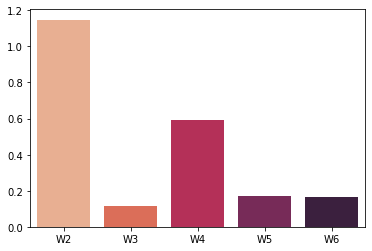

In [ ]:
sns.barplot(x=meters, y=max_values, palette='rocket_r')


In [ ]:
#w2
current_voltage1= current_dt['w2_phase1']* voltage_dt['w2_u1']
current_voltage2= current_dt['w2_phase2']* voltage_dt['w2_u2']
current_voltage3= current_dt['w2_phase3']* voltage_dt['w2_u3']
current_voltage_w2 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w2=current_voltage_w2/1000 
#w3
current_voltage1= current_dt['w3_phase1']* voltage_dt['w3_u1']
current_voltage2= current_dt['w3_phase2']* voltage_dt['w3_u2']
current_voltage3= current_dt['w3_phase3']* voltage_dt['w3_u3']
current_voltage_w3 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w3=current_voltage_w3/1000 

#w4
current_voltage1= current_dt['w4_phase1']* voltage_dt['w4_u1']
current_voltage2= current_dt['w4_phase2']* voltage_dt['w4_u2']
current_voltage3= current_dt['w4_phase3']* voltage_dt['w4_u3']
current_voltage_w4 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w4=current_voltage_w4/1000 

#w5
current_voltage1= current_dt['w5_phase1']* voltage_dt['w5_u1']
current_voltage2= current_dt['w5_phase2']* voltage_dt['w5_u2']
current_voltage3= current_dt['w5_phase3']* voltage_dt['w5_u3']
current_voltage_w5 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w5=current_voltage_w5/1000 

#w6
current_voltage1= current_dt['w6_phase1']* voltage_dt['w6_u1']
current_voltage2= current_dt['w6_phase2']* voltage_dt['w6_u2']
current_voltage3= current_dt['w6_phase3']* voltage_dt['w6_u3']
current_voltage_w6 = current_voltage1+ current_voltage2 + current_voltage3
current_voltage_w6=current_voltage_w6/1000 

In [ ]:
power_dt.isna().sum().sum()

528524

In [ ]:
filled_power_dt=power_dt.copy()

In [ ]:
filled_power_dt['apparent_w2']=filled_power_dt['apparent_w2'].fillna(current_voltage_w2)
filled_power_dt['apparent_w3']=filled_power_dt['apparent_w3'].fillna(current_voltage_w3)
filled_power_dt['apparent_w4']=filled_power_dt['apparent_w4'].fillna(current_voltage_w4)
filled_power_dt['apparent_w5']=filled_power_dt['apparent_w5'].fillna(current_voltage_w5)
filled_power_dt['apparent_w6']=filled_power_dt['apparent_w6'].fillna(current_voltage_w6)

In [ ]:
filled_power_dt.isna().sum().sum()

384154

We are going to create a new column for each meter that it will contain the power factor of each meter. As pf = Active Power / Apparent Power, we are going to divide the relevant columns for each meter

In [ ]:
filled_power_dt['power_factor_w2'] = filled_power_dt['active_w2']/abs(filled_power_dt['apparent_w2'])
filled_power_dt['power_factor_w3'] = filled_power_dt['active_w3']/abs(filled_power_dt['apparent_w3'])
filled_power_dt['power_factor_w4'] = filled_power_dt['active_w4']/abs(filled_power_dt['apparent_w4'])
filled_power_dt['power_factor_w5'] = filled_power_dt['active_w5']/abs(filled_power_dt['apparent_w5'])
filled_power_dt['power_factor_w6'] = filled_power_dt['active_w6']/abs(filled_power_dt['apparent_w6'])

In order to take a more detailed look into power factor's values (min, max, deviations etc) we are going to use the .describe()

In [ ]:
filled_power_dt.describe()


active_w2    reactive_w2    apparent_w2      active_w3  \
count  113615.000000  114147.000000  143399.000000  114806.000000   
mean      -23.680061      13.599647      30.065432       0.902228   
std        39.956002      17.453842      41.142677       0.016644   
min      -195.630865      -1.363166       1.061034       0.815568   
25%       -37.026508      -1.127848       1.537007       0.889956   
50%         0.856547       9.903710      11.339818       0.902656   
75%         0.866142      24.744153      45.078282       0.914482   
max         3.917208      75.789100     210.148292       0.998261   

         reactive_w3    apparent_w3      active_w4    reactive_w4  \
count  115147.000000  143679.000000  104392.000000  104391.000000   
mean        4.011949       4.148366      54.483258      -2.376908   
std         0.076009       0.074932      21.708479      10.778330   
min         3.572744       3.712278     -24.164224     -17.673406   
25%         3.960403       4.096803      41.062354      -9.456999   
50%         4.011676       4.148302      52.086635      -6.457539   
75%         4.063808       4.200217      66.712523       0.054530   
max         4.329491       4.463091     142.396070      48.147457   

         apparent_w4     active_w5  ...    apparent_w6   day_of_month  \
count  132924.000000  95363.000000  ...  143398.000000  146299.000000   
mean       57.441735      0.019968  ...      29.881437      15.533278   
std        20.763147      0.000546  ...      41.571760       8.753572   
min         0.000000      0.000000  ...       0.547251       1.000000   
25%        44.227040      0.019522  ...       0.593779       8.000000   
50%        53.838779      0.019903  ...      12.230884      15.000000   
75%        68.446046      0.020303  ...      45.673384      23.000000   
max       166.357523      0.030000  ...     210.213884      31.000000   

               month    hour_of_day           year  power_factor_w2  \
count  146299.000000  146299.000000  146299.000000    113615.000000   
mean        7.464412      11.499607    2021.698809        -0.016187   
std         3.363257       6.922002       0.458777         0.646571   
min         1.000000       0.000000    2021.000000        -0.931427   
25%         5.000000       5.000000    2021.000000        -0.806495   
50%         8.000000      11.000000    2022.000000         0.202330   
75%        10.000000      17.000000    2022.000000         0.561999   
max        12.000000      23.000000    2022.000000         1.244387   

       power_factor_w3  power_factor_w4  power_factor_w5  power_factor_w6  
count    114806.000000    104391.000000     95363.000000    114830.000000  
mean          0.217668         0.938737         0.021386        -0.245046  
std           0.004393         0.152401         0.000705         0.423661  
min           0.203022        -0.865840         0.000000        -0.916447  
25%           0.214367         0.950747         0.020899        -0.769595  
50%           0.217694         0.973345         0.021307         0.070871  
75%           0.220900         0.983926         0.021802         0.074774  
max           0.242247         0.997234         0.032151         0.831181  

[8 rows x 24 columns]

checking w4's power factor

In [ ]:
current_dt.describe()

w6_phase1      w6_phase2      w6_phase3      w5_phase1  \
count  143399.000000  143399.000000  143399.000000  143397.000000   
mean       43.263105      40.732235      42.623571       1.370773   
std        59.664154      58.038249      58.090832       0.013997   
min         0.698508       0.753097       0.782592       1.060104   
25%         0.747188       0.845360       0.920542       1.362429   
50%        19.790304      11.915084      20.294592       1.369781   
75%        66.708890      62.272548      65.234200       1.377499   
max       297.807040     292.804100     291.888670       1.576433   

           w5_phase2      w5_phase3      w4_phase1      w4_phase2  \
count  143397.000000  143397.000000  132921.000000  132921.000000   
mean        1.298402       1.295960      82.959952      76.976383   
std         0.014143       0.012419      29.176967      27.629023   
min         0.998044       1.003483       0.000000       0.000000   
25%         1.290847       1.288282      65.072100      59.746716   
50%         1.297359       1.295228      77.798500      72.304810   
75%         1.304148       1.302300      98.424545      90.545130   
max         1.603926       1.469162     235.961060     228.249940   

           w4_phase3      w2_phase1      w2_phase2      w2_phase3  \
count  132921.000000  143400.000000  143400.000000  143400.000000   
mean       83.638019      43.742671      40.690908      43.095459   
std        32.623781      59.044654      57.557738      57.668770   
min         0.000000       1.459470       1.580210       1.414502   
25%        61.829200       2.503277       1.707044       2.304756   
50%        77.869736      18.409038      10.525562      19.083236   
75%       101.946365      65.887028      61.232490      64.583815   
max       250.437840     298.916630     292.911040     293.360720   

           w3_phase1      w3_phase2      w3_phase3   day_of_month  \
count  143680.000000  143680.000000  143680.000000  146299.000000   
mean        6.611098       5.477087       5.536951      15.533278   
std         0.076237       0.064309       0.076712       8.753572   
min         6.184863       5.118694       5.083643       1.000000   
25%         6.558821       5.433234       5.484585       8.000000   
50%         6.611235       5.477139       5.536449      15.000000   
75%         6.663691       5.521866       5.589006      23.000000   
max         6.919477       5.732128       5.896445      31.000000   

               month    hour_of_day           year  
count  146299.000000  146299.000000  146299.000000  
mean        7.464412      11.499607    2021.698809  
std         3.363257       6.922002       0.458777  
min         1.000000       0.000000    2021.000000  
25%         5.000000       5.000000    2021.000000  
50%         8.000000      11.000000    2022.000000  
75%        10.000000      17.000000    2022.000000  
max        12.000000      23.000000    2022.000000

From the df's metrics taken from .describe, we understand the following regarding W4:
* it has a min value of -0.865840
* at least 75% of its values is between 0.950747 and 0.997234.

w4's pf is expected to be near 1 as the power measured by the headquarter's load should have limited losses. 

Regarding the negative values we will create the followint barplots/ countplots to help undestand when this negative pf occurs.

In [ ]:
len(filled_power_dt[filled_power_dt['power_factor_w4']<0])

826

In [ ]:
len(filled_power_dt)

146299

To begin with, we observe that a negative pf for w4 occurs only
 for 806 out of 137000 rows of data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


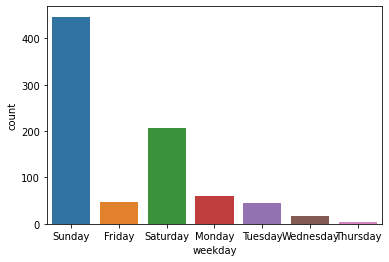

In [ ]:
sns.countplot(filled_power_dt[filled_power_dt['power_factor_w4']<0]['weekday'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


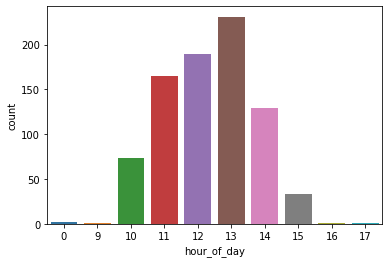

In [ ]:
sns.countplot(filled_power_dt[filled_power_dt['power_factor_w4']<0]['hour_of_day'])

Furthermore the majority of these values is measured on weekends and during 10-15 hours, with a peak at 13:00. 

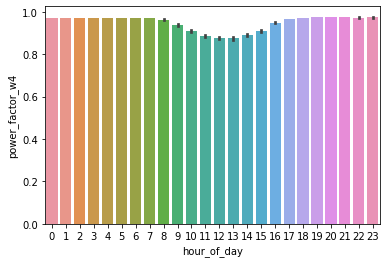

In [ ]:
sns.barplot(data=filled_power_dt[filled_power_dt['power_factor_w4']>0], y='power_factor_w4',x='hour_of_day')

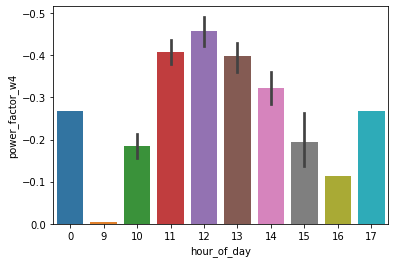

In [ ]:
sns.barplot(data=filled_power_dt[filled_power_dt['power_factor_w4']<0], y='power_factor_w4',x='hour_of_day')
plt.gca().invert_yaxis() 


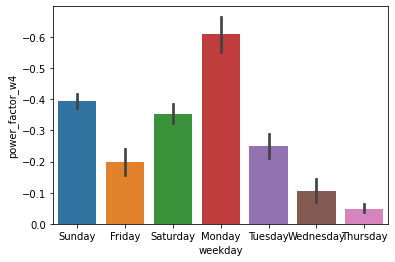

In [ ]:
sns.barplot(data=filled_power_dt[filled_power_dt['power_factor_w4']<0], y='power_factor_w4',x='weekday')
plt.gca().invert_yaxis() 



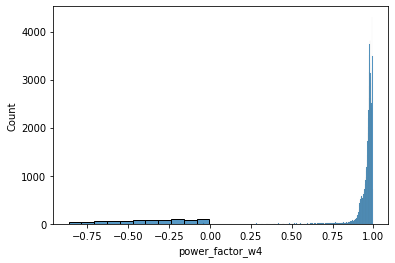

In [ ]:
sns.histplot(filled_power_dt[filled_power_dt['power_factor_w4']<0]['power_factor_w4'])
sns.histplot(filled_power_dt['power_factor_w4'])



(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 7 Text major ticklabel objects>)

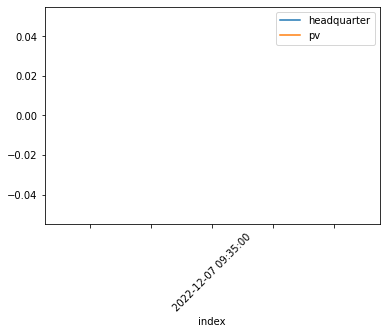

In [ ]:
filled_power_dt[-4200:-3900]['power_factor_w4'].plot(label='headquarter')
filled_power_dt[-4200:-3900]['power_factor_w6'].plot(label='pv')
plt.legend()
plt.xticks(rotation=45)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

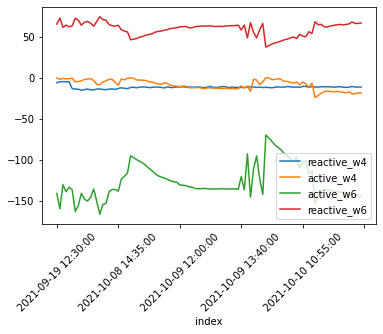

In [ ]:
filled_power_dt[filled_power_dt['power_factor_w4']<0][:100][['reactive_w4','active_w4','active_w6','reactive_w6']].plot()
plt.xticks(rotation=45)

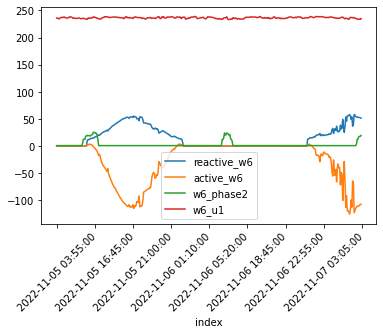

In [ ]:
filled_power_dt[filled_power_dt['power_factor_w4']>0][-1400:-1000][['reactive_w6','active_w6']].plot()
idx=filled_power_dt[filled_power_dt['power_factor_w6']>0][-1400:-1000].index
current_dt.loc[idx]['w6_phase2'].plot()
voltage_dt.loc[idx]['w6_u1'].plot()
plt.xticks(rotation=45)
plt.legend()


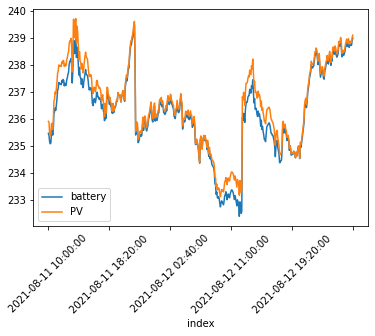

In [ ]:
voltage_dt[3000:3500]['w3_u1'].plot(label='battery')
voltage_dt[3000:3500]['w6_u1'].plot(label='PV')
plt.xticks(rotation=45)
plt.legend()

In [ ]:
filled_power_dt[filled_power_dt['power_factor_w4']>0][-1400:-1000]

active_w2  reactive_w2  apparent_w2  active_w3  \
index                                                                  
2022-11-08 03:20:00    0.865000    -1.114167     1.517609   0.905000   
2022-11-08 03:25:00    0.864895    -1.105351     1.514159   0.896622   
2022-11-08 03:30:00    0.865000    -1.103095     1.511757   0.900000   
2022-11-08 03:35:00    0.865056    -1.110938     1.517857   0.904048   
2022-11-08 03:40:00    0.864950    -1.115455     1.521739   0.905000   
...                         ...          ...          ...        ...   
2022-11-09 12:15:00 -113.471831    48.180956   123.599460   0.895000   
2022-11-09 12:20:00 -112.449460    47.846859   122.564539   0.894925   
2022-11-09 12:25:00 -110.662811    47.401798   120.772500   0.894630   
2022-11-09 12:30:00 -109.742275    47.121115   119.859326   0.895857   
2022-11-09 12:35:00 -109.157509    46.395351   119.047802   0.887500   

                     reactive_w3  apparent_w3  active_w4  reactive_w4  \
index                                                                   
2022-11-08 03:20:00     3.966328     4.100887  36.774542   -14.763164   
2022-11-08 03:25:00     3.933846     4.068766  36.920360   -14.313164   
2022-11-08 03:30:00     3.934481     4.072312  37.244022   -13.883693   
2022-11-08 03:35:00     3.967532     4.103720  36.424170   -14.875678   
2022-11-08 03:40:00     3.983206     4.119370  36.758881   -14.527867   
...                          ...          ...        ...          ...   
2022-11-09 12:15:00     4.042204     4.171230  67.306170    17.592230   
2022-11-09 12:20:00     4.042683     4.171823  65.961815    15.734029   
2022-11-09 12:25:00     4.044216     4.172947  42.864386    -4.531934   
2022-11-09 12:30:00     4.046600     4.175659  49.674843     4.242852   
2022-11-09 12:35:00     3.987526     4.114300  53.621468     6.909568   

                     apparent_w4  active_w5  ...    weekday  day_of_month  \
index                                        ...                            
2022-11-08 03:20:00    40.144489        NaN  ...    Tuesday             8   
2022-11-08 03:25:00    40.112094        NaN  ...    Tuesday             8   
2022-11-08 03:30:00    40.322847        NaN  ...    Tuesday             8   
2022-11-08 03:35:00    39.883829        NaN  ...    Tuesday             8   
2022-11-08 03:40:00    40.124927        NaN  ...    Tuesday             8   
...                          ...        ...  ...        ...           ...   
2022-11-09 12:15:00    70.283615        NaN  ...  Wednesday             9   
2022-11-09 12:20:00    68.594880        NaN  ...  Wednesday             9   
2022-11-09 12:25:00    45.836380        NaN  ...  Wednesday             9   
2022-11-09 12:30:00    52.405560        NaN  ...  Wednesday             9   
2022-11-09 12:35:00    55.862100        NaN  ...  Wednesday             9   

                     month  hour_of_day  year power_factor_w2  \
index                                                           
2022-11-08 03:20:00     11            3  2022        0.569976   
2022-11-08 03:25:00     11            3  2022        0.571205   
2022-11-08 03:30:00     11            3  2022        0.572182   
2022-11-08 03:35:00     11            3  2022        0.569919   
2022-11-08 03:40:00     11            3  2022        0.568395   
...                    ...          ...   ...             ...   
2022-11-09 12:15:00     11           12  2022       -0.918061   
2022-11-09 12:20:00     11           12  2022       -0.917471   
2022-11-09 12:25:00     11           12  2022       -0.916291   
2022-11-09 12:30:00     11           12  2022       -0.915592   
2022-11-09 12:35:00     11           12  2022       -0.916922   

                     power_factor_w3  power_factor_w4  power_factor_w5  \
index                                                                    
2022-11-08 03:20:00         0.220684         0.916055              NaN   
2022-11-08 03:25:00         0.220367         0.920430            

In [ ]:
voltage_dt[['w6_u1','w3_u1']].describe()

w6_u1          w3_u1
count  143398.000000  143679.000000
mean      236.256396     236.086990
std         1.498700       1.459013
min       226.209270     226.124500
25%       235.229740     235.088525
50%       236.261030     236.102460
75%       237.299120     237.107865
max       242.492130     241.726060

We understand that these values may have been occured due to measuring errors ??? so we will drop them


##W2
Regarding W2 from the df's details we understand that: 


*  It has a min value of -0.931427, or a highest absolute value of 0.931427.

*   25% of its power factor's values is between -931427 and -0.806495
*   It has a max value of 1.244387, which is practically impossible as power factor is a cosine and it takes values from -1 to 1. We will check when these >1 values occur.
   




In [ ]:
len(filled_power_dt[filled_power_dt['power_factor_w2']>1])

4

In [ ]:
filled_power_dt[filled_power_dt['power_factor_w2']>1]

active_w2  reactive_w2  apparent_w2  active_w3  \
index                                                                 
2022-09-16 19:25:00   1.869412    -1.165000     1.848409   0.917143   
2022-10-09 18:35:00   1.736364    -1.195714     1.395357   0.875041   
2022-10-10 18:40:00   1.678966    -1.093636     1.578308   0.922083   
2022-11-12 19:35:00   1.702564    -1.140588     1.625385   0.905000   

                     reactive_w3  apparent_w3  active_w4  reactive_w4  \
index                                                                   
2022-09-16 19:25:00     4.054634     4.188333  70.125310     9.431145   
2022-10-09 18:35:00     3.961240     4.091640  34.281587   -12.877424   
2022-10-10 18:40:00     4.061956     4.200865  43.033692   -11.780935   
2022-11-12 19:35:00     4.004324     4.141220  49.926109    -6.633517   

                     apparent_w4  active_w5  ...   weekday  day_of_month  \
index                                        ...                           
2022-09-16 19:25:00    72.086040        NaN  ...    Friday            16   
2022-10-09 18:35:00    37.246300        NaN  ...    Sunday             9   
2022-10-10 18:40:00    45.251273        NaN  ...    Monday            10   
2022-11-12 19:35:00    50.680738        NaN  ...  Saturday            12   

                     month  hour_of_day  year power_factor_w2  \
index                                                           
2022-09-16 19:25:00      9           19  2022        1.011363   
2022-10-09 18:35:00     10           18  2022        1.244387   
2022-10-10 18:40:00     10           18  2022        1.063776   
2022-11-12 19:35:00     11           19  2022        1.047484   

                     power_factor_w3  power_factor_w4  power_factor_w5  \
index                                                                    
2022-09-16 19:25:00         0.218976         0.972800              NaN   
2022-10-09 18:35:00         0.213861         0.920402              NaN   
2022-10-10 18:40:00         0.219498         0.950994              NaN   
2022-11-12 19:35:00         0.218535         0.985110              NaN   

                     power_factor_w6  
index                                 
2022-09-16 19:25:00         0.207275  
2022-10-09 18:35:00         0.058824  
2022-10-10 18:40:00         0.057851  
2022-11-12 19:35:00         0.075577  

[4 rows x 25 columns]

As it is impossible for the power factor to be greater than 1, we will assume that these measurements were wrong and we will drop them. 

In [ ]:
idx=filled_power_dt[filled_power_dt['power_factor_w2']>1].index

In [ ]:
filled_power_dt.drop(idx, axis=0, inplace=True)


Creating plots

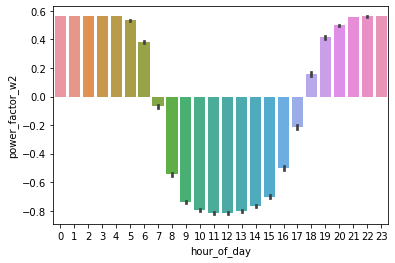

In [ ]:
sns.barplot(data =filled_power_dt, y='power_factor_w2',x = 'hour_of_day')

<ipython-input-65-e9a50ab46e0e>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

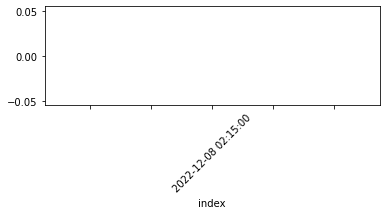

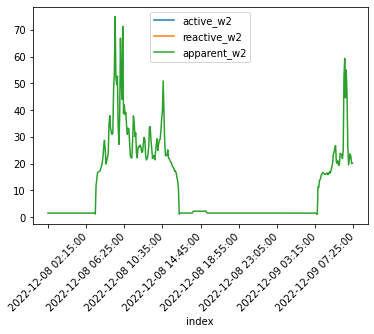

In [ ]:
plt.figure(1)
plt.subplot(211)
filled_power_dt[-4000:-3600]['power_factor_w2'].plot()
plt.xticks(rotation=45)
plt.subplot(211)
filled_power_dt[-4000:-3600][['active_w2','reactive_w2','apparent_w2']].plot()
plt.xticks(rotation=45)

##current_dt[-4000:-3000]['w2_phase2'].plot()
##plt.xticks(rotation=45)
##voltage_dt[-4000:-3000]['w2_u1'].plot()

In [ ]:
filled_power_dt[-4000:-3600][['active_w2','reactive_w2','apparent_w2']]

active_w2  reactive_w2  apparent_w2
index                                                   
2022-12-08 02:15:00        NaN          NaN     1.517882
2022-12-08 02:20:00        NaN          NaN     1.518304
2022-12-08 02:25:00        NaN          NaN     1.520960
2022-12-08 02:30:00        NaN          NaN     1.517778
2022-12-08 02:35:00        NaN          NaN     1.522396
...                        ...          ...          ...
2022-12-09 11:10:00        NaN          NaN    21.706415
2022-12-09 11:15:00        NaN          NaN    23.635487
2022-12-09 11:20:00        NaN          NaN    22.716960
2022-12-09 11:25:00        NaN          NaN    20.053220
2022-12-09 11:30:00        NaN          NaN    20.179395

[400 rows x 3 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


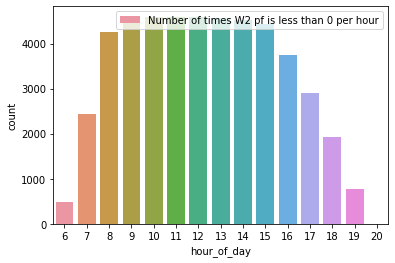

In [ ]:
sns.countplot(filled_power_dt[filled_power_dt['power_factor_w2']<0]['hour_of_day'], label='Number of times W2 pf is less than 0 per hour')
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


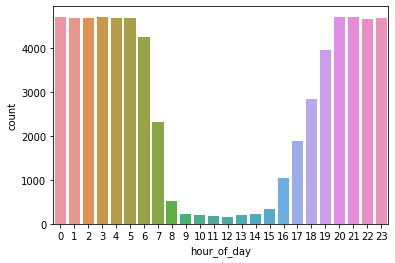

In [ ]:
sns.countplot(filled_power_dt[filled_power_dt['power_factor_w2']>0]['hour_of_day'], label = 'Number of times W2 pf is greater than 0 per hour')

In [ ]:
filled_power_dt[filled_power_dt['power_factor_w2']>0][['active_w2','reactive_w2']].describe()

active_w2   reactive_w2
count  65261.000000  64910.000000
mean       1.050569      0.840448
std        0.485380      4.928202
min        0.000061     -1.363166
25%        0.861195     -1.138671
50%        0.865038     -1.124915
75%        0.871650     -1.108017
max        3.917208     17.816702

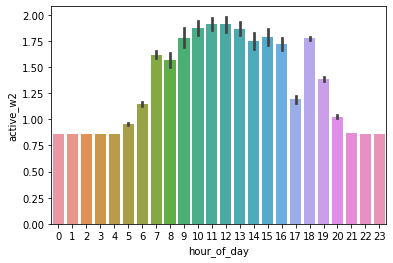

In [ ]:
sns.barplot(data = filled_power_dt[filled_power_dt['power_factor_w2']>0],y ='active_w2', x='hour_of_day')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


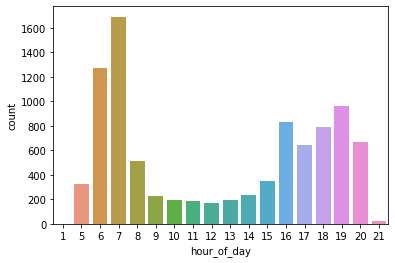

In [ ]:
sns.countplot(filled_power_dt[(filled_power_dt['power_factor_w2']>0) & (filled_power_dt['reactive_w2']>0)]['hour_of_day'])

As we see from the above plots w2's power factor is mostly negative between 08:00 and 17:00 hrs whereas it is mostly positive between 19:00 to 07:00 and equally positive and negative at 07:00 and 18:00.

Regarding W6 - Pv's meter -, that affects W2 : 



* It has a min power factor value of -0.916447, while 25% of its values is between -0.916447 and - 0.769595
*25 % of its values is between 0.071 and 0.075. 



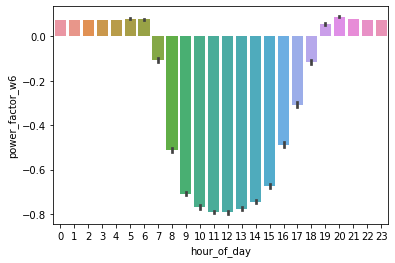

In [ ]:
sns.barplot(data =filled_power_dt, y='power_factor_w6',x = 'hour_of_day')

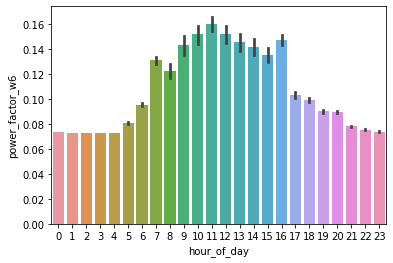

In [ ]:
sns.barplot(data =filled_power_dt[filled_power_dt['power_factor_w6']>0], y='power_factor_w6', x ='hour_of_day')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


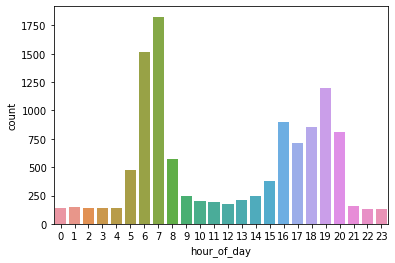

In [ ]:
sns.countplot(filled_power_dt[(filled_power_dt['power_factor_w6']>0) & (filled_power_dt['reactive_w6']>0)]['hour_of_day'])

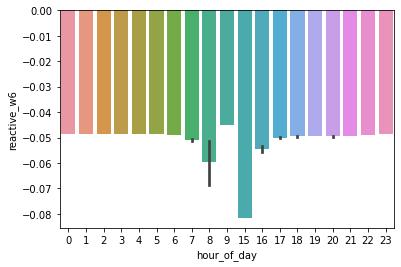

In [ ]:
sns.barplot(data =filled_power_dt[(filled_power_dt['power_factor_w6']>0) & (filled_power_dt['reactive_w6']<0)],x='hour_of_day',y='reactive_w6')

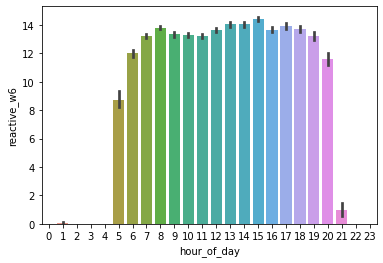

In [ ]:
sns.barplot(data =filled_power_dt[(filled_power_dt['power_factor_w6']>0) & (filled_power_dt['reactive_w6']>0)],x='hour_of_day',y='reactive_w6')

In [ ]:
filled_power_dt[(filled_power_dt['power_factor_w6']>0) & (filled_power_dt['reactive_w6']>0)][['active_w6','reactive_w6','power_factor_w6','apparent_w6','reactive_w4','hour_of_day']]

active_w6  reactive_w6  power_factor_w6  apparent_w6  \
index                                                                       
2021-08-06 19:30:00   0.017948    16.572796         0.000993    18.081308   
2021-08-06 19:35:00   0.764798    16.330894         0.042743    17.892998   
2021-08-06 19:40:00   1.323850    16.333038         0.074163    17.850601   
2021-08-06 19:45:00   1.784739    16.245329         0.100283    17.797087   
2021-08-06 19:50:00   2.095052    16.269480         0.118455    17.686499   
...                        ...          ...              ...          ...   
2022-11-12 16:30:00   2.990126    12.948015         0.211447    14.141232   
2022-11-12 16:35:00   2.608852    12.411735         0.195915    13.316273   
2022-11-12 16:40:00   2.394397    11.889334         0.189152    12.658608   
2022-11-12 16:45:00   2.361453    11.829803         0.187683    12.582121   
2022-11-12 16:50:00   1.651364    10.150000         0.504780     3.271455   

                     reactive_w4  hour_of_day  
index                                          
2021-08-06 19:30:00    -6.322287           19  
2021-08-06 19:35:00    -5.685748           19  
2021-08-06 19:40:00    -4.864350           19  
2021-08-06 19:45:00    -6.877571           19  
2021-08-06 19:50:00    -8.607531           19  
...                          ...          ...  
2022-11-12 16:30:00    -4.152479           16  
2022-11-12 16:35:00    -6.270403           16  
2022-11-12 16:40:00    -7.020579           16  
2022-11-12 16:45:00    -7.671674           16  
2022-11-12 16:50:00    -7.682675           16  

[11660 rows x 6 columns]

[]

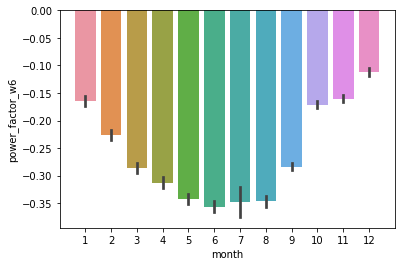

In [ ]:
sns.barplot(data = filled_power_dt, y= 'power_factor_w6', x= 'month').plot()


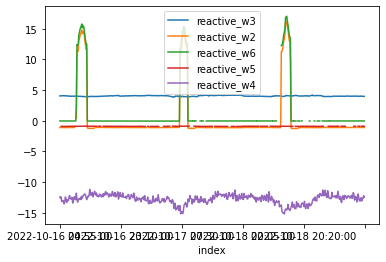

In [ ]:
filled_power_dt[filled_power_dt['power_factor_w6']>0][-4000:-3500][['reactive_w3','reactive_w2','reactive_w6','reactive_w5','reactive_w4']].plot()

Regarding W3's power factor :


*   It has a min value of 0.203022 and a max value of 0.24 approximately



(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]),
 <a list of 10 Text major ticklabel objects>)

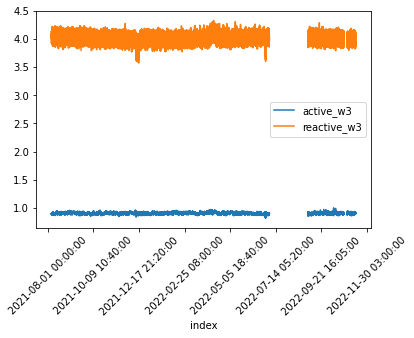

In [ ]:
filled_power_dt[:][['active_w3','reactive_w3']].plot()
plt.xticks(rotation=45)

In [ ]:
filled_power_dt[-3500:-3000]['reactive_w3'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: reactive_w3, dtype: float64

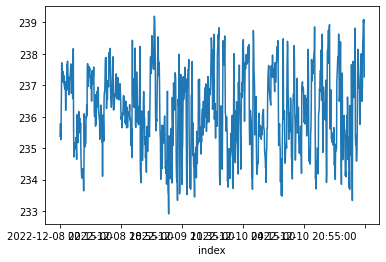

In [ ]:
voltage_dt[-4000:-3000]['w3_u1'].plot()

Regarding W5's power factor 
We see that its minimum value is 0 and its max value is 0.03, so we realize W5's active power is almost zero. 
Also 50% of its values is between 0.020899 and 0.0218.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


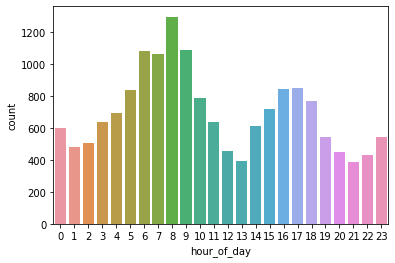

In [ ]:
sns.countplot(filled_power_dt[filled_power_dt['power_factor_w5']>0.022]['hour_of_day'])

In [ ]:
filled_power_dt['power_factor_w5'].describe()

count    95363.000000
mean         0.021386
std          0.000705
min          0.000000
25%          0.020899
50%          0.021307
75%          0.021802
max          0.032151
Name: power_factor_w5, dtype: float64

In [ ]:
filled_power_dt['reactive_w5'].describe()

count    113238.000000
mean         -0.916697
std           0.011868
min          -0.967817
25%          -0.925000
50%          -0.916237
75%          -0.908344
max          -0.806604
Name: reactive_w5, dtype: float64

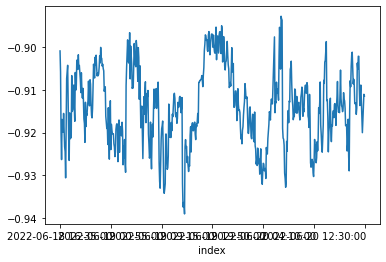

In [ ]:
filled_power_dt[filled_power_dt['power_factor_w5']>0.02][-4600:-4000]['reactive_w5'].plot()

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text major ticklabel objects>)

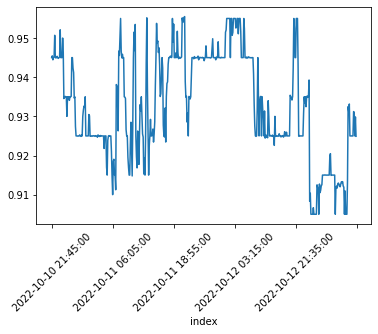

In [ ]:
filled_power_dt[filled_power_dt['power_factor_w6']>0][-5000:-4500]['apparent_w5'].plot()
plt.xticks(rotation=45)


#Θα αναλύσουμε τα δεδομένα μας τωρα για να βρουμε τις συσχετισεις αναμεσα στις μεταβλητες, πως η μια επηρεαζεται απο την αλλη, ώστε να γνωριζουμε τα δεδομένα που ειναι χρησιμο να εισάγουμε στο μοντελο προβλεψης

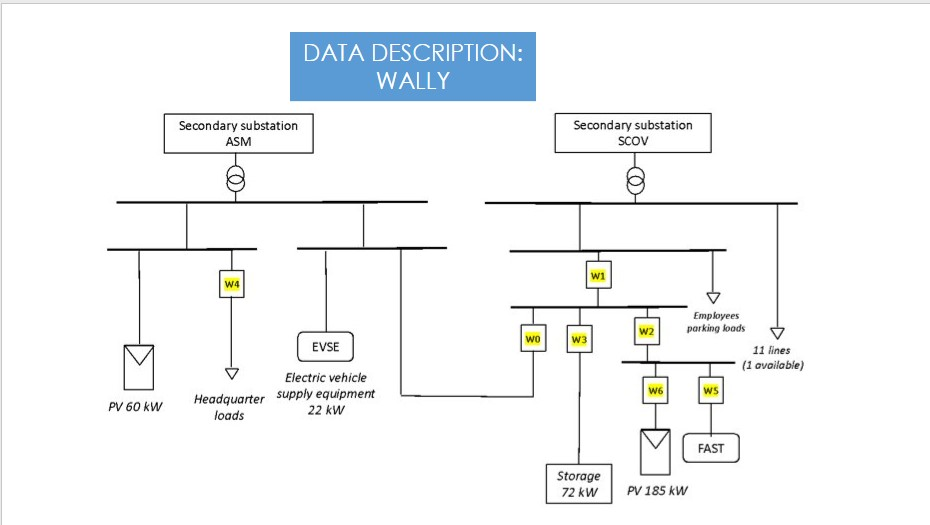

Αρχικα θα δουμε το dataframe που περιεχει τα δεδομενα της ισχυος, της τασης και του ρευματος ξεχωριστα και στην πορεια θα τα ενωσουμε ωστε να βρουμε και διαφορες συσχετισεις μεταξυ ολων των μεταβλητων.

In [ ]:
corr_matrix = power_dt.corr()

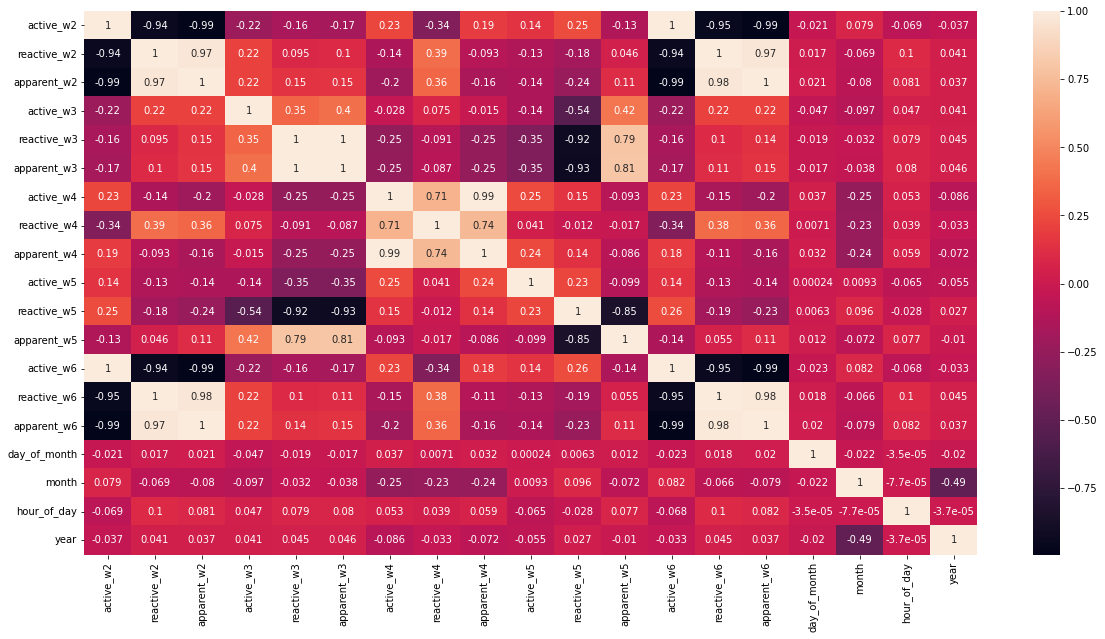

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True)

**W2**
Όπως βλέπουμε υπάρχει ισχυρότατη θετική συσχέτιση (1) ανάμεσα στην ενεργό ισχύ του Φωτοβολταϊκου (w6) και του μετρήτη που συνδεεται στον ζυγο του φωτοβολταικού και του μετρητη w2 καθως και των άεργων ισχύων τους. Επιπλεον υπαρχει ισχυρη συσχετιση (0.98) αναμεσα στην φαινόμενη ισχύ του φωτοβολταικου και του w2. Αρά εχουμε ισχυρή θετικη συσχετιση: 

*   reactive w2 - apparent w6 (0.97)
*   reactive w2- apparent w2 (0.97)
*   active w2 - active w6 (1)
*   reactive w2- reactive w6 (1)
* apparent w2 - apparent w6 (1)

Επιπλεόν ισχυρη αρνητικη συσχέτιση αναμεσα στην ενεργό ισχυ του w2 και την άεργο & φαινόμενη ισχυ του. 
* active w2 -- reactive w2 (-0.95) && apparent w2 (-0.99)
* reactive w2 -- active w6 ( -0.94)
* apparent w2 - active w6 (-0.99)

**W3**
Οσον αφορα την μπαταρια, η άεργος ισχυς της εχει απολυτη θετική συσχέτιση με την φαινόμενη ισχύ της, ενώ αρκετά ισχυρή αρνητική συσχέτιση με την άεργο και και ισχυρή θετική συσχέτιση (0.79) με την φαινόμενη ισχύ του σταθμού φόρτισης (w5)

* reactive w3 - apparent w3 (1)
* reactive w3 - apparent w5 ( 0.79)
* apparent w3 - apparent w5 (0.81)

**W4**
Για τον μετρητή στα headquarters βλέπουμε οτι υπαρχει ισχυρη θετικη συσχετιση της ενεργους με την φαινομενη (0.99) και την αεργο ισχυ του (0.71) καθως και της αεργου με την φαινομενη (0.74)
* active w4 - apparent w4 (0.99)
* active w4 - reactive w4 (0.71)
* reactive w4 - apparent w4 (0.74)

**W5**


Η άεργος ισχυς του σταθμού φόρτισης έχει ισχυρή αρνητική συσχέτιση με την φαινόμενη του w5.
* reactive w5 - apparent w5 (-0.85)

**W6**

Για το φωτοβολταϊκό βλέπουμε ότι η ενεργός ισχύς του εχει ισχυρότατη αρνητική συσχέτιση τόσο με την άερο ισχύ του ( -0.95) όσο και με την φαινόμενη ( -0.99).Τελος η αέργος ισχύς του σχετίζεται εντόνως θετικά με την φαινόμενη (0.98) 

* active w6 -- reactive w6 ( -0.95)
* active w6 -- apparent w6 (-0.99)
* reactive w6 - apparent w6 (0.98)










Για την τάση

In [ ]:
corr_matrix = voltage_dt.corr()

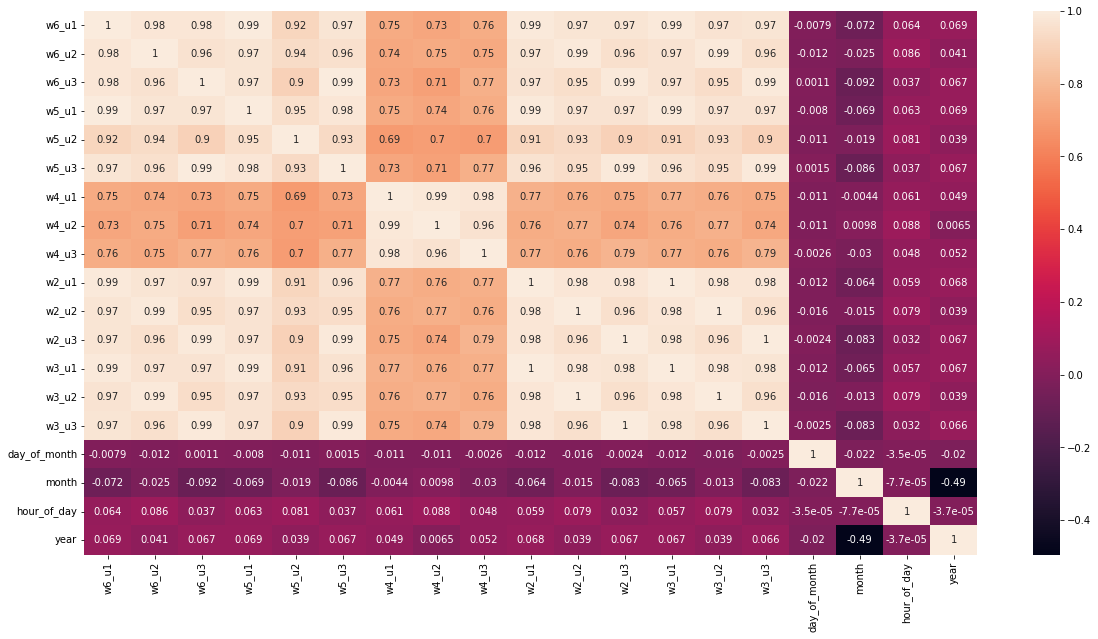

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

Παρατηρούμε λοιπόν ότι υπάρχει ισχυρή θετική συσχέτιση ανάμεσα στις φασικές τάσεις όλων των μετρήτων ( 0.91 - 1 ) εκτός απο τον μετρητή στ headquarters ο οποιος έχει ασθενέστερη θετική συσχέτιση με τους άλλους (0.73 - 0.78).
Ειδικά παρατηρούμε ότι : 
O μετρητής w2 έχει απόλυτη θετική συσχέτιση με την μπαταρία (1) (ανά φάση)
w2-u1 - w3_u1 (1 )

Για το ρεύμα


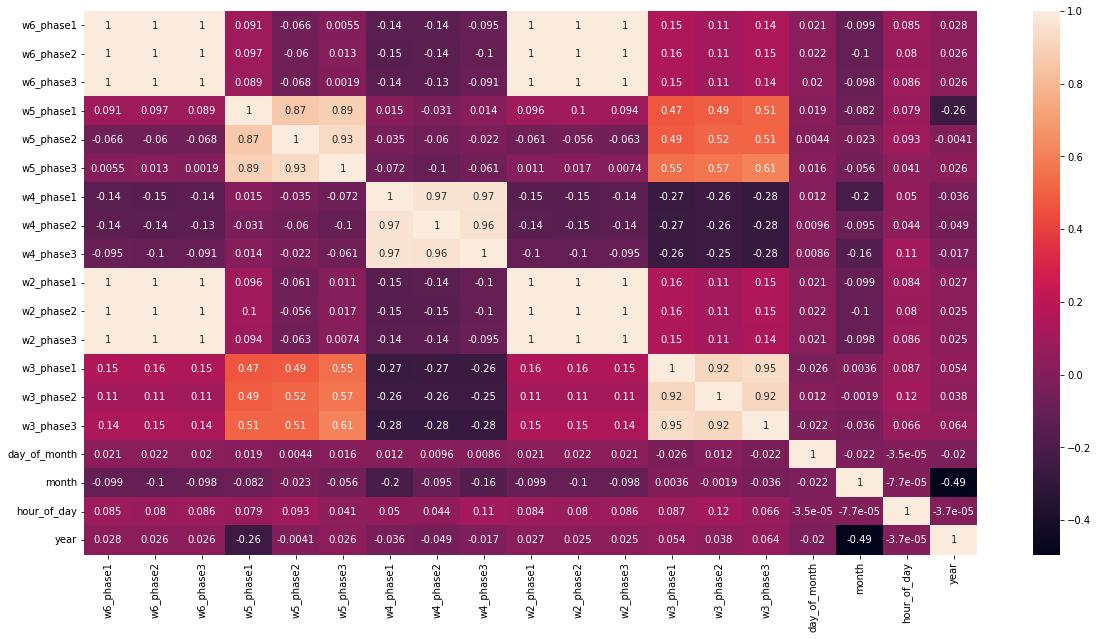

In [ ]:
corr_matrix = current_dt.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

Παρατηρούμε εδώ ότι δεν υπάρχει συσχέτιση ανάμεσα στα φασικά ρεύματα των μετρητών, εκτός από: 


*   Του φωτοβολταϊκού με τον w2 που έχουν απόλυτη θετική συσχέτιση (1) 
*   Της 
μπαταρίας με τον σταθμό φόρτισης που έχουν μέτρια θετική συσχέτιση (0.50 περίπου) 
* Των φάσεων του κάθε μετρητή όπου υπάρχει ισχυρη - απόλυτη θετική συσχέτιση




Θα ενώσουμε τώρα τα dfs του ρεύματος, της τάσης και της ισχύος για να δούμε τις συσχετίσεις ανάμεσα στα διαφορετικά μεγέθη.

In [ ]:
total = pd.concat([voltage_dt, power_dt],join='inner',axis=1)

In [ ]:
total = pd.concat([total, current_dt],join='inner',axis=1)

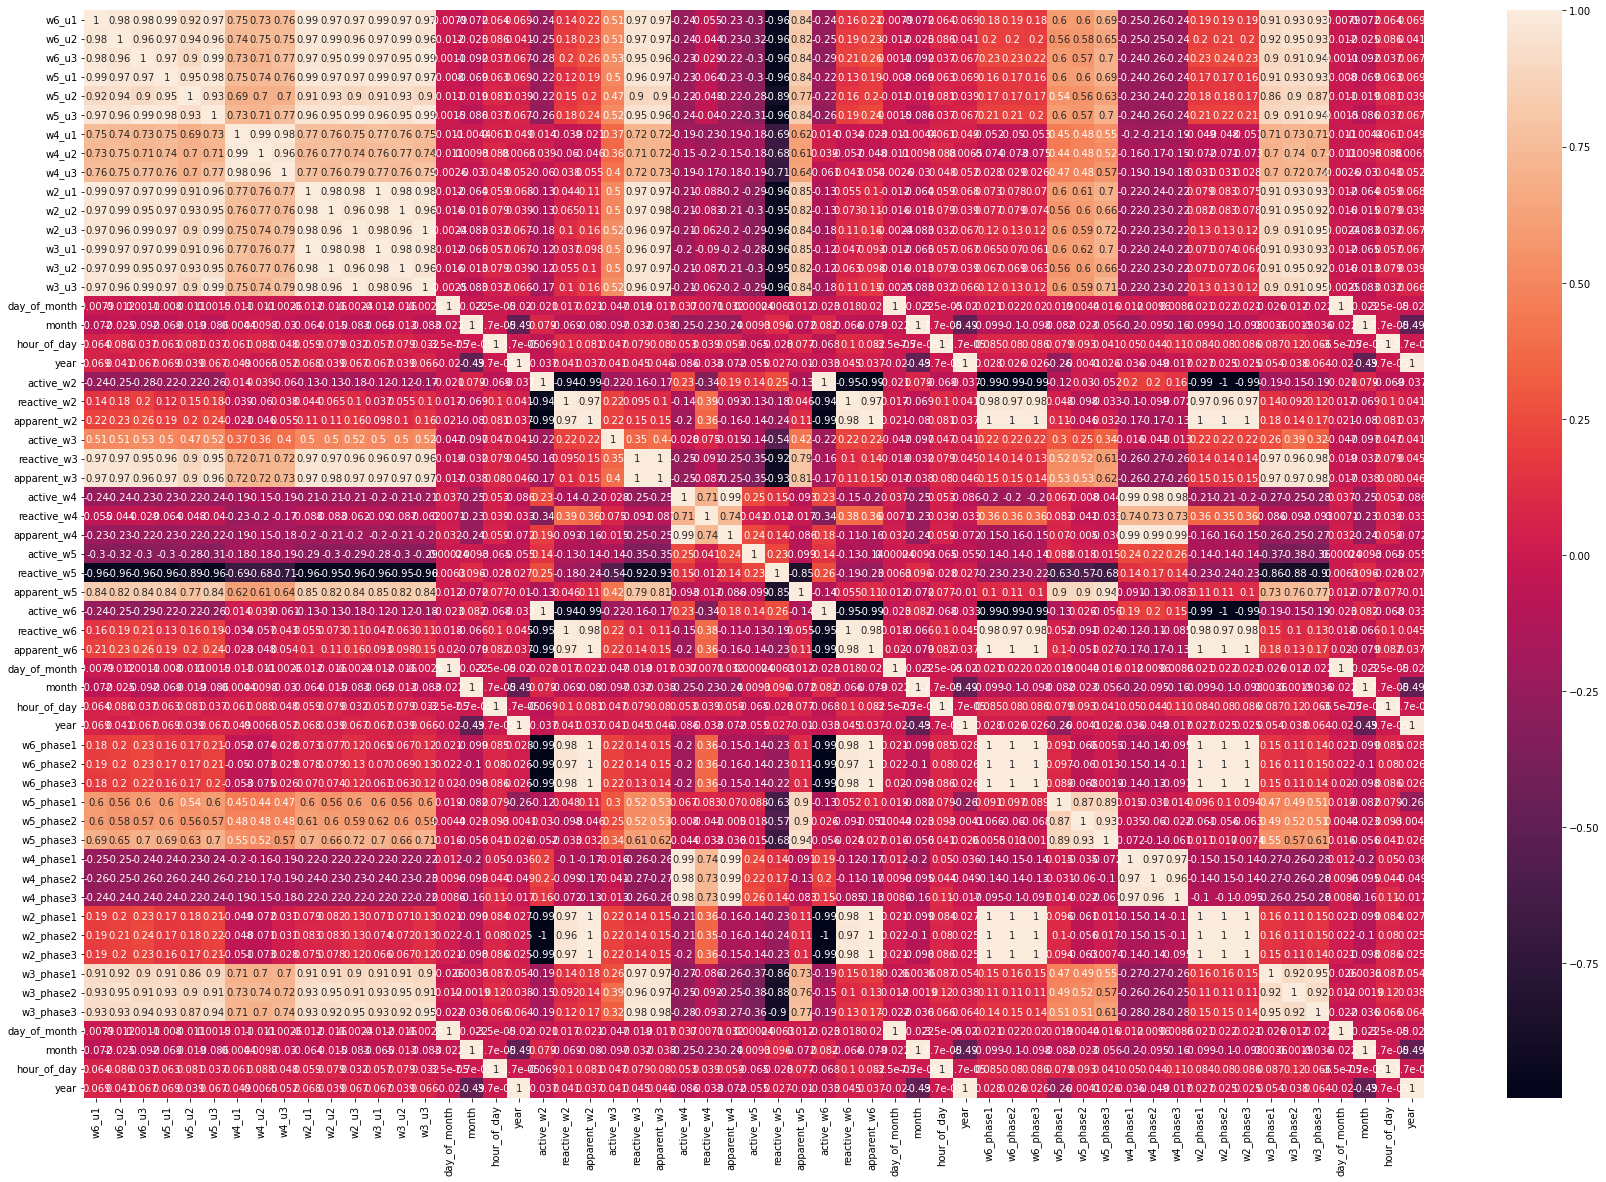

In [ ]:
corr_matrix = total.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True)


**Βλέπουμε ισχυρή συσχέτιση αναμέσα στις φασικές τάσεις όλων των μετρητών και του σταθμού φόρτισης.** Συγκεκριμένα υπάρχει ισχυρή θετική συσχέτιση με την φαινόμενη ισχύ του και ισχυρή αρνητική συσχέτιση με την άεργο. Επιπλέον υπάρχει ισχυρή θετική συσχέτιση με την άεργο και φαινόμενη ισχύ της μπαταρίας.
** Τέλος όσον αφορά τις τάσεις υπάρχει ισχυρή θετική συσχέτιση με τα φασικά ρεύματα της μπαταρίας (w3) και μέτρια συσχέτιση με τα φασικά ρεύματα του σταθμού φόρτισης fast. (w5)**

Eπιπλέον: 
Όσον αφορά την ισχύ του μετρητή w2 
*  η ενεργός ισχύς του έχει ισχυρή αρνητική συσχέτιση με τα φασικά ρεύματα του φωτοβολταϊκου (w6) : **active w2 - phases w6 : -0.99 **
και τα φασικά ρεύματα του ίδιου του w2 : active w2 - phases w2 : -0.99/-1 -> obvious ayto

* η άεργος και η φαινόμενη ισχύς του w2 έχουν ισχυρή θετική συσχέτιση τόσο με τα ρεύματα του φωτοβολταϊκου όσο και με του ίδιου του w2 
**reactive w2 / apparent w2- w6 phases: 0.98/1** , w2 phases : 0.97/1

* H ενεργός και η φαινόμενη ισχύς της μπαταρίας (w3) έχουν ισχυρή θετική συσχέτιση με τα ρεύματα της ιδιας της μπαταρίας :  reactive w3/ apparent w3 -phases w3: 0.97 -> obvious 

* H ενεργός, άεργος και φαινόμενη ισχύς που μετρήθηκε στα headquarters έχει ισχυρή θετική συσχέτιση με τα ρεύματα εκει: 
active - reactive - apparent w4 -- phases w4:0.99/0.74/0.99 ->obvious

* H άεργος και η φαινόμενη ισχύς του σταθμού φόρτισης έχουν ισχυρή αρνητική και μέτρια θετική συσχέτιση με τα ρευματα της μπαταρίας (w3),αντίστοιχα
**reactive w5 - phases w3 : -0.86 / - 0.9**
**apparent w5 - phases w3 : 0.73/ 0.77**

* H άεργος και η φαινόμενη ισχύς του σταθμού φόρτισης έχουν μέτρια και ισχυρή θετική συσχέτιση με τα ρευματα  του σταθμόυ, αντίστοιχα:
reactive w5 - phases w5 : 0.63
apparent w5 - phases w5 : 0.9/0.94 -> obvious
* H ενεργός, άεργος και η φαινόμενη ισχύς του φωτοβοταϊκού έχουν ισχυρή αρνητική και θετική συσχέτιση με τα ρεύματα που μετρήθηκαν απο τον w2 αλλα και τα ρεύματα του φωτοβολταϊκου, αντίστοιχα
**active w6 - phases w2/ phases w6 : -0.99**
**reactive w6 - phases w2 / phases w6 : 0.98**
**apparent w6 - phases w2 /phases w6 : 1**

##Αφού το φωτοβολταϊκό είναι άμεσα συνδεδεμένο με τις καιρικές συνθήκες, είναι λογικό να μελετήσουμε και τα μετεωρολογικά δεδομένα της περιόχης όπου μετράει ο μετρητής w6 του φωτοβολταϊκού, δηλαδή του Terni της Ιταλίας. Έχουμε λάβει τις μετρήσεις για την υγρασία, θερμοκρασία, ακτινοβολία κλπ. για έναν χρόνο και αυτές φαίνονται παρακάτω. 

In [ ]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y%m%d%H%M%S')

weather = pd.read_csv("weather.csv", parse_dates=['time [UTC](yyyymmddHHMM)'], date_parser=dateparse, sep = ';')

In [ ]:
weather

time [UTC](yyyymmddHHMM)  air temperature [°C]  relative humidity [%]  \
0          2018-01-01 00:00:00                   7.2                     85   
1          2018-01-01 01:00:00                   6.3                    100   
2          2018-01-01 02:00:00                   6.5                    100   
3          2018-01-01 03:00:00                   9.3                     82   
4          2018-01-01 04:00:00                   9.3                     81   
...                        ...                   ...                    ...   
40219      2022-08-03 19:00:00                  29.1                     50   
40220      2022-08-03 20:00:00                  27.3                     57   
40221      2022-08-03 21:00:00                  25.7                     61   
40222      2022-08-03 22:00:00                  24.4                     67   
40223      2022-08-03 23:00:00                  23.3                     68   

       wind speed[m/s]  cloudcover [%]  global radiation [W/m^2]  
0                  0.0              94                         0  
1                  0.1             100                         0  
2                  1.3              86                         0  
3                  0.5              43                         0  
4                  0.1              20                         0  
...                ...             ...                       ...  
40219              1.5              16                         0  
40220              1.8               6                         0  
40221              1.2               1                         0  
40222              1.0               1                         0  
40223              1.5               0                         0  

[40224 rows x 6 columns]

Epeidi ta kairika dedomena einai ana wra kai ta dedomena tis isyos einai ana 5lepto, tha antigrapsoume ta data gia to fotovoltaiko se ena xwristo df gia na kanoume resample (ana 1h) wste na einai matched ta dedomena toy pv me ta kairika dedomena. Epeidi einai stigmiaia ta megethi, tha paroume to mean twn 12 pentaleptwn tis wras gia to resample ana wra.

In [ ]:
power_pv_resampled=power_dt[['reactive_w6','active_w6','apparent_w6','day_of_month','month','hour_of_day','year']]

In [ ]:
power_pv_resampled.index = pd.to_datetime(power_pv_resampled.index)


In [ ]:
power_pv_resampled=power_pv_resampled.resample('60min').mean()

Θέτουμε ως index για το df weather την στήλη time..[], που περιεχει την ημερομηνια και την ωρα της μετρησης. 

In [ ]:
weather=weather.set_index('time [UTC](yyyymmddHHMM)')

Kαι τέλος θα βάλουμε τα μετεωρολογικα δεδομένα και τα δεδομένα για την ισχύ του φωτοβολταικού σε ένα κοινό df, χρησιμοποιώντας την built in συνάρτηση merge, ορίζοντας ως παράμετρο how, 'inner' δηλώνοντας έτσι ότι θα κρατήσουμε τις ημερομηνίες που ανήκουν στην ένωση των indexes των δύο dfs.

In [ ]:
pv_weather = pd.merge(power_pv_resampled, weather, how='inner',left_index=True , right_index=True)

In [ ]:
pv_weather.head()

reactive_w6  active_w6  apparent_w6  day_of_month  month  \
2021-08-01 00:00:00          NaN        NaN          NaN           1.0    8.0   
2021-08-01 01:00:00          NaN        NaN          NaN           1.0    8.0   
2021-08-01 02:00:00          NaN        NaN          NaN           1.0    8.0   
2021-08-01 03:00:00          NaN        NaN          NaN           1.0    8.0   
2021-08-01 04:00:00          NaN        NaN          NaN           1.0    8.0   

                     hour_of_day    year  air temperature [°C]  \
2021-08-01 00:00:00          0.0  2021.0                  25.7   
2021-08-01 01:00:00          1.0  2021.0                  25.7   
2021-08-01 02:00:00          2.0  2021.0                  25.6   
2021-08-01 03:00:00          3.0  2021.0                  24.9   
2021-08-01 04:00:00          4.0  2021.0                  24.4   

                     relative humidity [%]  wind speed[m/s]  cloudcover [%]  \
2021-08-01 00:00:00                     62              0.0              44   
2021-08-01 01:00:00                     61              0.1              51   
2021-08-01 02:00:00                     58              0.0              64   
2021-08-01 03:00:00                     65              0.0              71   
2021-08-01 04:00:00                     69              0.0             100   

                     global radiation [W/m^2]  
2021-08-01 00:00:00                         0  
2021-08-01 01:00:00                         0  
2021-08-01 02:00:00                         0  
2021-08-01 03:00:00                         0  
2021-08-01 04:00:00                         0

In [ ]:
pv_weather_corr= pv_weather[['reactive_w6','active_w6','apparent_w6','air temperature [°C]','relative humidity [%]','wind speed[m/s]','cloudcover [%]','global radiation [W/m^2]']]

Και τελικά θα δουμε την συσχέτιση των μεταβλητών, δημιουργώντας εναν χάρτη συσχέτισης


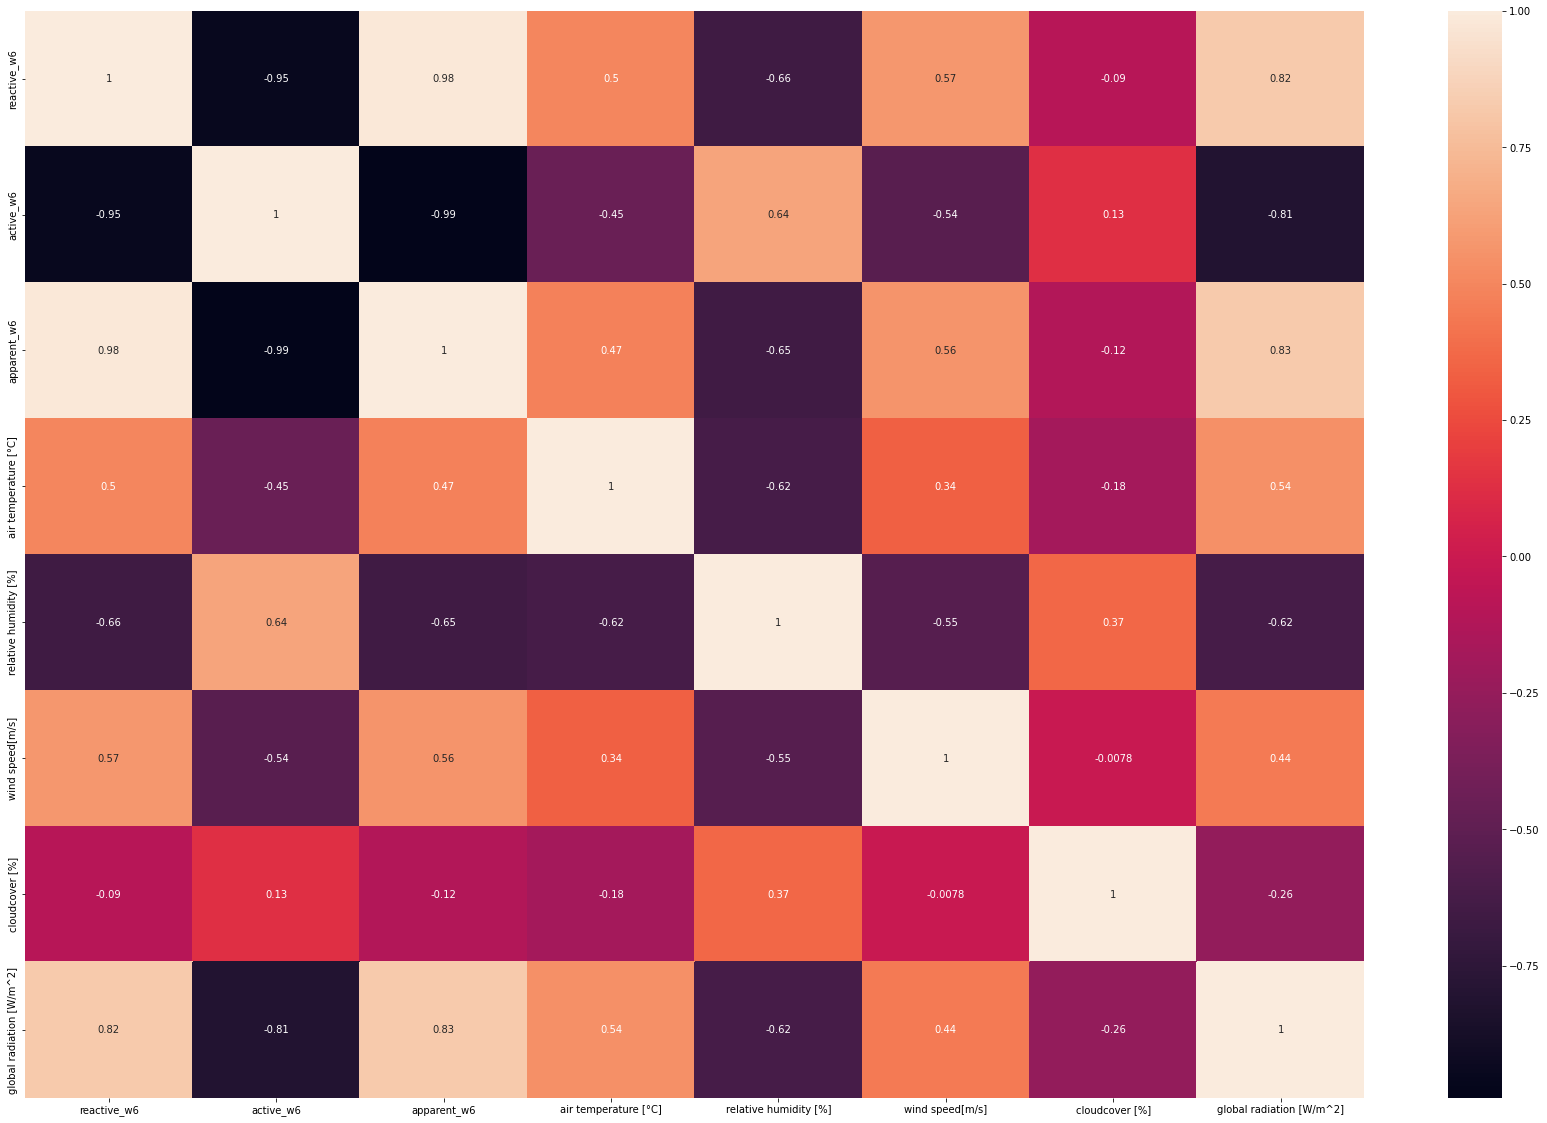

In [ ]:
corr_matrix = pv_weather_corr.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True)

Όπως βλέπουμε και όπως περιμέναμε υπάρχει ισχυρή θετική συσχέτιση ανάμεσα στην άεργο - φαινόμενη ισχύ του φωτοβολταικου και της ακτινοβολίας (η οποία μετριέται σε W/m^2), 0.82, και ισχυρή αρνητική συσχέτιση με την ενεργό ισχύ του φωτοβολταϊκού (-0.81). 
Επιπλέον υπάρχει μέτρια θετική συσχέτιση με την ταχύτητα του ανέμου και της θερμοκρασίας του περιβάλλοντος με την ενεργό ισχύ ( και αρνητικη με τις άεργο/φαινόμενο) και μετρια αρνητική συσχέτιση ( αλλά λίγο πιο ισχυρή από την προηγούμενη) της σχετικής υγρασίας με την ενεργό ισχύ του φωτοβολταϊκου ( και θετικη με τις άεργο/ φαινόμενη)

In [ ]:
missing_filled_power=missing_df(filled_power_dt)


In [ ]:
import missingno as msno

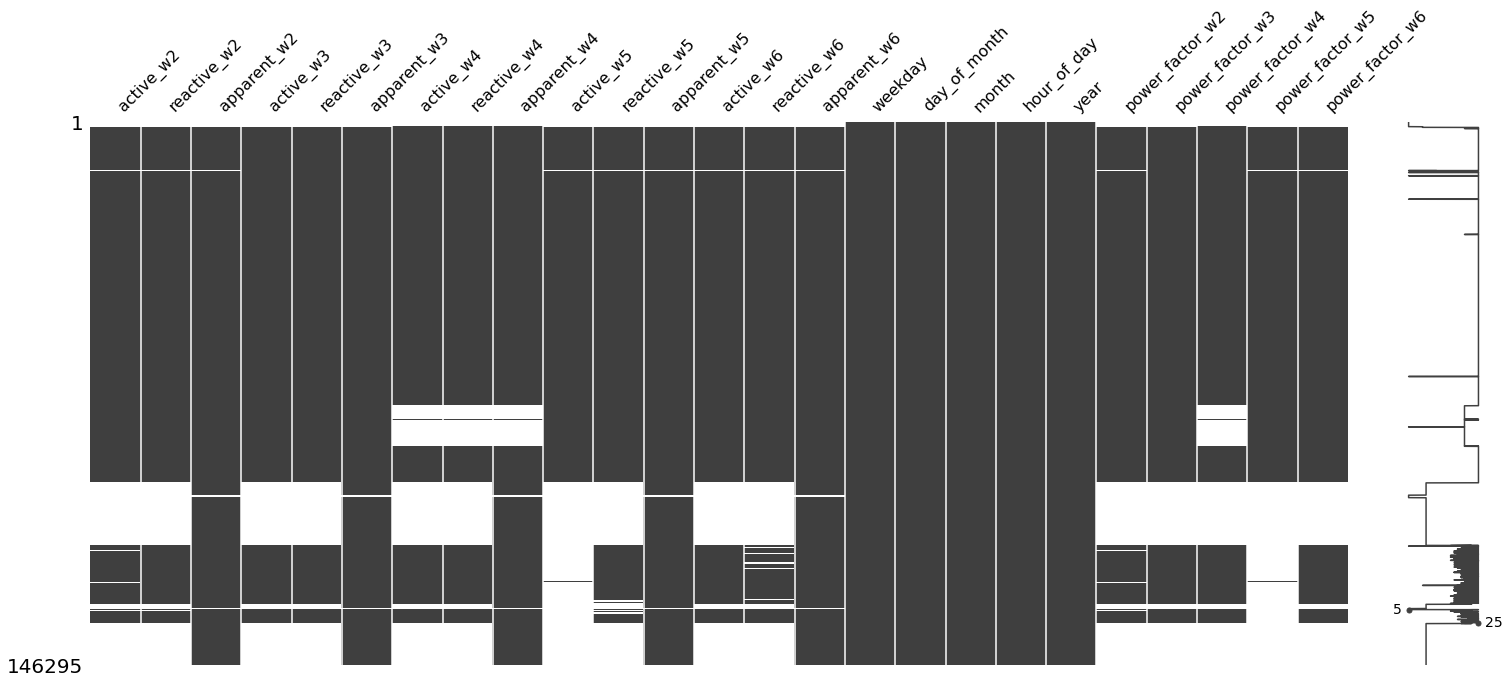

In [ ]:
msno.matrix(filled_power_dt)

Checking nan's distribution after filling several ( about 30000) w5 and w3 reactive power missing values

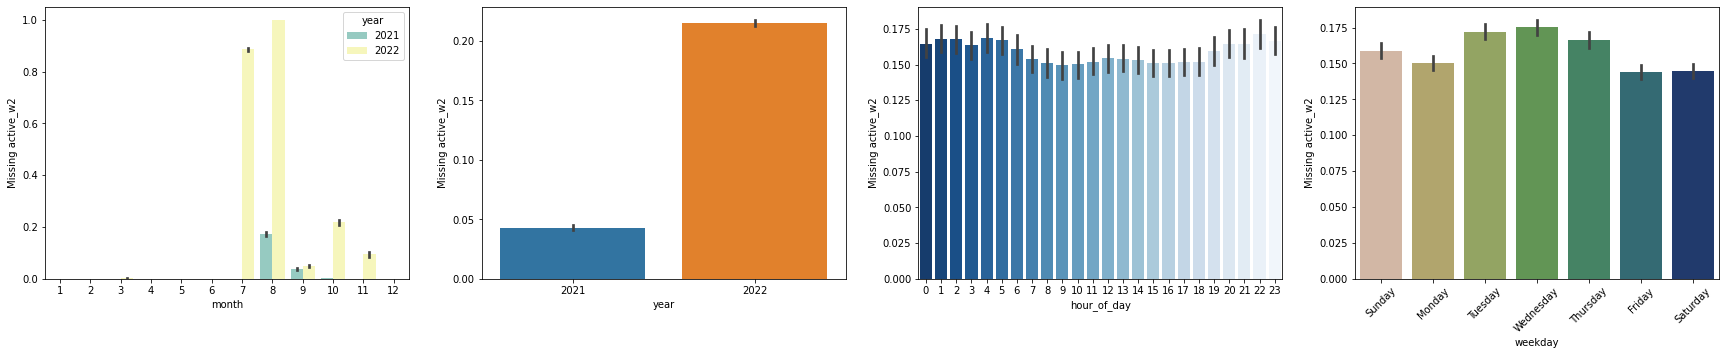

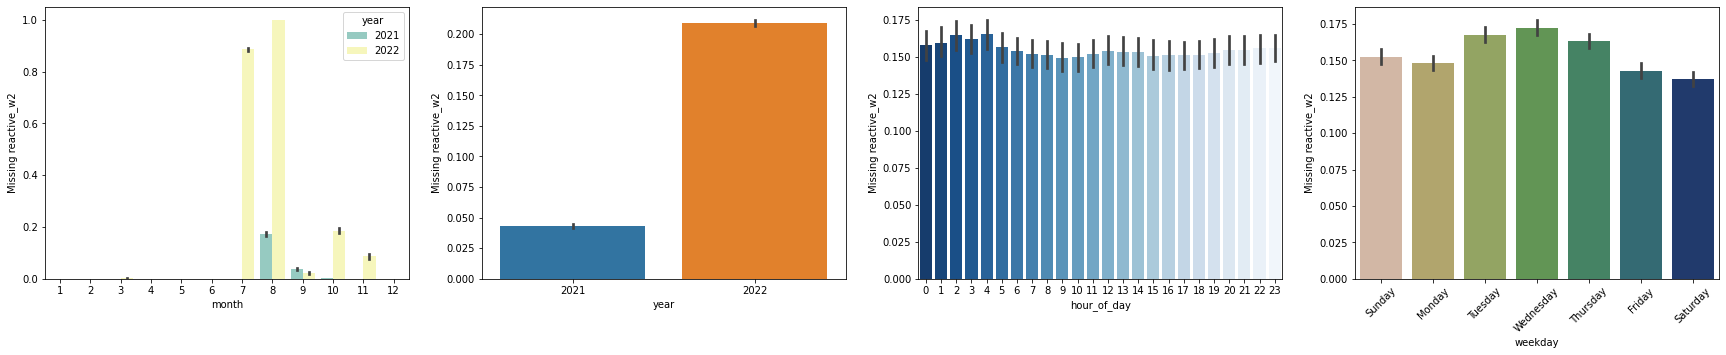

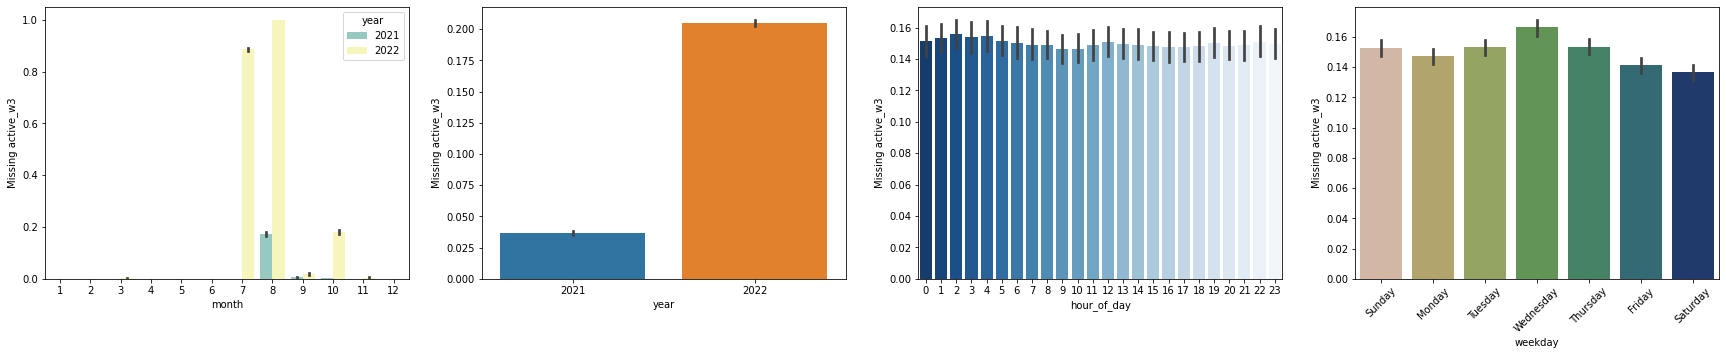

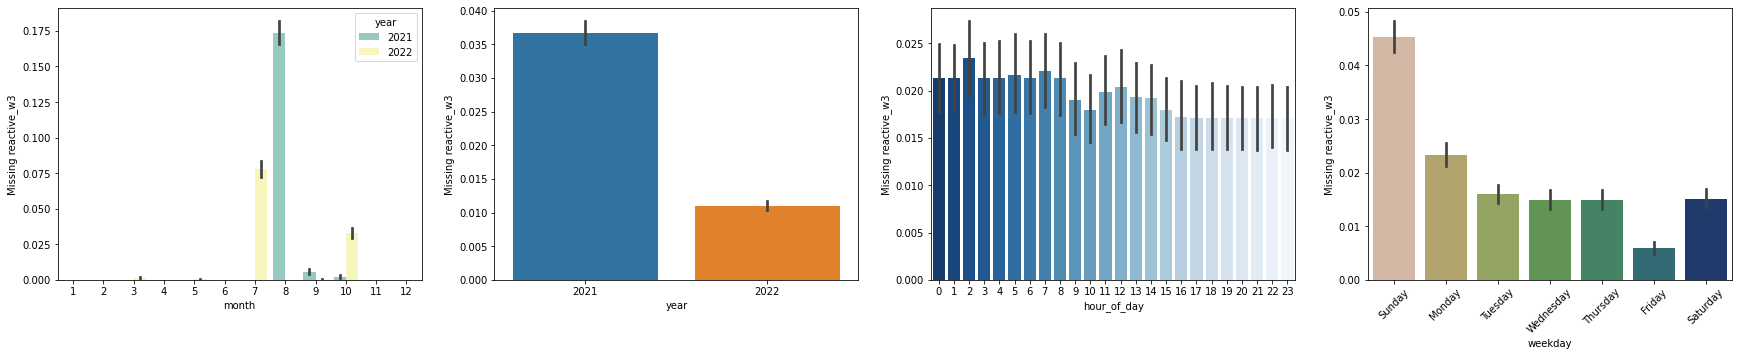

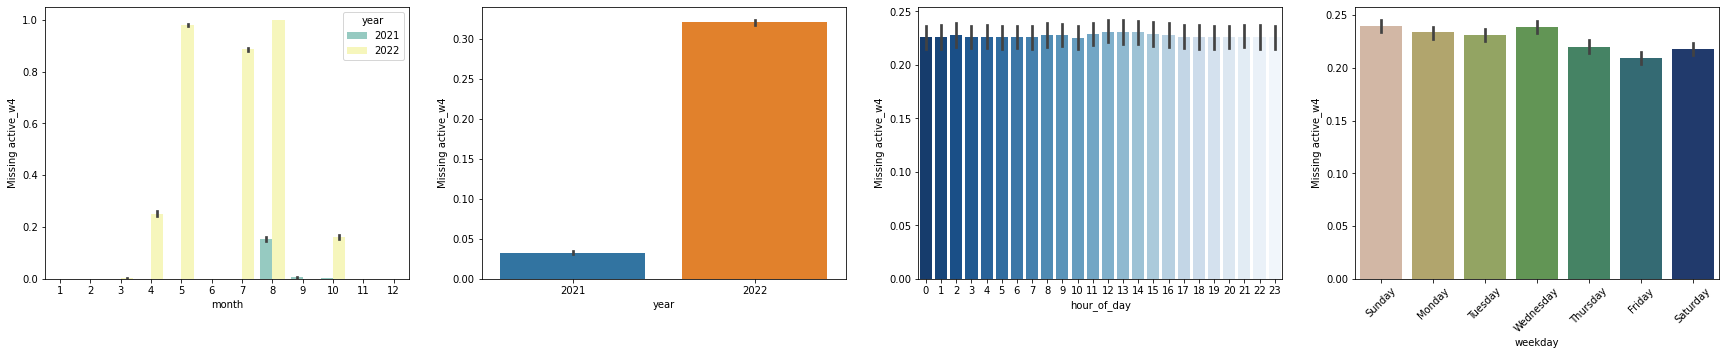

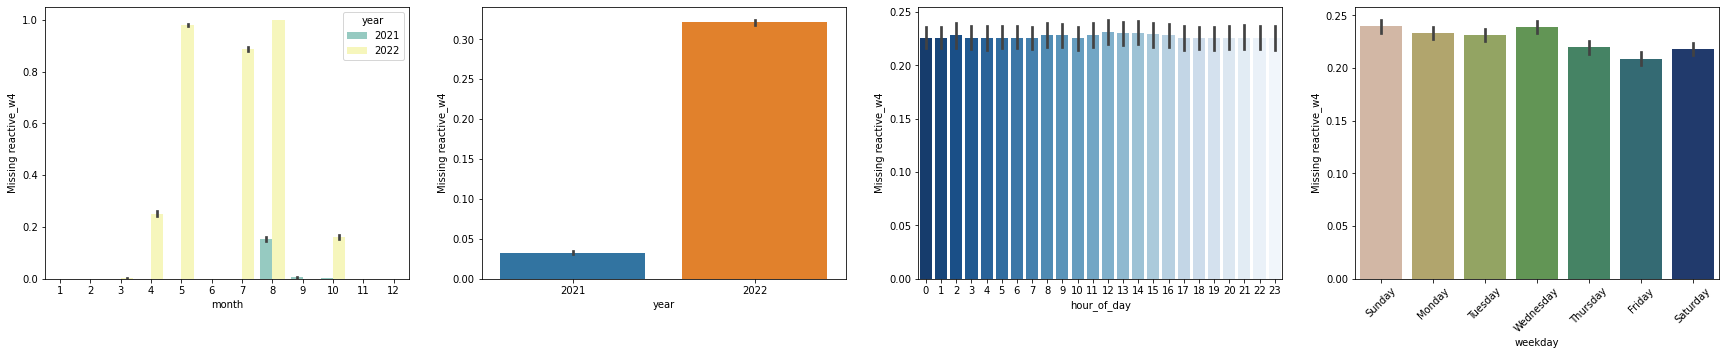

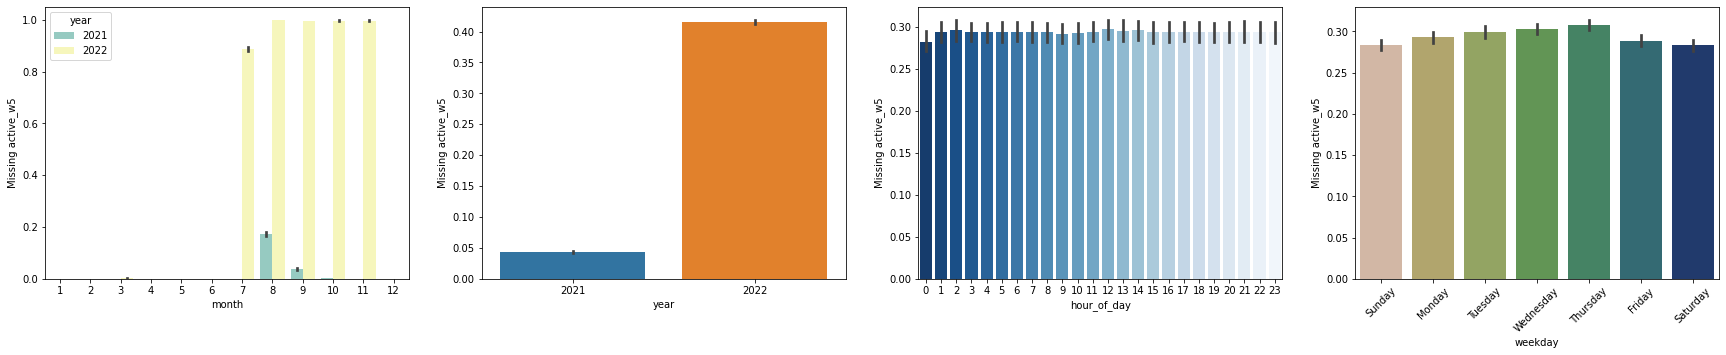

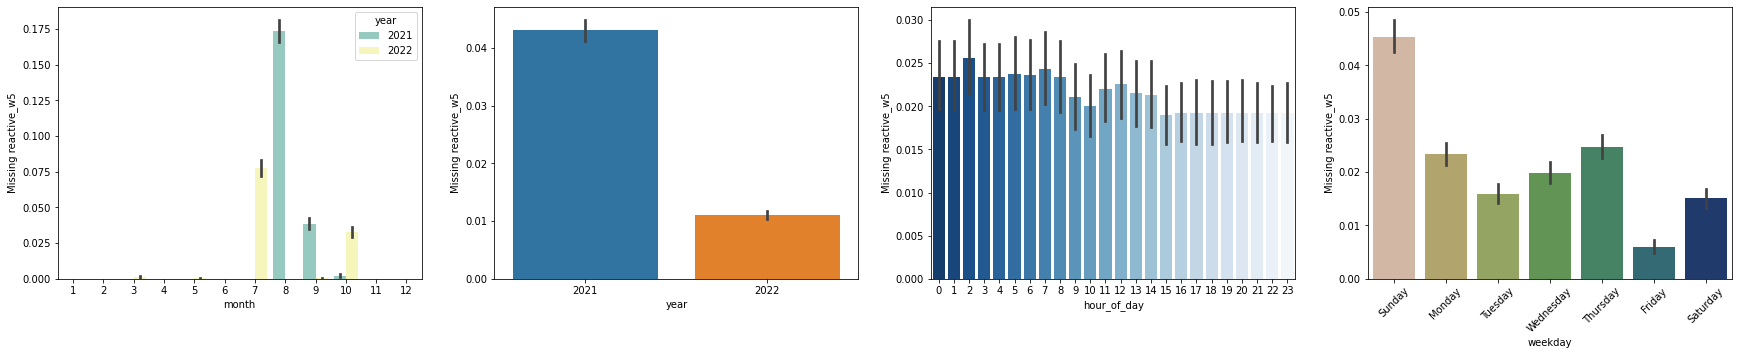

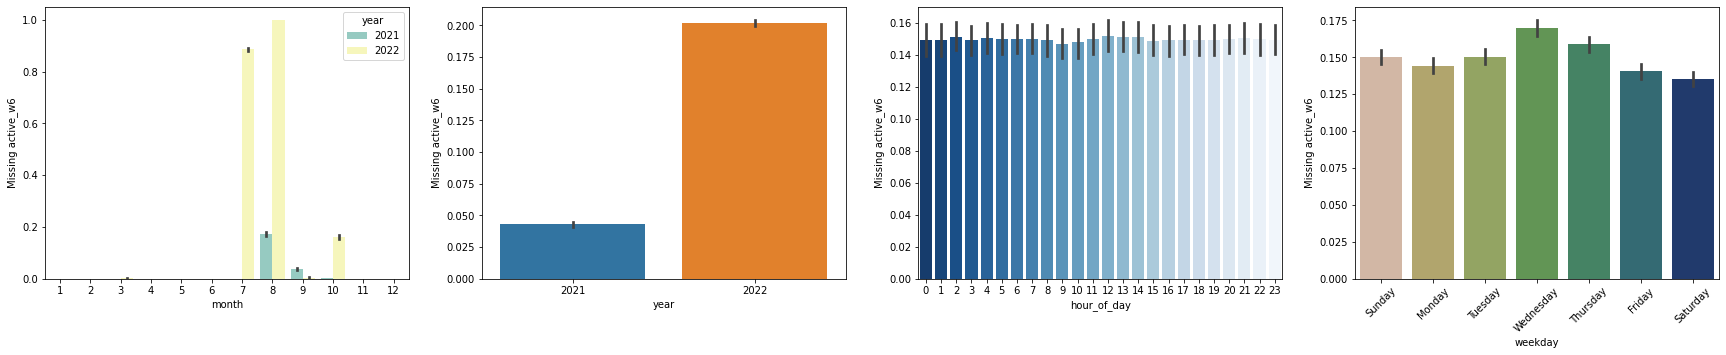

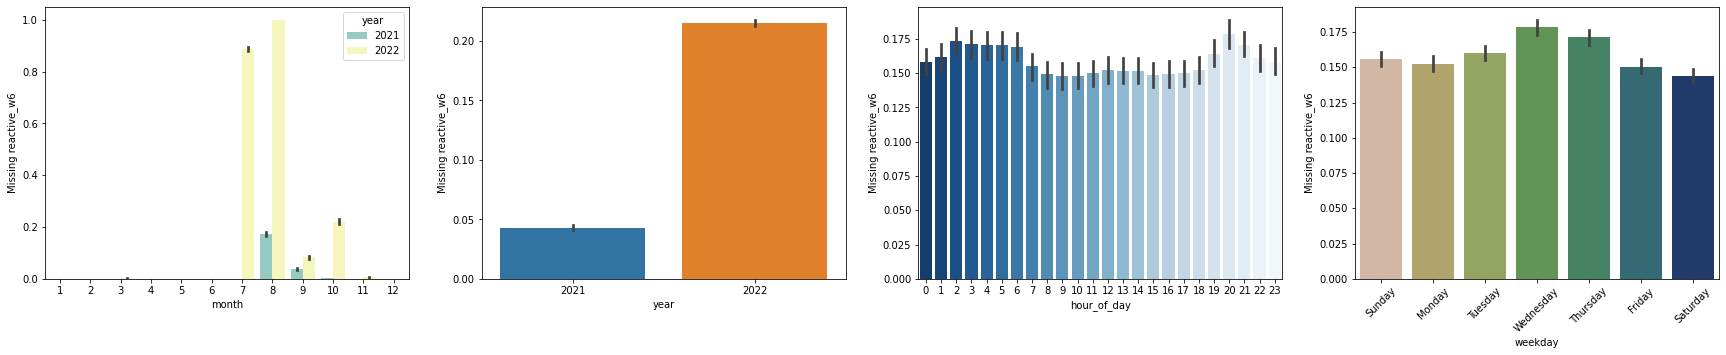

In [ ]:
nan_distribution(missing_filled_power,datetimes)

In [ ]:
def impute(ts: pd.DataFrame,
           max_thr: int = 288,
           a: float = 0.3,
           wncutoff: float = 0.000694,
           ycutoff: int = 3,
           ydcutoff: int = 30,
           resolution: str = "5",
           debug: bool = False):
    """
    Reads the input dataframe and imputes the timeseries using a weighted average of historical data
    and simple interpolation. The weights of each method are exponentially dependent on the distance
    to the nearest non NaN value. More specifficaly, with increasing distance, the weight of
    simple interpolation decreases, and the weight of the historical data increases. If there is
    a consecutive subseries of NaNs longer than max_thr, then it is not imputed and returned with NaN
    values.
    Parameters
    ----------
    ts
        The pandas.DataFrame to be processed
    max_thr
        If there is a consecutive subseries of NaNs longer than max_thr,
        then it is not imputed and returned with NaN values
    a
        The weight that shows how quickly simple interpolation's weight decreases as
        the distacne to the nearest non NaN value increases
    wncutoff
        Historical data will only take into account dates that have at most wncutoff distance
        from the current null value's WN(Week Number)
    ycutoff
        Historical data will only take into account dates that have at most ycutoff distance
        from the current null value's year
    ydcutoff
        Historical data will only take into account dates that have at most ydcutoff distance
        from the current null value's yearday
    re    debug
        If true it will print helpfull intermediate results
    Returns
    -------
    pandas.DataFrame
        The imputed dataframe
    """

    #Returning calendar of the country ts belongs to
    from datetime import datetime,timedelta
    for col in ts.columns:
      if col not in ('month','year','weekday','day_of_month','hour_of_day'):
        imputed_values = ts[ts[col].isnull()]


        #null_dates: Series with all null dates to be imputed
        null_dates = imputed_values.index
        d = [len(null_dates) for _ in range(len(null_dates))]


        if debug:
            for date in null_dates:
                print(date)

        #isnull: An array which stores whether each value is null or not
        isnull = ts[col].isnull().values

        #d: List with distances to the nearest non null value
        d = [len(null_dates) for _ in range(len(null_dates))]

        #leave_nan: List with all the values to be left NaN because there are
        #more that max_thr consecutive ones
        leave_nan = [False for _ in range(len(null_dates))]

        #Calculating the distances to the nearest non null value that is earlier in the series
        count = 1
        for i in range(len(null_dates)):
            d[i] = min(d[i], count)
            if i < len(null_dates) - 1:
              next=(datetime.strptime(null_dates[i+1], '%Y-%m-%d %H:%M:%S')).strftime("%Y-%m-%d %H:%M:%S")
              current_plus5=((datetime.strptime(null_dates[i], '%Y-%m-%d %H:%M:%S'))+timedelta(minutes=5)).strftime("%Y-%m-%d %H:%M:%S")
              if next == current_plus5:
                    count += 1
              else:
                    count = 1

        #Calculating the distances to the nearest non null value that is later in the series
        count = 1
        for i in range(len(null_dates)-1, -1, -1):
            d[i] = min(d[i], count)
            if i > 0:
              previous=(datetime.strptime(null_dates[i-1], '%Y-%m-%d %H:%M:%S')).strftime("%Y-%m-%d %H:%M:%S")
              current_minus5=((datetime.strptime(null_dates[i], '%Y-%m-%d %H:%M:%S'))-timedelta(minutes=5)).strftime("%Y-%m-%d %H:%M:%S")
              if current_minus5==previous:
                    count += 1
              else:
                    count = 1

        #If d[i] >= max_thr // 2, that means we have a consecutive subseries of NaNs longer than max_thr.
        #We mark this subseries so that it does not get imputed
        for i in range(len(null_dates)):
            if d[i] == max_thr // 2:
                for ii in range(max(0, i - max_thr // 2 + 1), min(i + max_thr // 2, len(null_dates))):
                    leave_nan[ii] = True
            elif d[i] > max_thr // 2:
                leave_nan[i] = True

        #This is the interpolated version of the time series
        ts_interpolated = ts[col].interpolate(inplace=False)

        #We copy the time series so that we don't change it while iterating
        res = ts.copy()
        for i, null_date in enumerate(null_dates):
          if leave_nan[i]: continue
          res.loc[null_date][col] = ts_interpolated.loc[null_date]


    return res


In [ ]:
imputed_power =impute(filled_power_dt)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


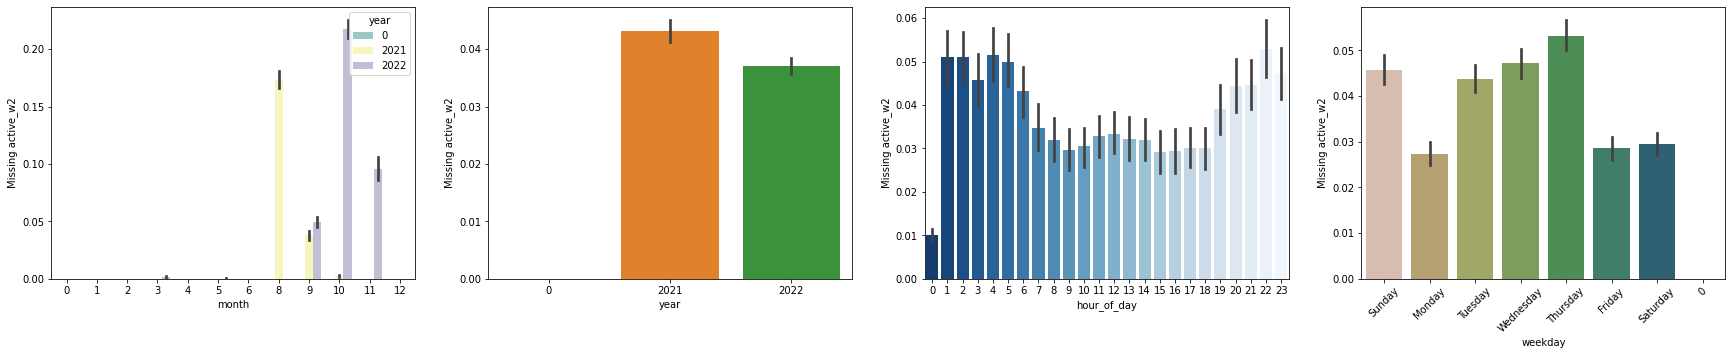

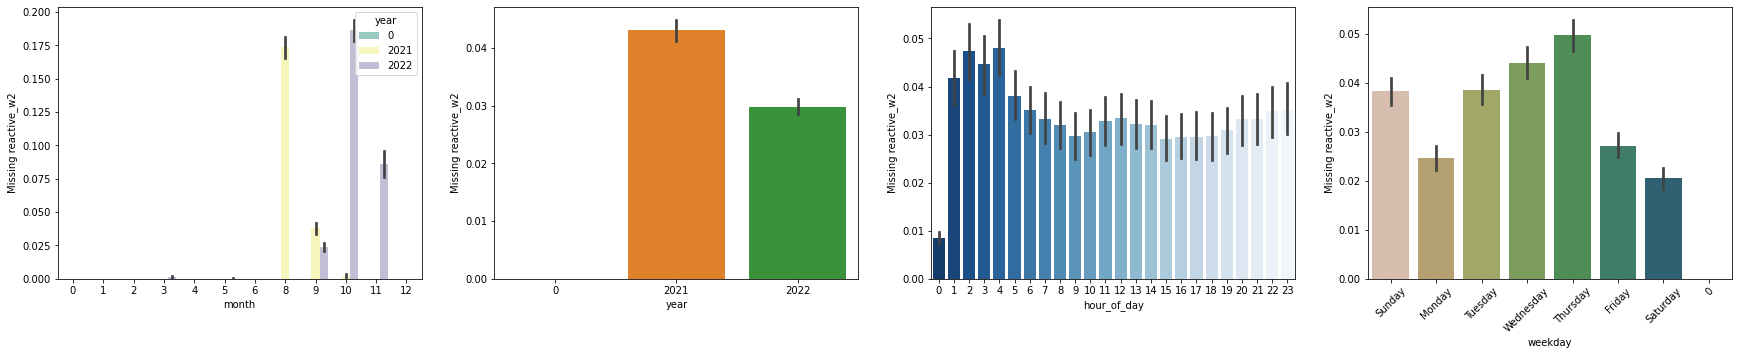

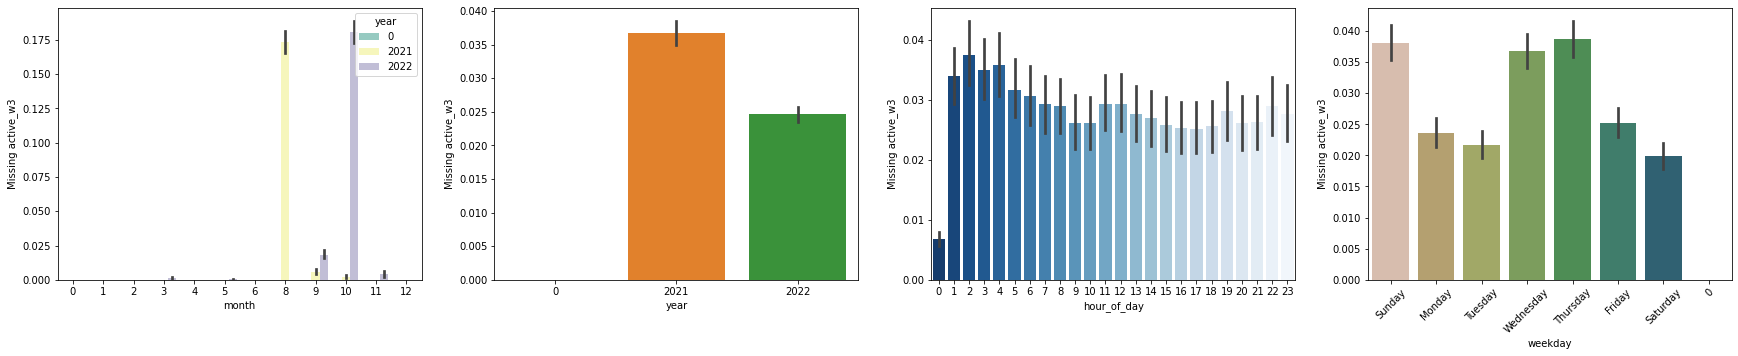

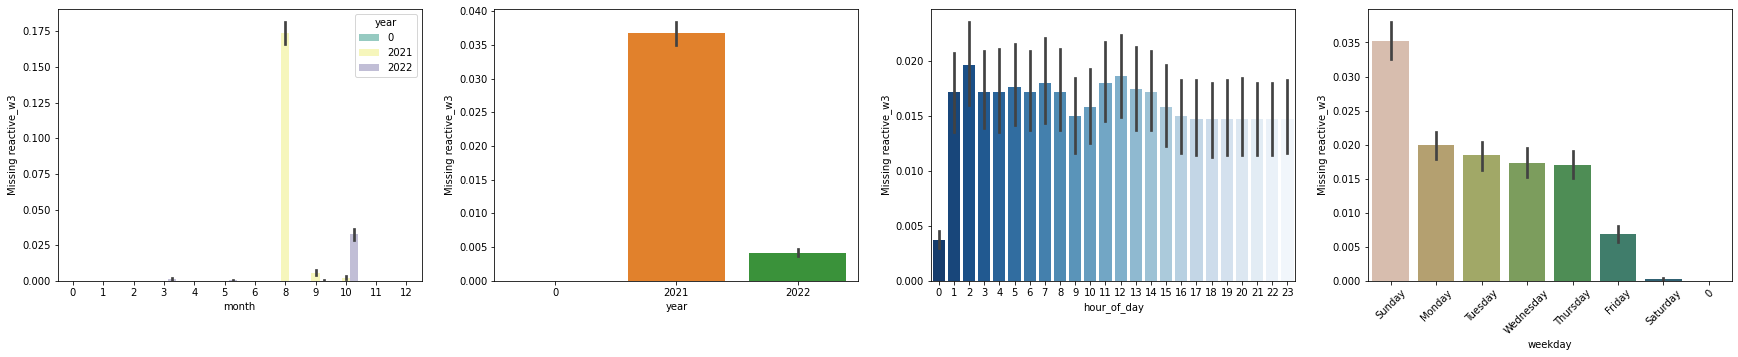

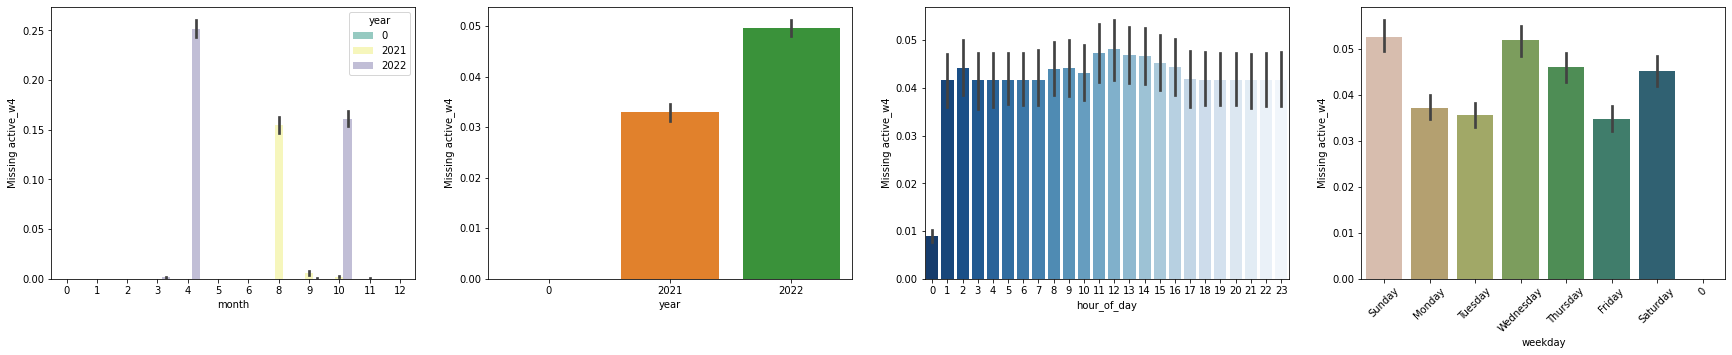

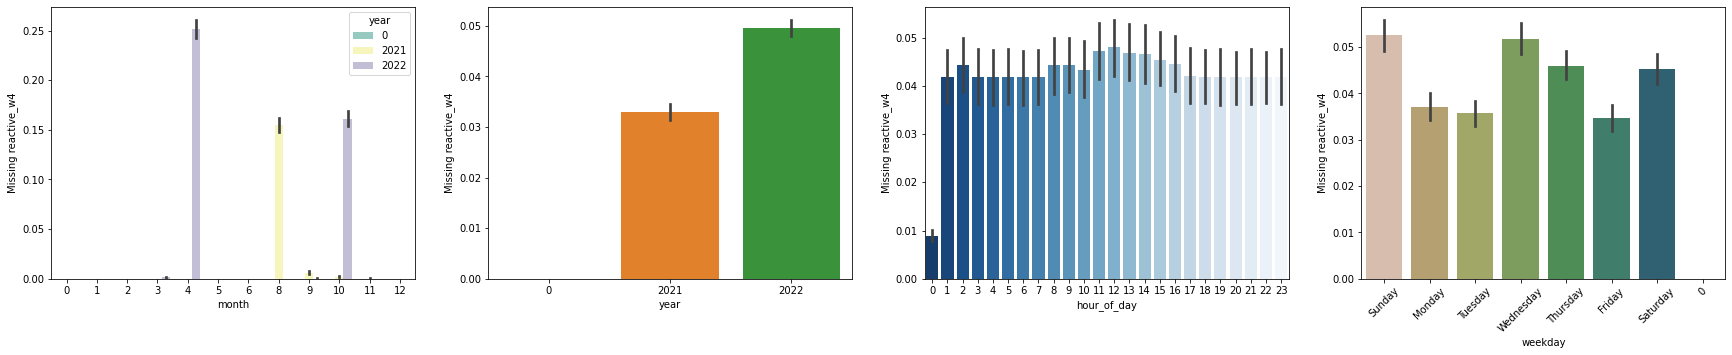

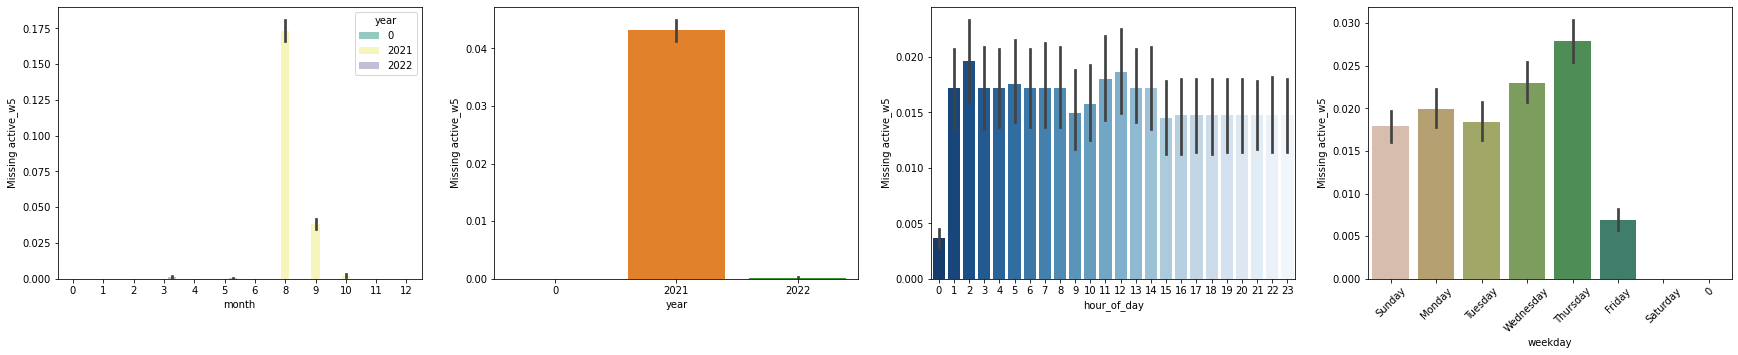

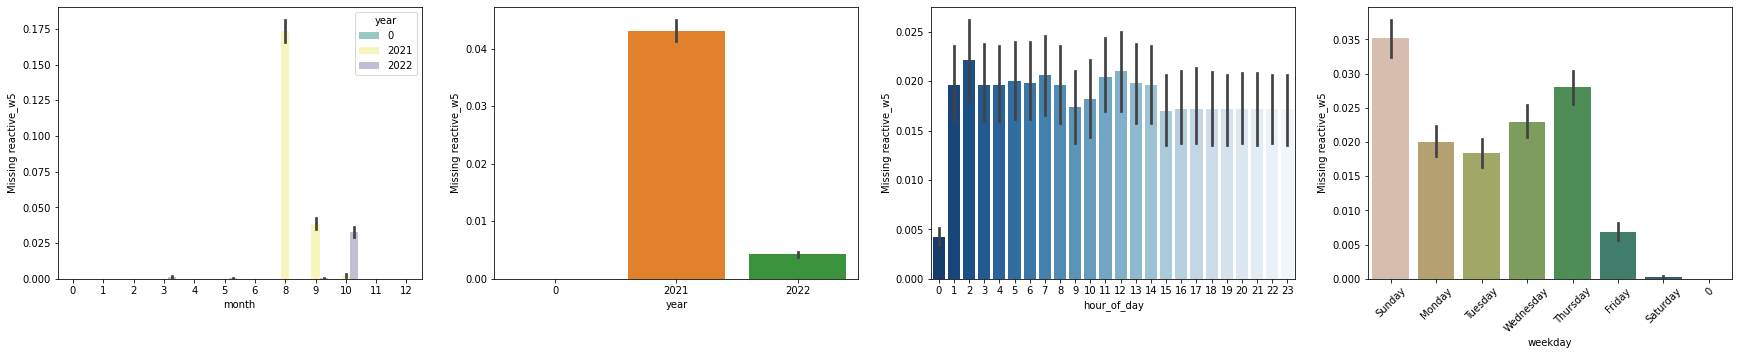

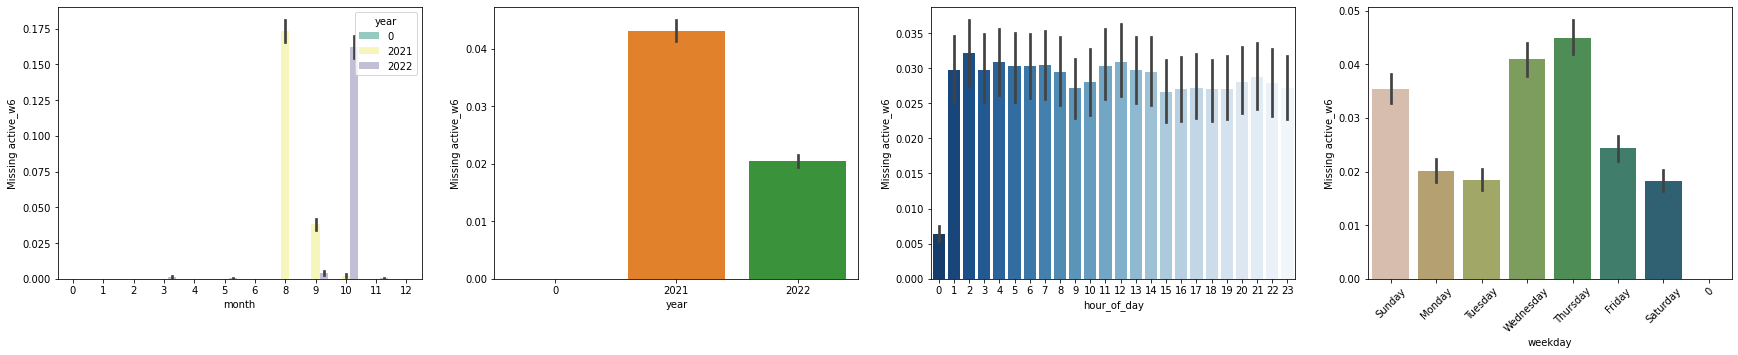

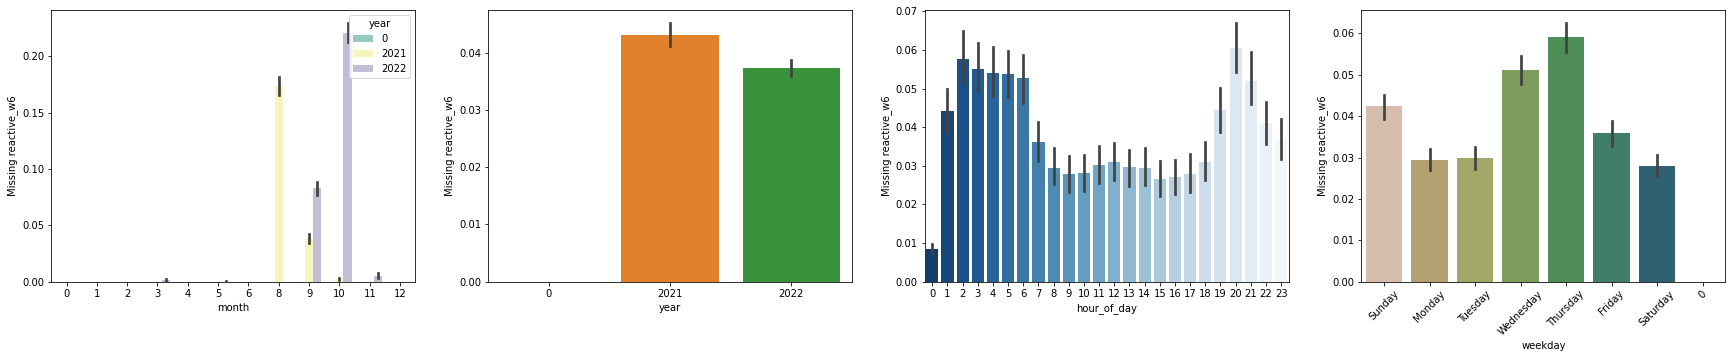

In [ ]:
missing_filled_power=missing_df(filled_power_dt)

nan_distribution(missing_filled_power,datetimes)


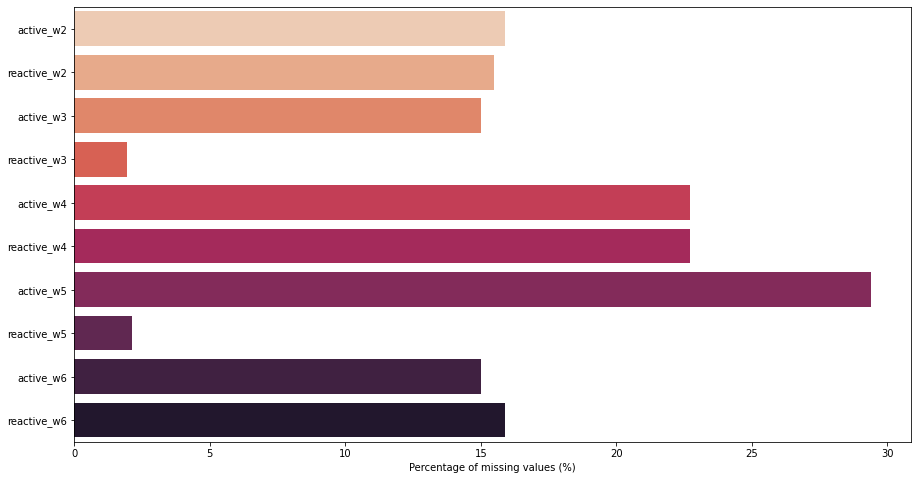

In [ ]:
nan_percentage(filled_power_dt)

Power df:

*   July and August 2022 will be excluded from all meters' calculations
*   for W4 May 2022 will also be excluded
*   for w5, September, October and November 2022 will be excluded



Oi mones diafores poy exoyme einai sto reactive_w3 kai reactive_w5 poy efarmosame tin methodo me to v*i. Me to interpolation den ypirxe kapoia megali allagi, poy simainei oti ta kena poy yparxoun einai kata vasi synexomena. 
Afou den mporoume na efarmosoume kapoia alli methodo kai den exoume dedomena gia kapoious oloklirous mines, telika tha tous kanoume exclude apo tis analyseis mas.

In [ ]:
mask = (filled_power_dt.month == 5) & (filled_power_dt.year ==2022)
filled_power_dt.loc[mask, 'active_w4'] = 0
filled_power_dt.loc[mask, 'reactive_w4'] = 0
mask = (filled_power_dt.month == 7) & (filled_power_dt.year ==2022)
filled_power_dt.loc[mask] = 0
filled_power_dt.loc[mask] = 0
mask = (filled_power_dt.month == 8) & (filled_power_dt.year ==2022)
filled_power_dt.loc[mask] = 0
filled_power_dt.loc[mask] = 0
mask = (filled_power_dt.month == 9) & (filled_power_dt.year ==2022)
filled_power_dt.loc[mask, 'active_w5'] = 0
mask = (filled_power_dt.month == 10) & (filled_power_dt.year ==2022)
filled_power_dt.loc[mask, 'active_w5'] = 0
mask = (filled_power_dt.month == 11) & (filled_power_dt.year ==2022)
filled_power_dt.loc[mask, 'active_w5'] = 0




(array([1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500., 5000.,
        5500.]), <a list of 10 Text major ticklabel objects>)

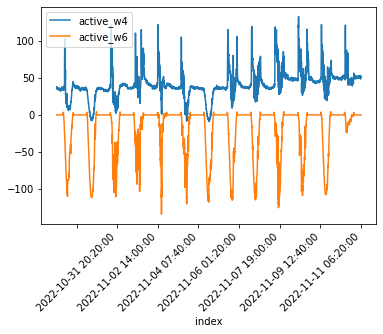

In [ ]:
filled_power_dt[-5000:][['active_w4','active_w6']].plot()
plt.xticks(rotation=45)

In [ ]:
power_dt.isna().sum().sum()

247185

Creating a function that shoes histograms for every  column of the input dataframe


In [ ]:
def create_hists(df):

  for col in df.columns: 
    if col not in ('month','weekday','day_of_month','hour_of_day','year'):
      df.hist(column=col, bins=50, figsize=(12,8))


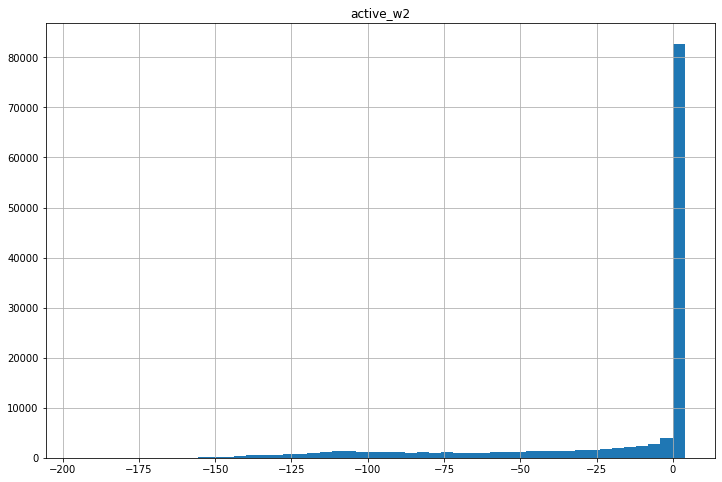

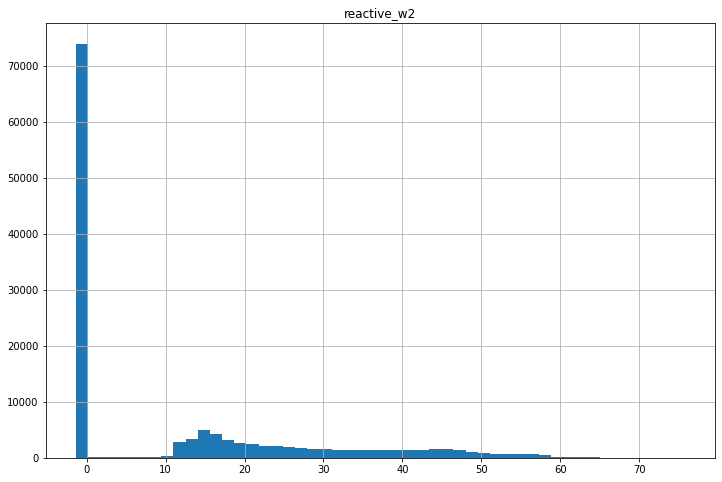

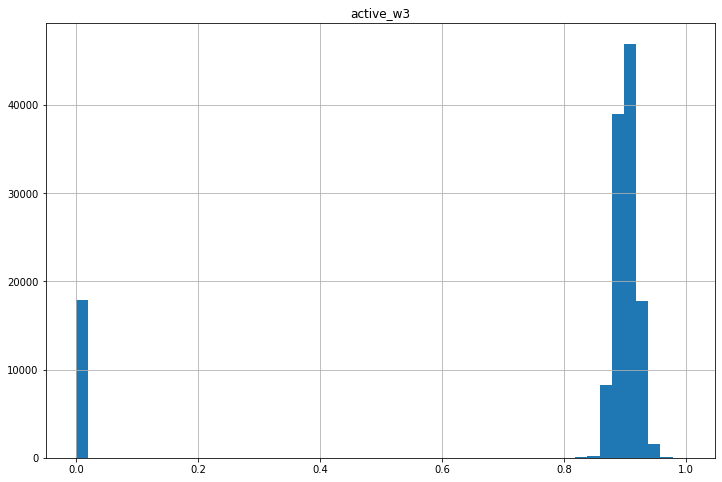

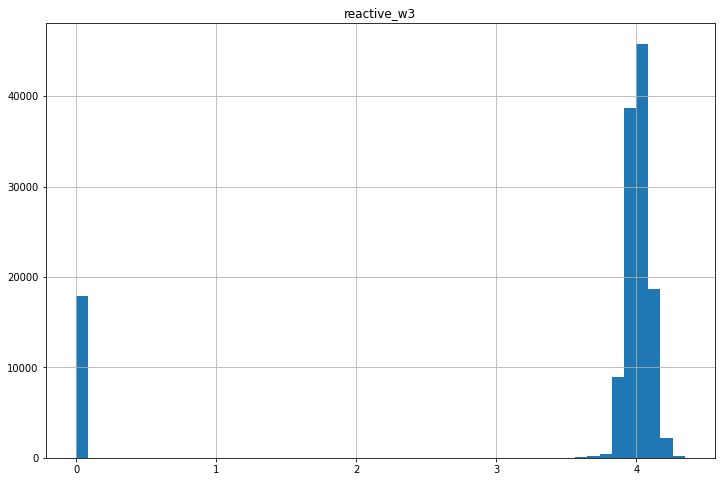

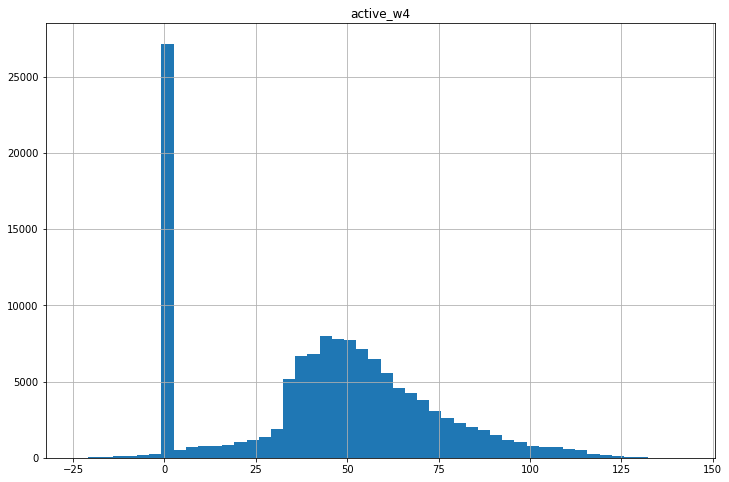

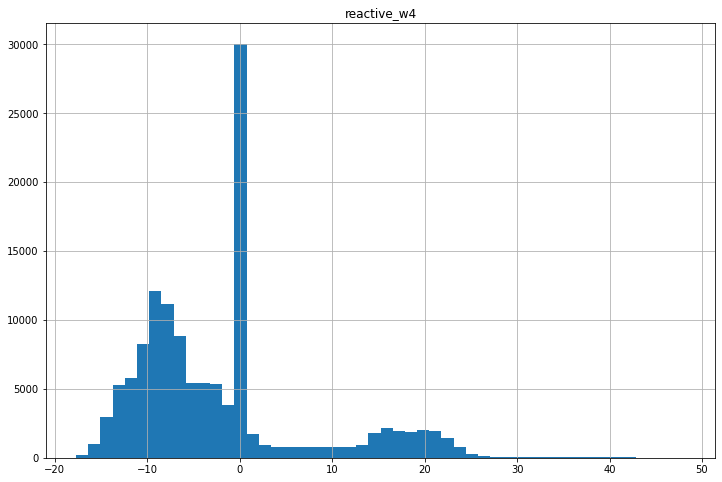

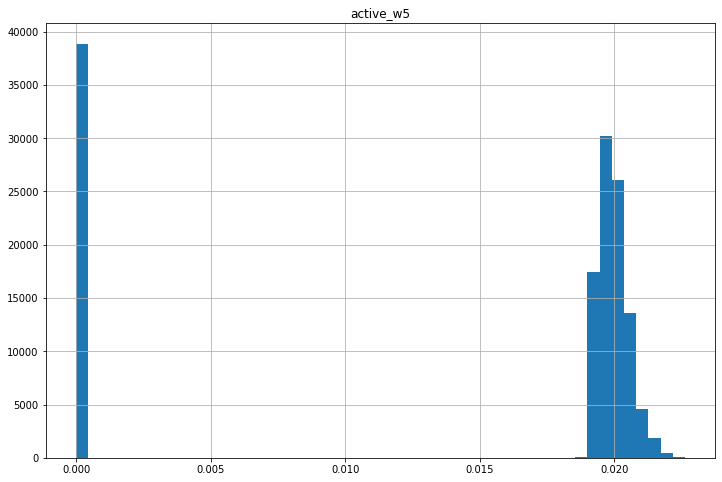

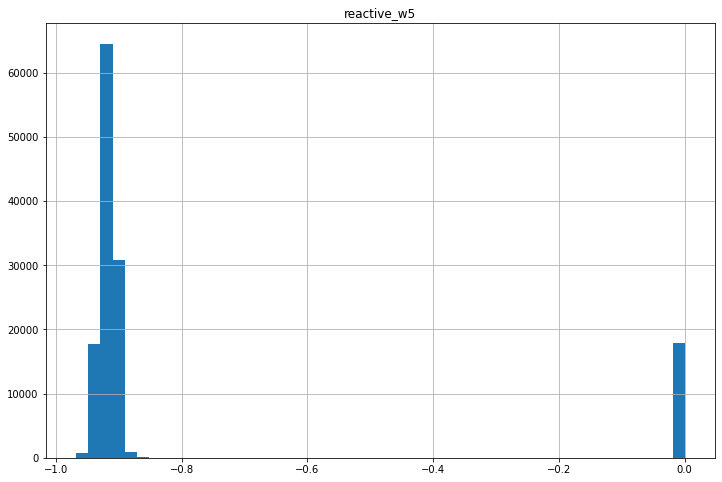

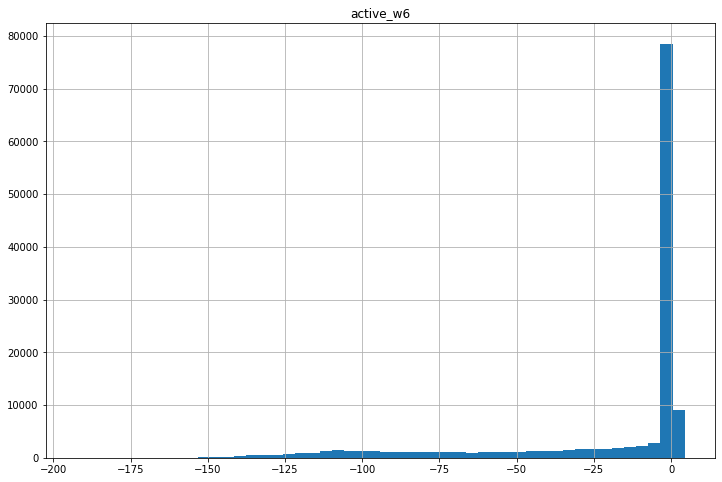

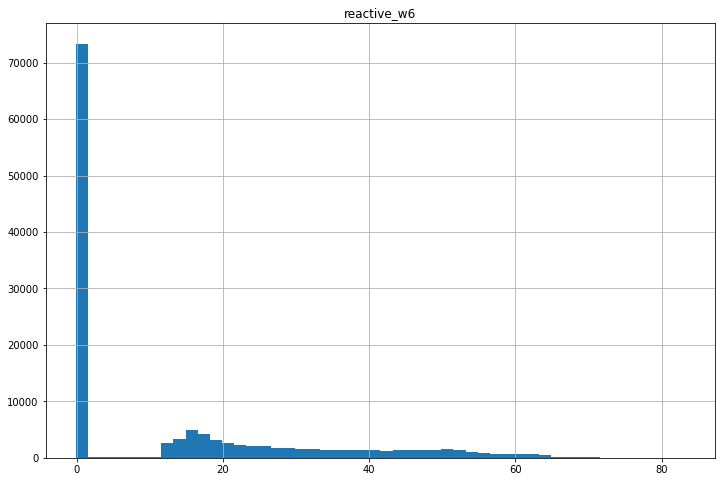

In [ ]:
create_hists(filled_power_dt)

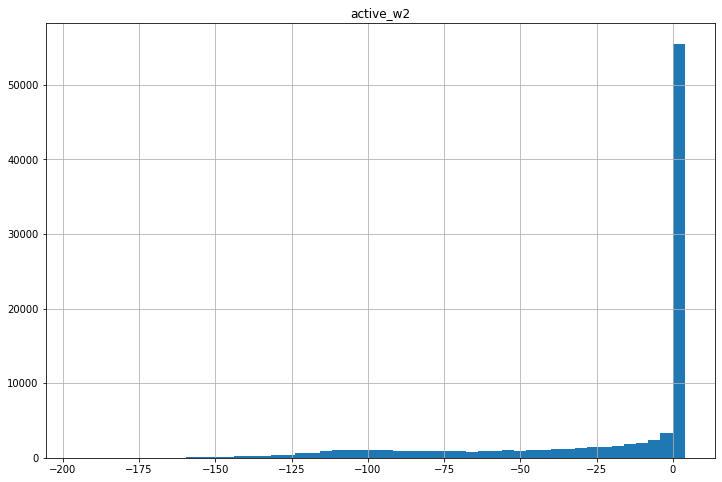

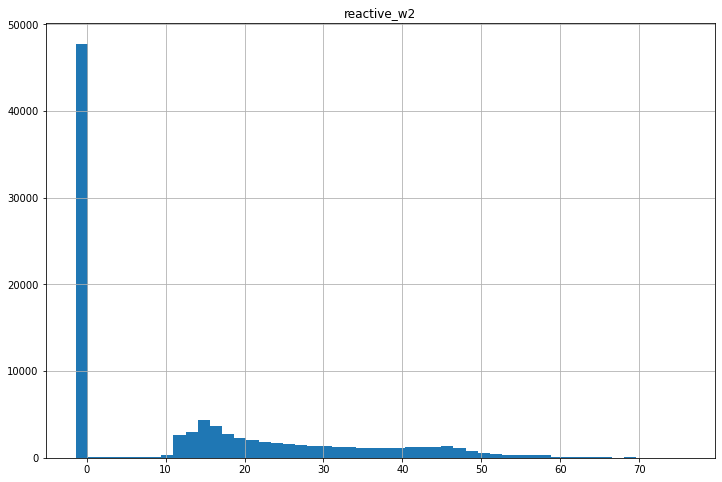

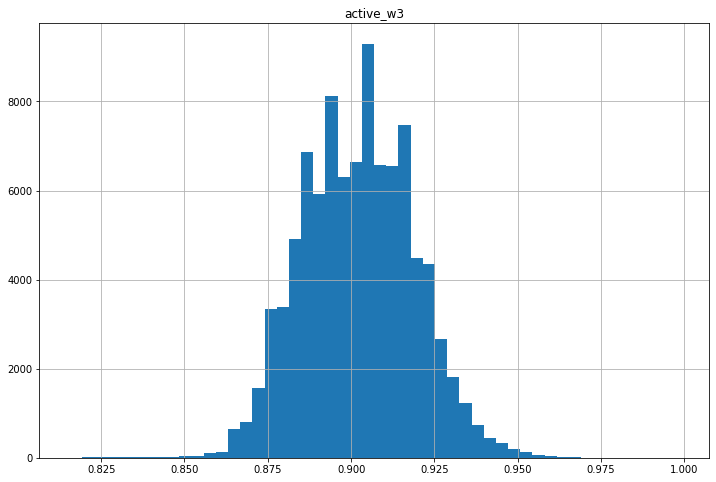

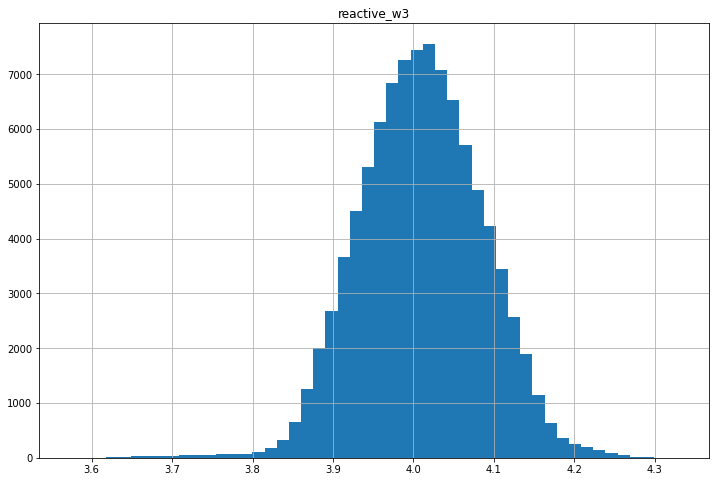

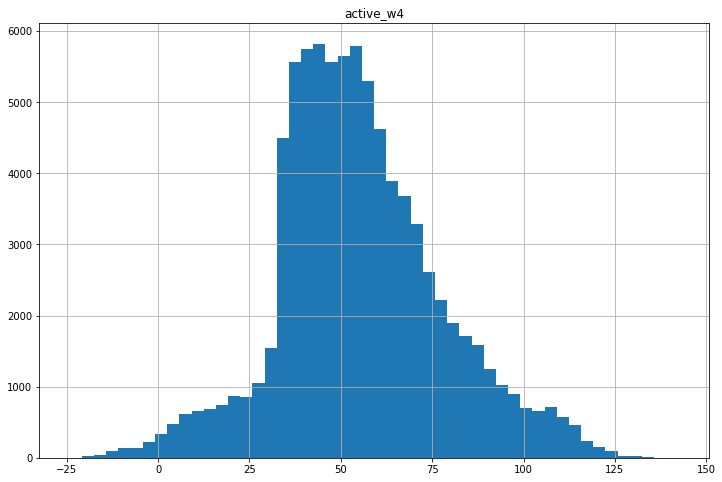

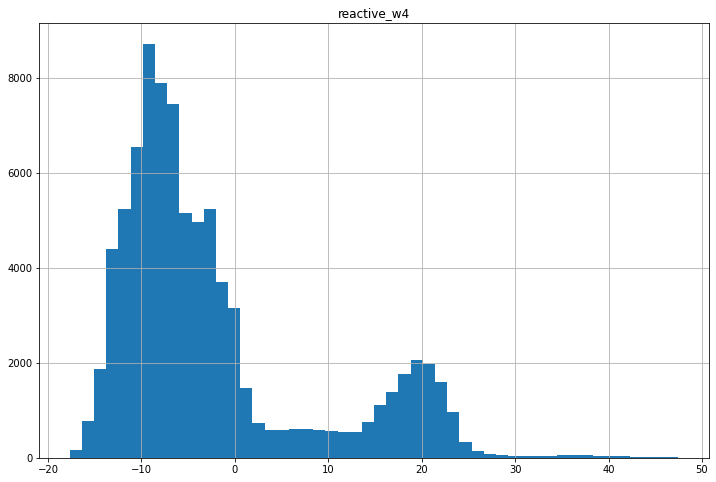

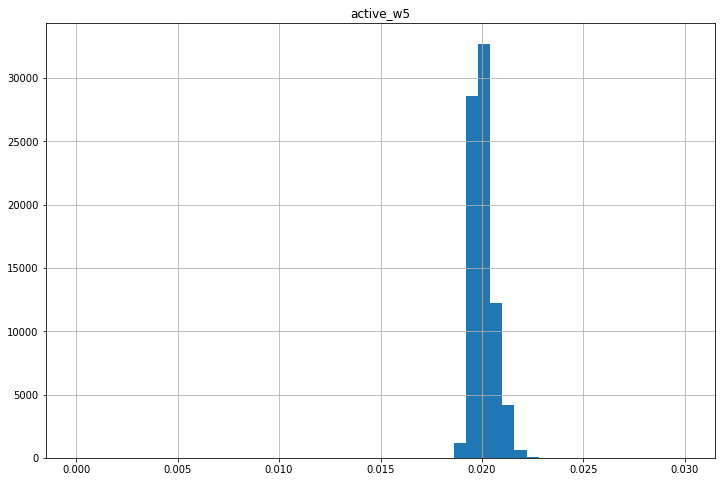

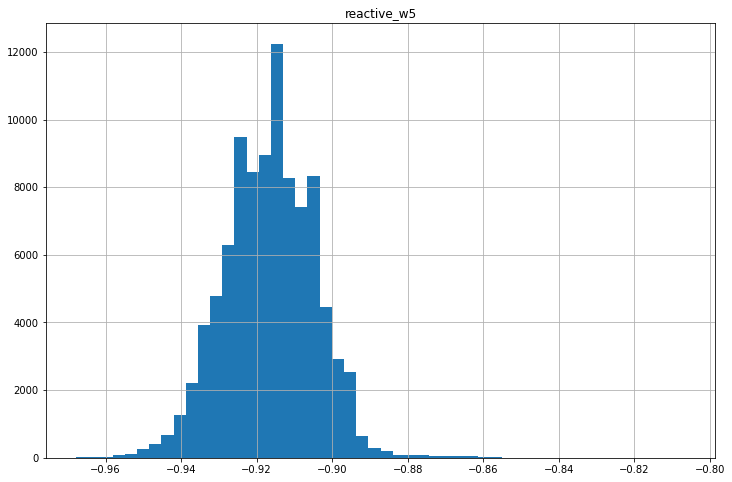

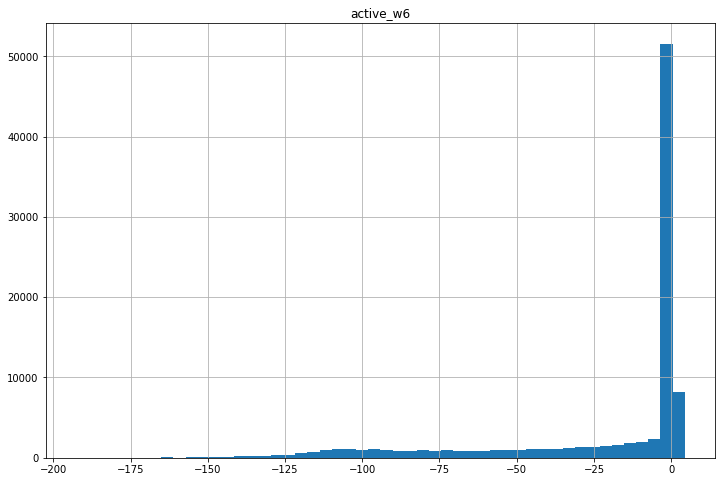

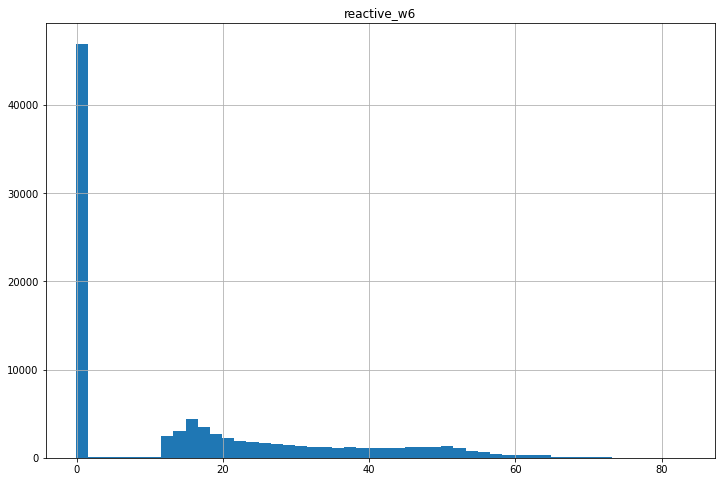

In [ ]:
create_hists(power_dt)
create_hists(current_dt)
create_hists(voltage_dt)

In [ ]:
power_d=power_dt.set_index("index")
current_d=current_dt.set_index('index')
voltage_d = current_dt.set_index("index")

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

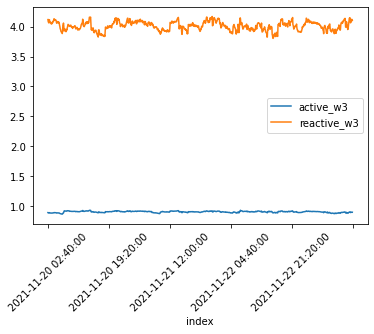

In [ ]:
power_dt[32000:33000][['active_w3','reactive_w3']].plot()
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

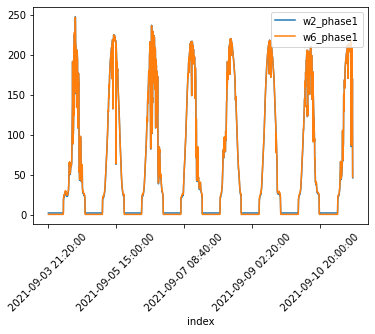

In [ ]:
current_dt[9760:12000][['w2_phase1','w6_phase1']].plot()
plt.xticks(rotation=45)